# Importing the Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

# Cloning YoloV5 git Repo

In [17]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16114, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16114 (delta 8), reused 10 (delta 1), pack-reused 16089
Receiving objects: 100% (16114/16114), 14.79 MiB | 35.05 MiB/s, done.
Resolving deltas: 100% (11032/11032), done.


In [18]:
%cd /content/yolov5/

/content/yolov5


# Installing YoloV5 requirements files

In [19]:
!pip install -r requirements.txt

In [20]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/content/drive/MyDrive/2/yolov5/images"
val_path = "/content/drive/MyDrive/2/yolov5/valid/images"
crs_path = "/content/drive/MyDrive/2/yolov5/images"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  74
validation images are :  18


In [21]:
len(imgs)

93

In [22]:
train_image_path = "/content/drive/MyDrive/2/yolov5/train/images"
train_label_path = "/content/drive/MyDrive/2/yolov5/train/labels"
val_image_path = "/content/drive/MyDrive/2/yolov5/valid/images"
val_label_path = "/content/drive/MyDrive/2/yolov5/valid/labels"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['GOPR0475_frame_000723_rgb_anon_png_jpg.rf.3fe328ea77491e2504c6693cbcd1886a.jpg'] ['GOPR0475_frame_000723_rgb_anon_png_jpg.rf.3fe328ea77491e2504c6693cbcd1886a.txt']


# Downloading dataset.yaml file from google cloud for the dataset

In [23]:
with open(r'/content/drive/MyDrive/2/yolov5/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/2/yolov5/train/images\n', 'val: /content/drive/MyDrive/2/yolov5/valid/images\n', '\n', '\n', 'nc: 2\n', "names: ['Normal', 'foggy']\n", '\n', 'roboflow:\n', '  workspace: lokesh-lipbu\n', '  project: robust-object-detector\n', '  version: 1\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/lokesh-lipbu/robust-object-detector/dataset/1']


In [2]:
ML_Model = []
precision = []
recall = []
mAP = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    precision.append(round(a, 3))
    recall.append(round(b, 3))
    mAP.append(round(c, 3))

# YoloV5

In [ ]:
!wandb disabled
!python train.py --img 415 --w --epochs 20 --data /content/drive/MyDrive/2/yolov5/data.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2023-12-22 06:46:00.106489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 06:46:00.106541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 06:46:00.107997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/2/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=Fals

In [3]:
p_yol5 = 0.974
r_yol5 = 0.956
mAP_yolo5 = 0.99

storeResults('YoloV5',p_yol5,r_yol5,mAP_yolo5)

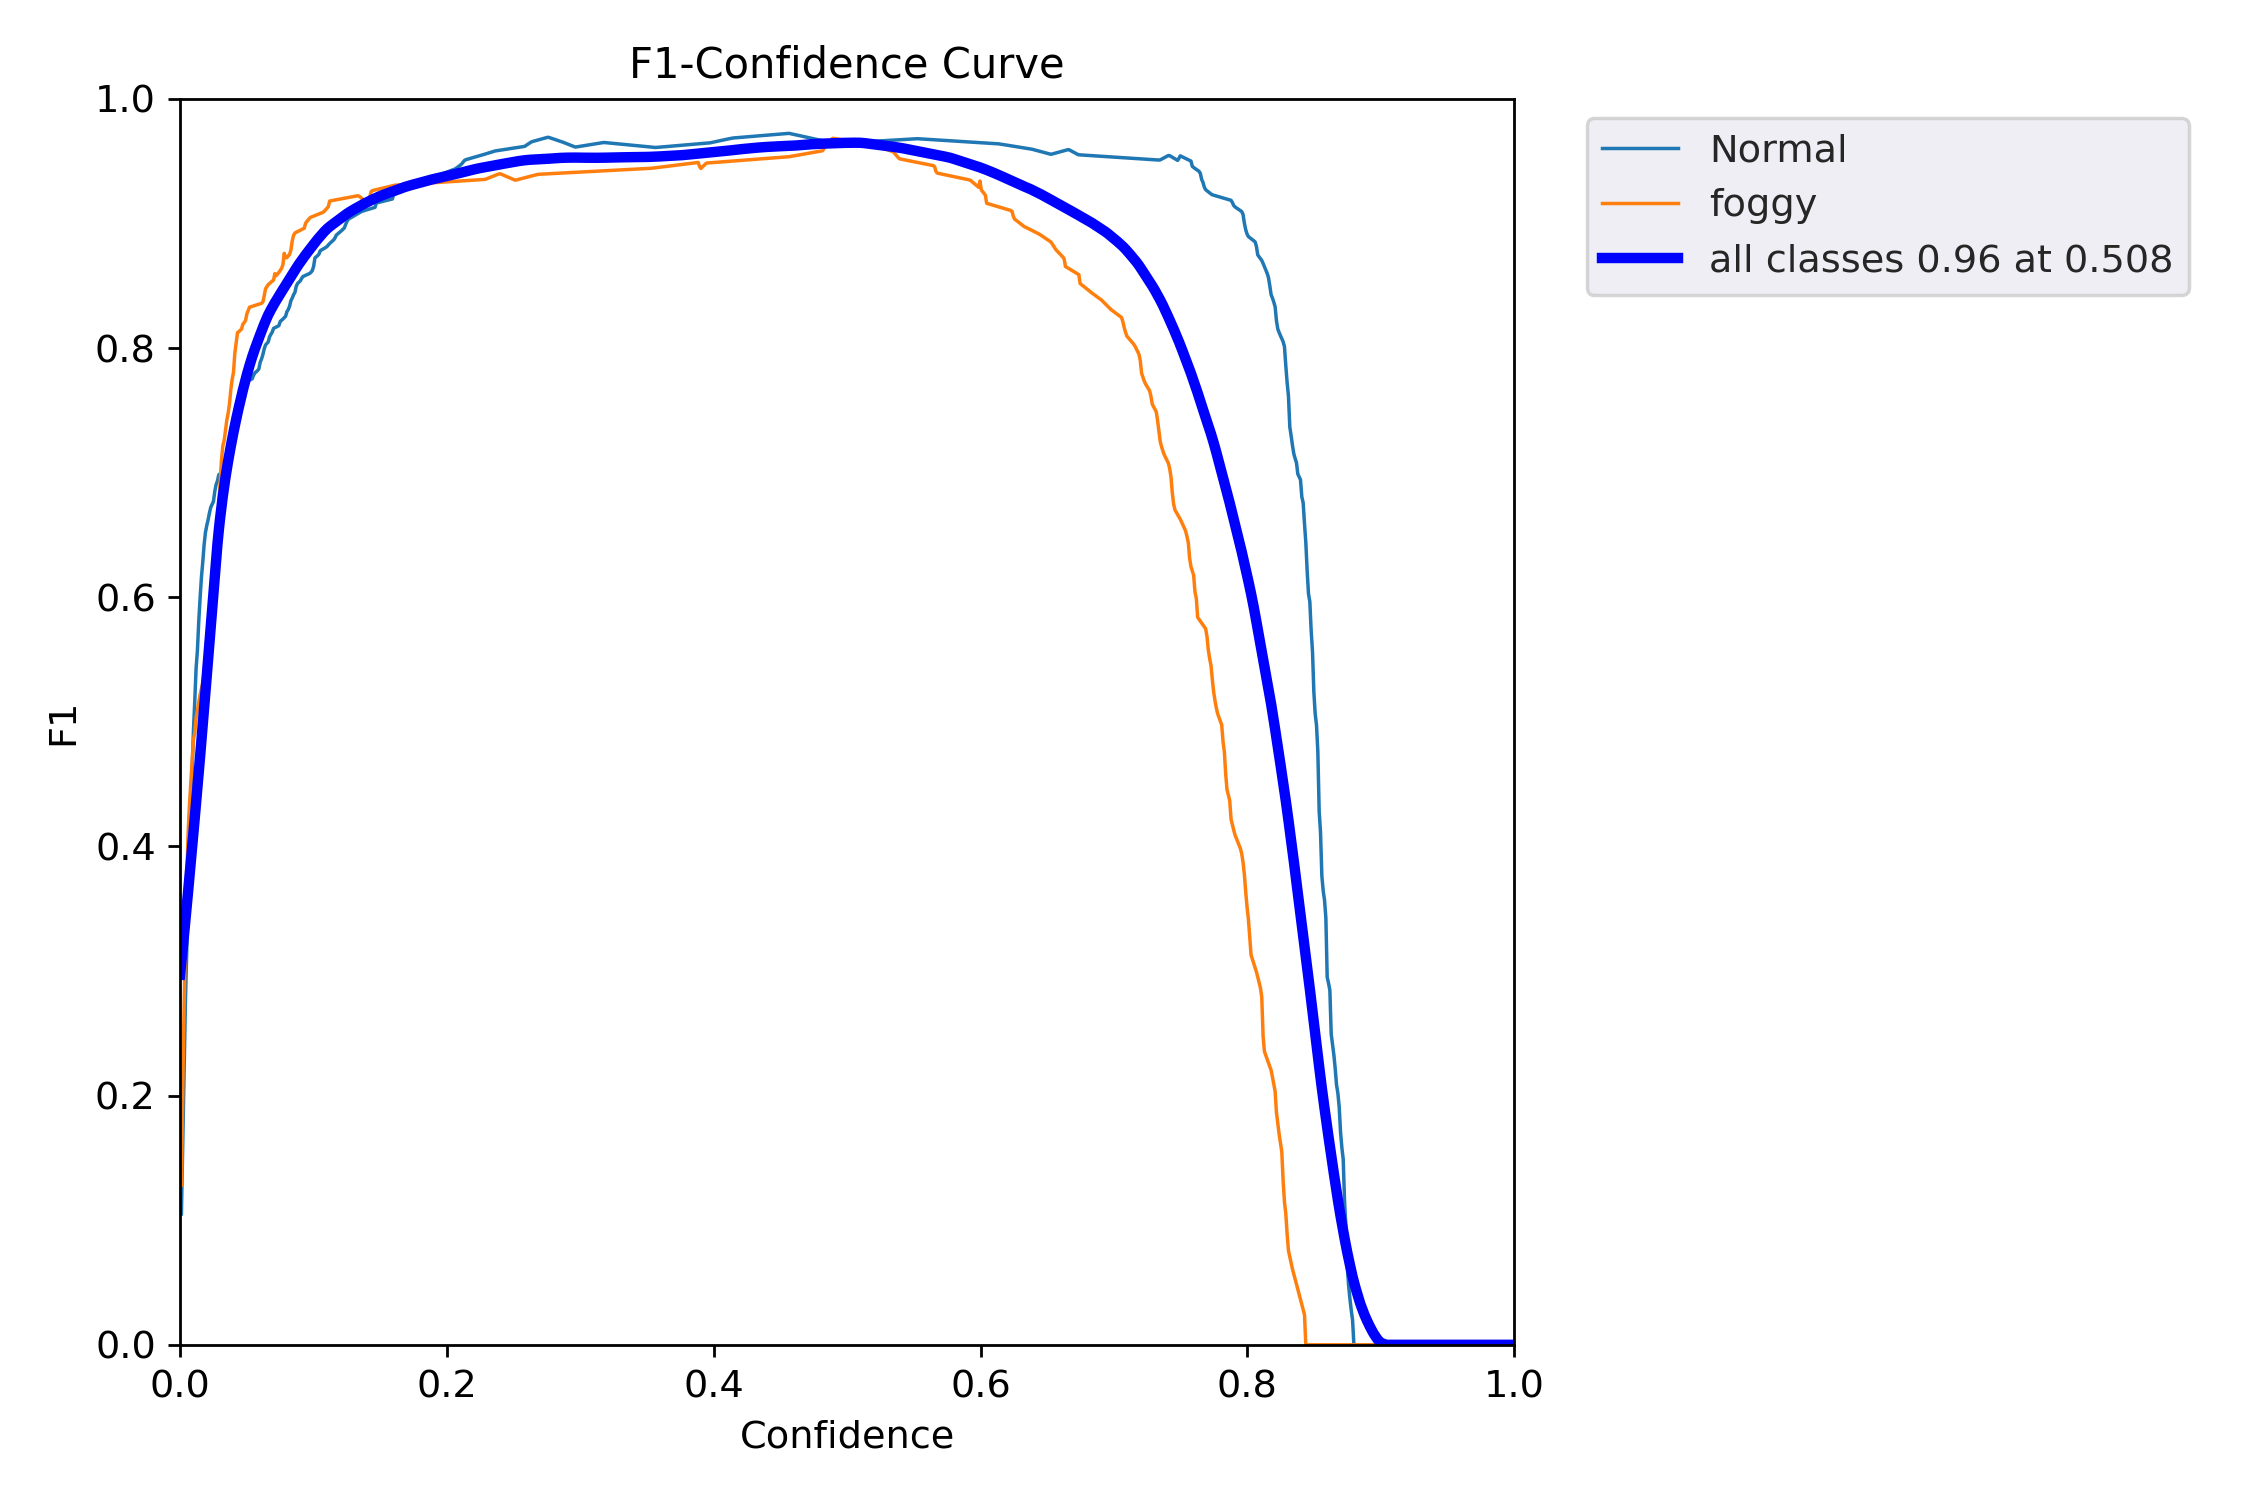

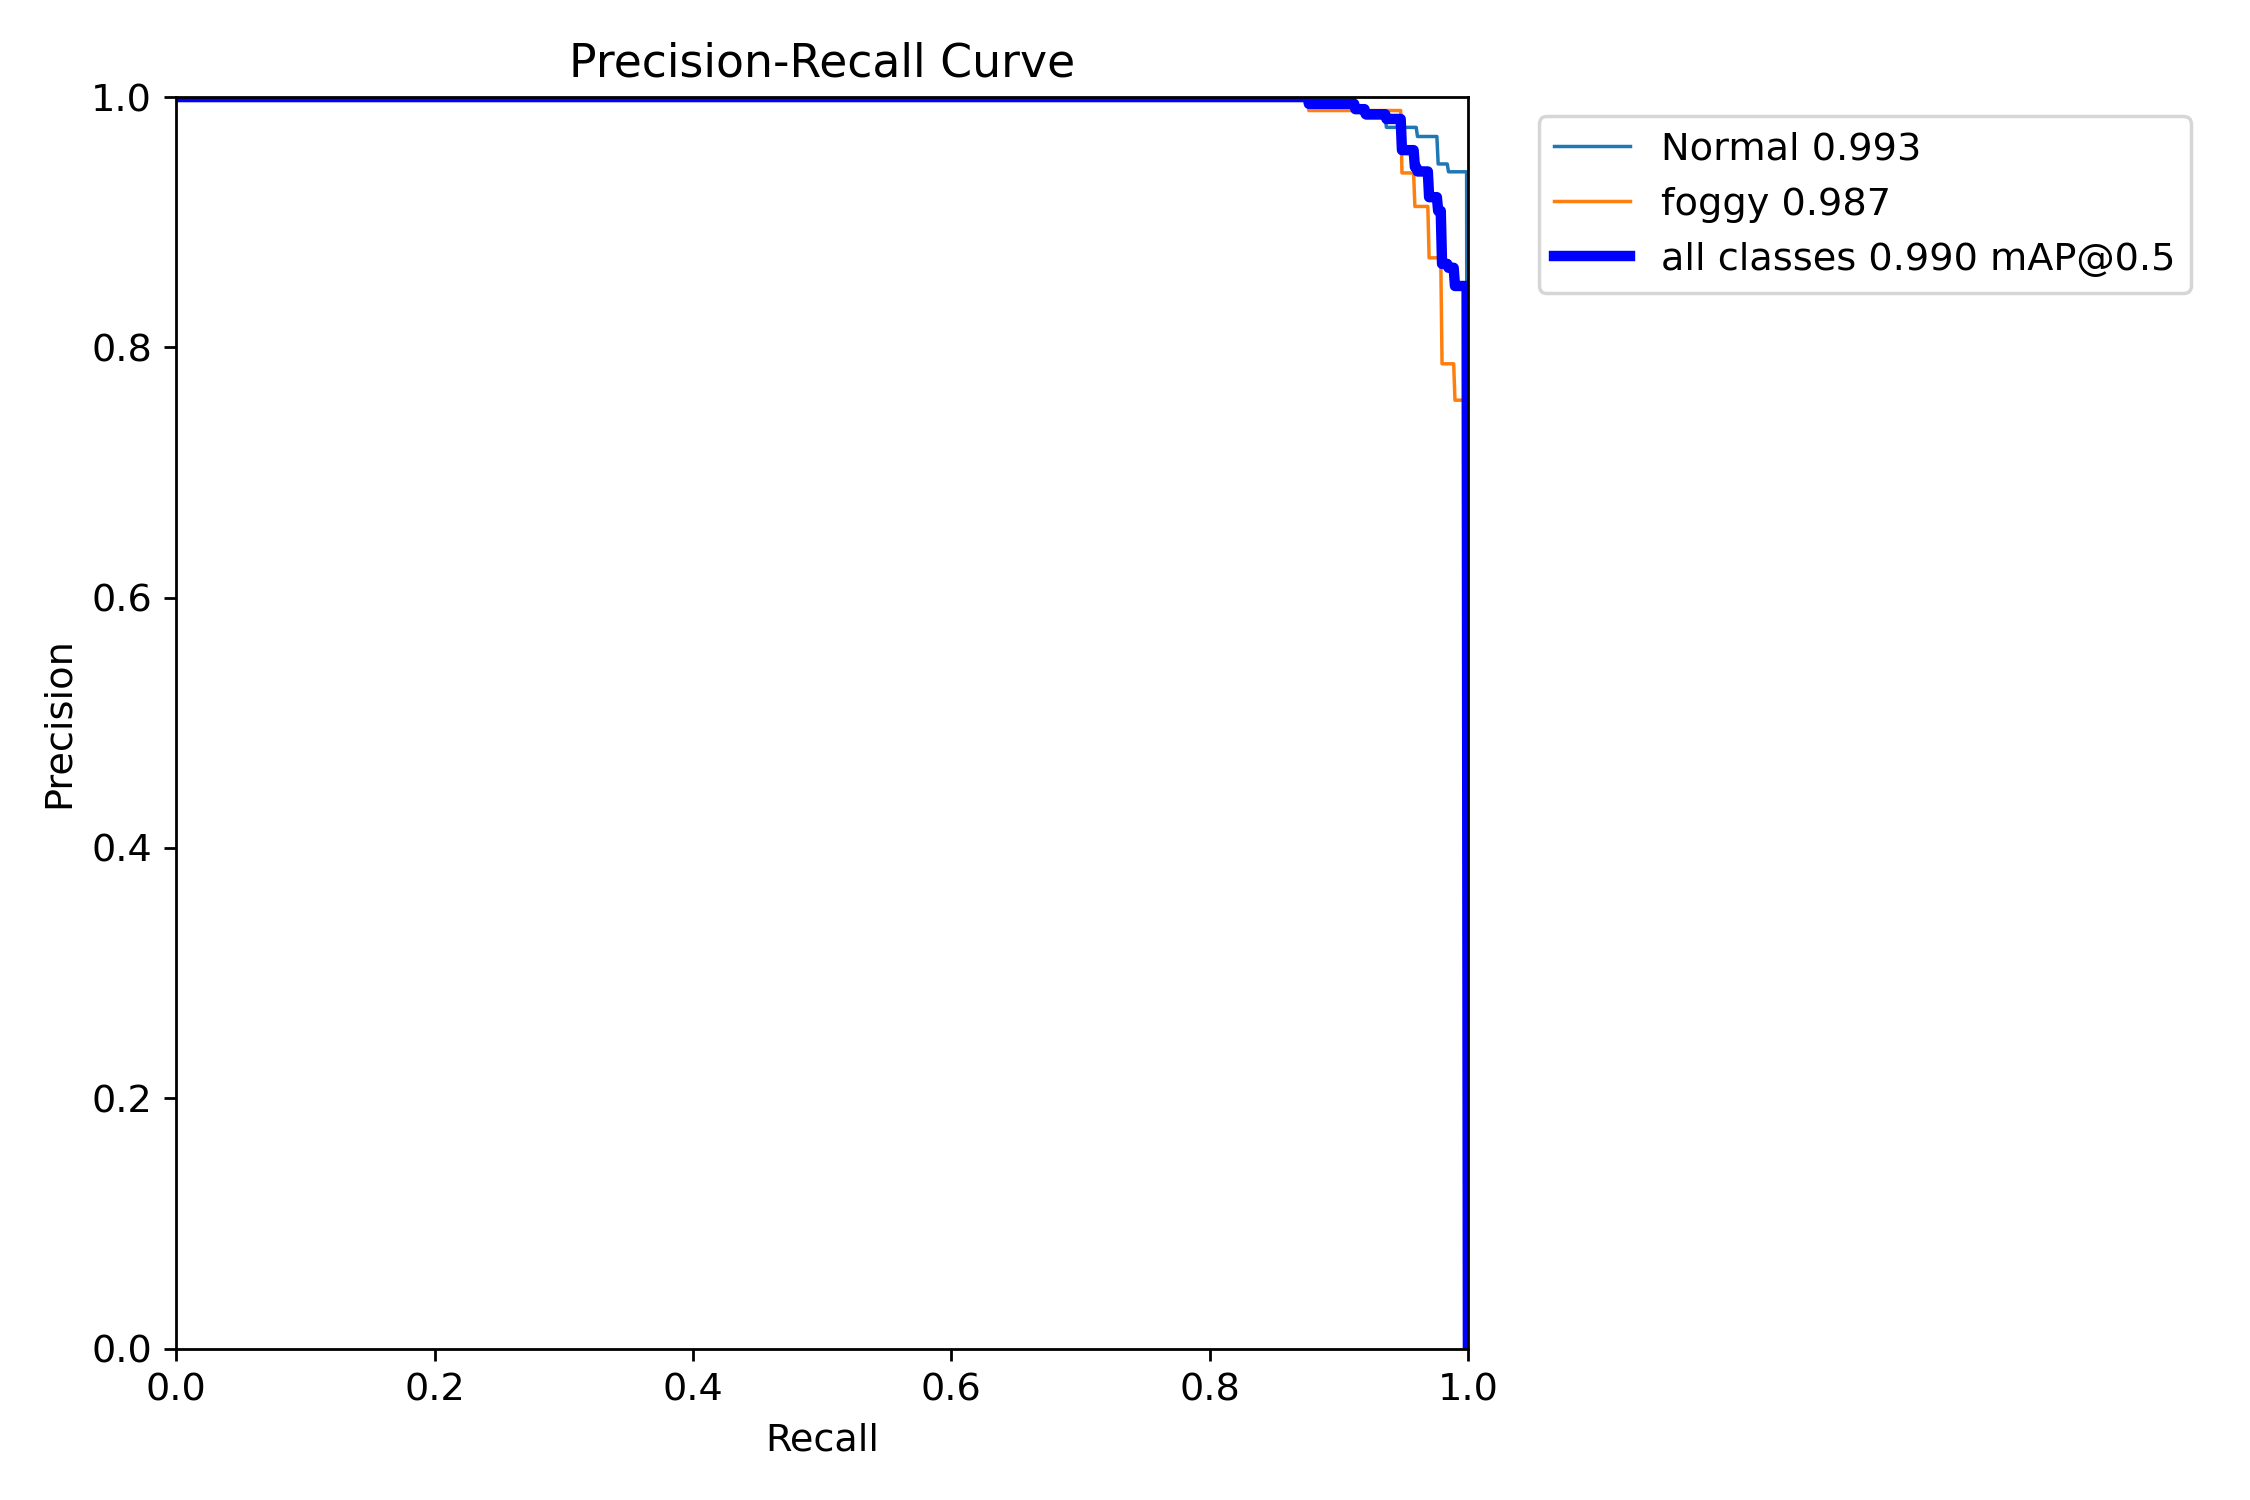

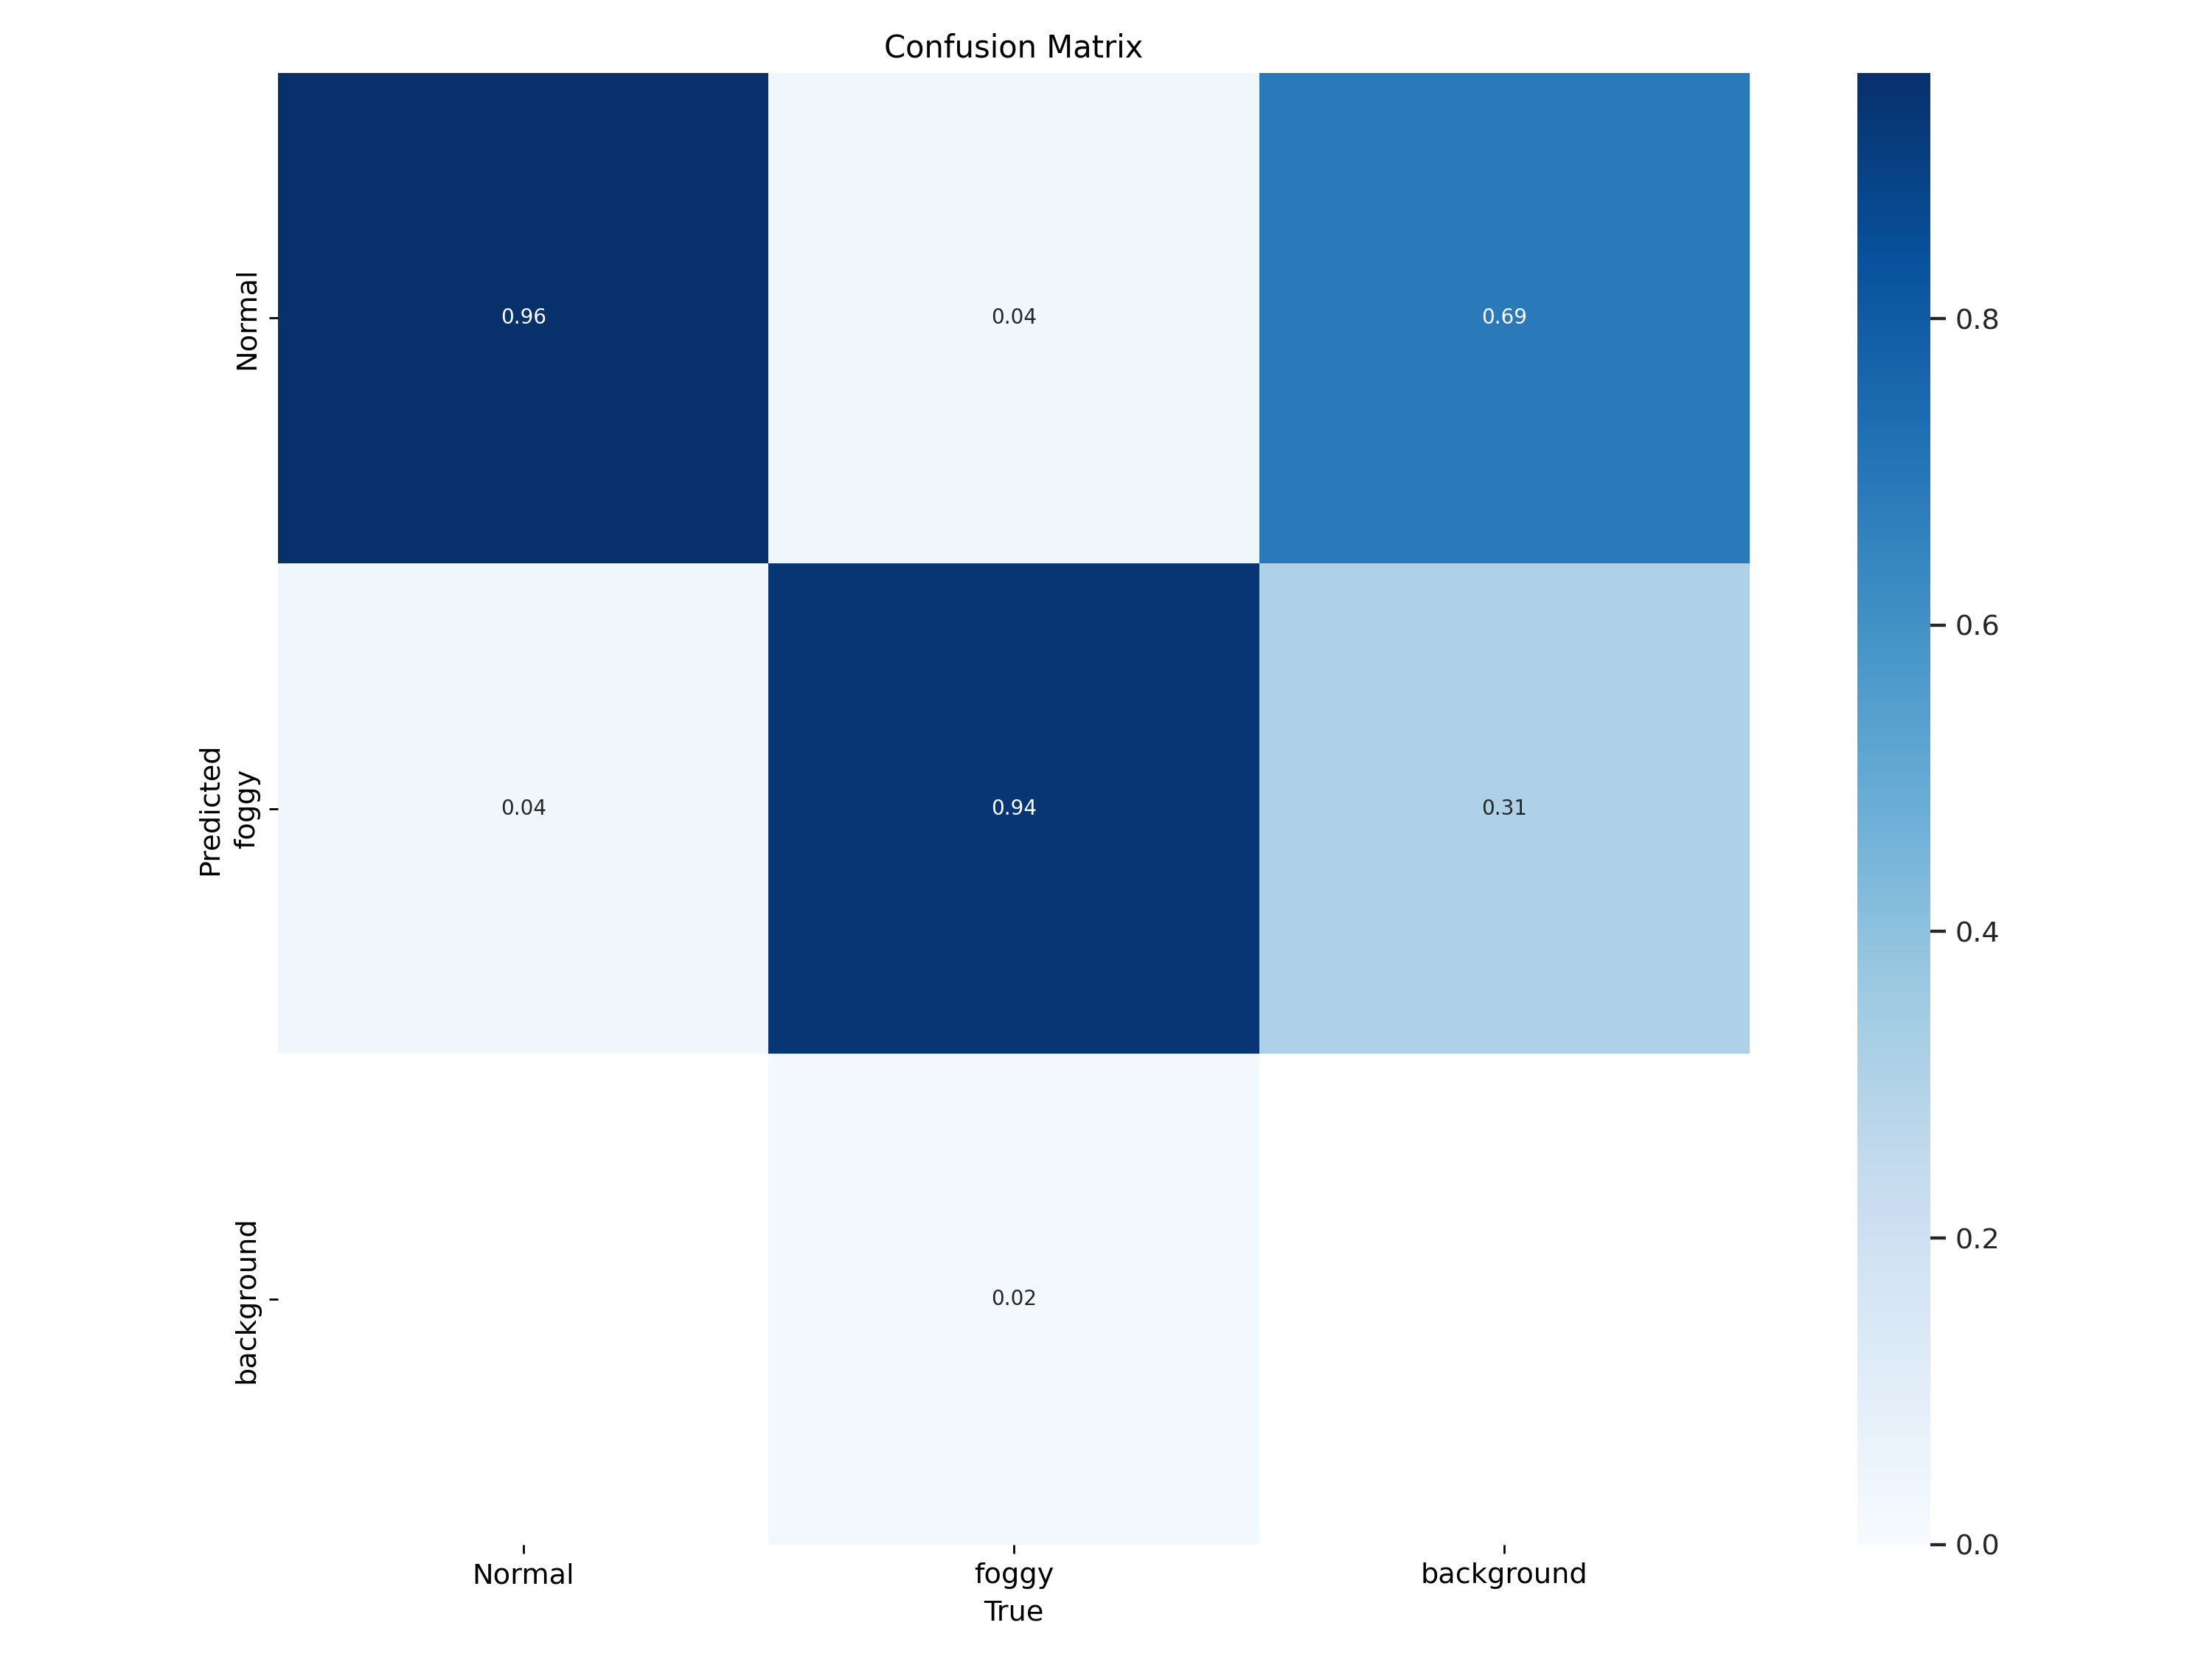

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp/F1_curve.png')
y = Image(filename='runs/train/exp/PR_curve.png')
z = Image(filename='runs/train/exp/confusion_matrix.png')
display(x, y,z)

# YoloV5x6


In [ ]:
!wandb disabled
!python train.py --img 415 --batch 16 --epochs 20 --data /content/drive/MyDrive/2/yolov5/data.yaml --weights yolov5x6.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2023-12-22 06:52:17.839049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 06:52:17.839106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 06:52:17.840489: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x6.pt, cfg=, data=/content/drive/MyDrive/2/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=Fal

In [4]:
p_yol5 = 0.989
r_yol5 = 0.983
mAP_yolo5 = 0.99

storeResults('YoloV5x6',p_yol5,r_yol5,mAP_yolo5)

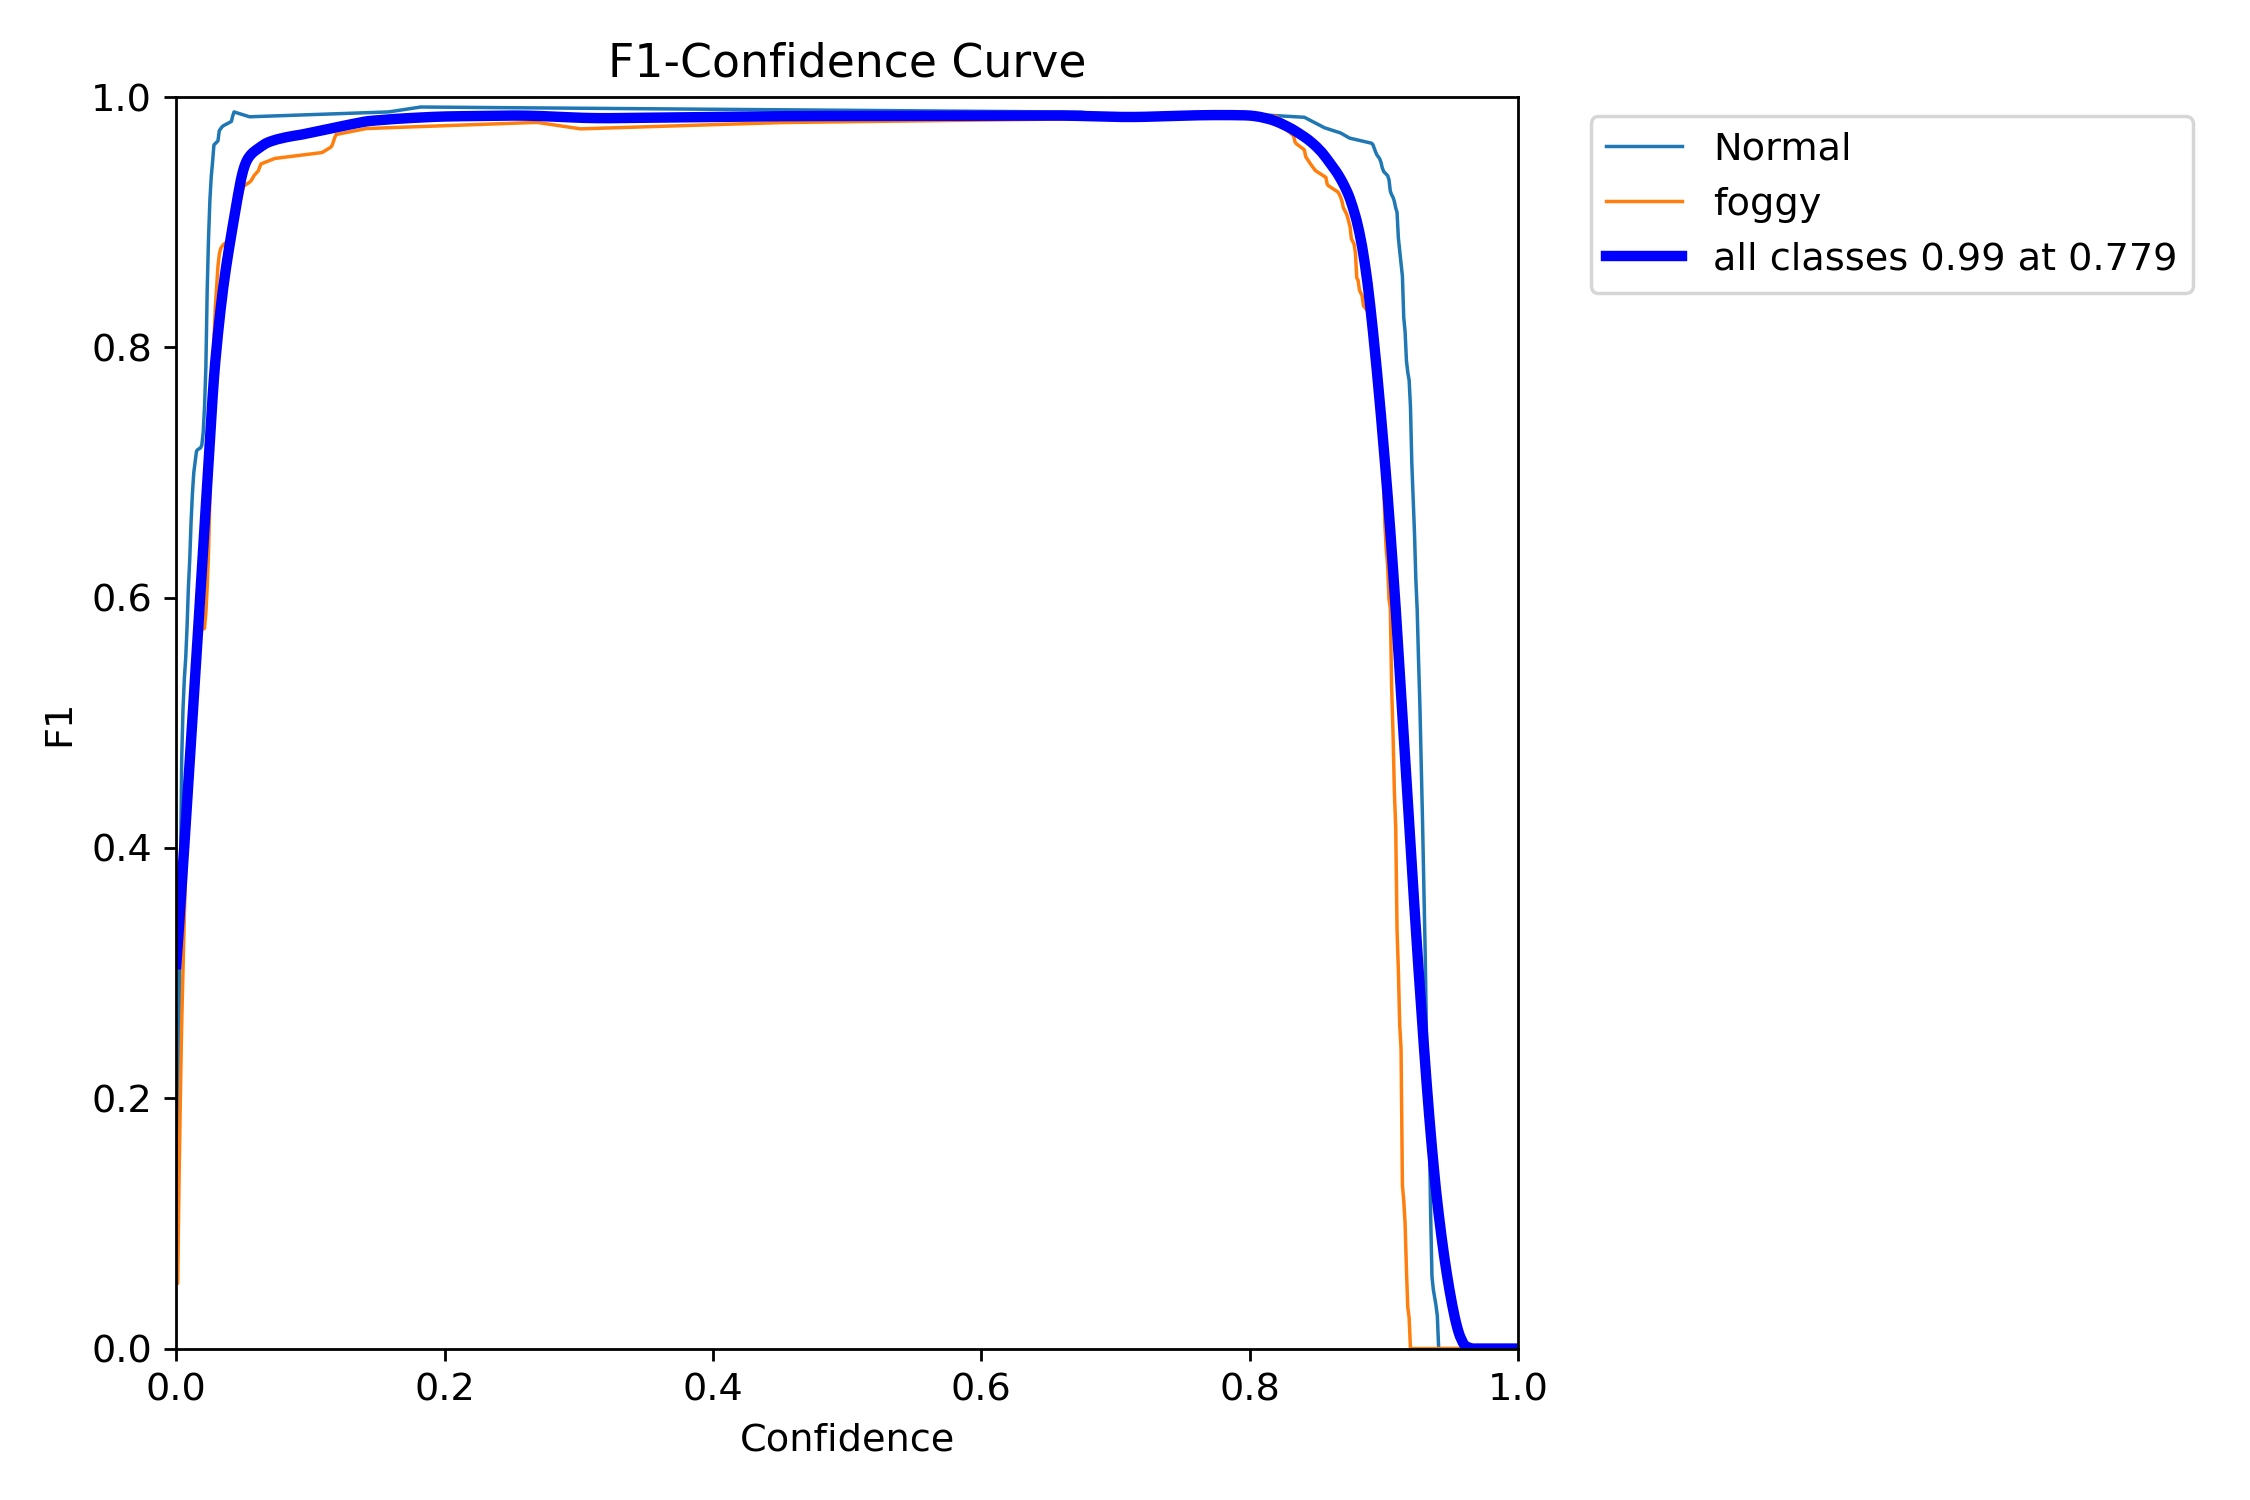

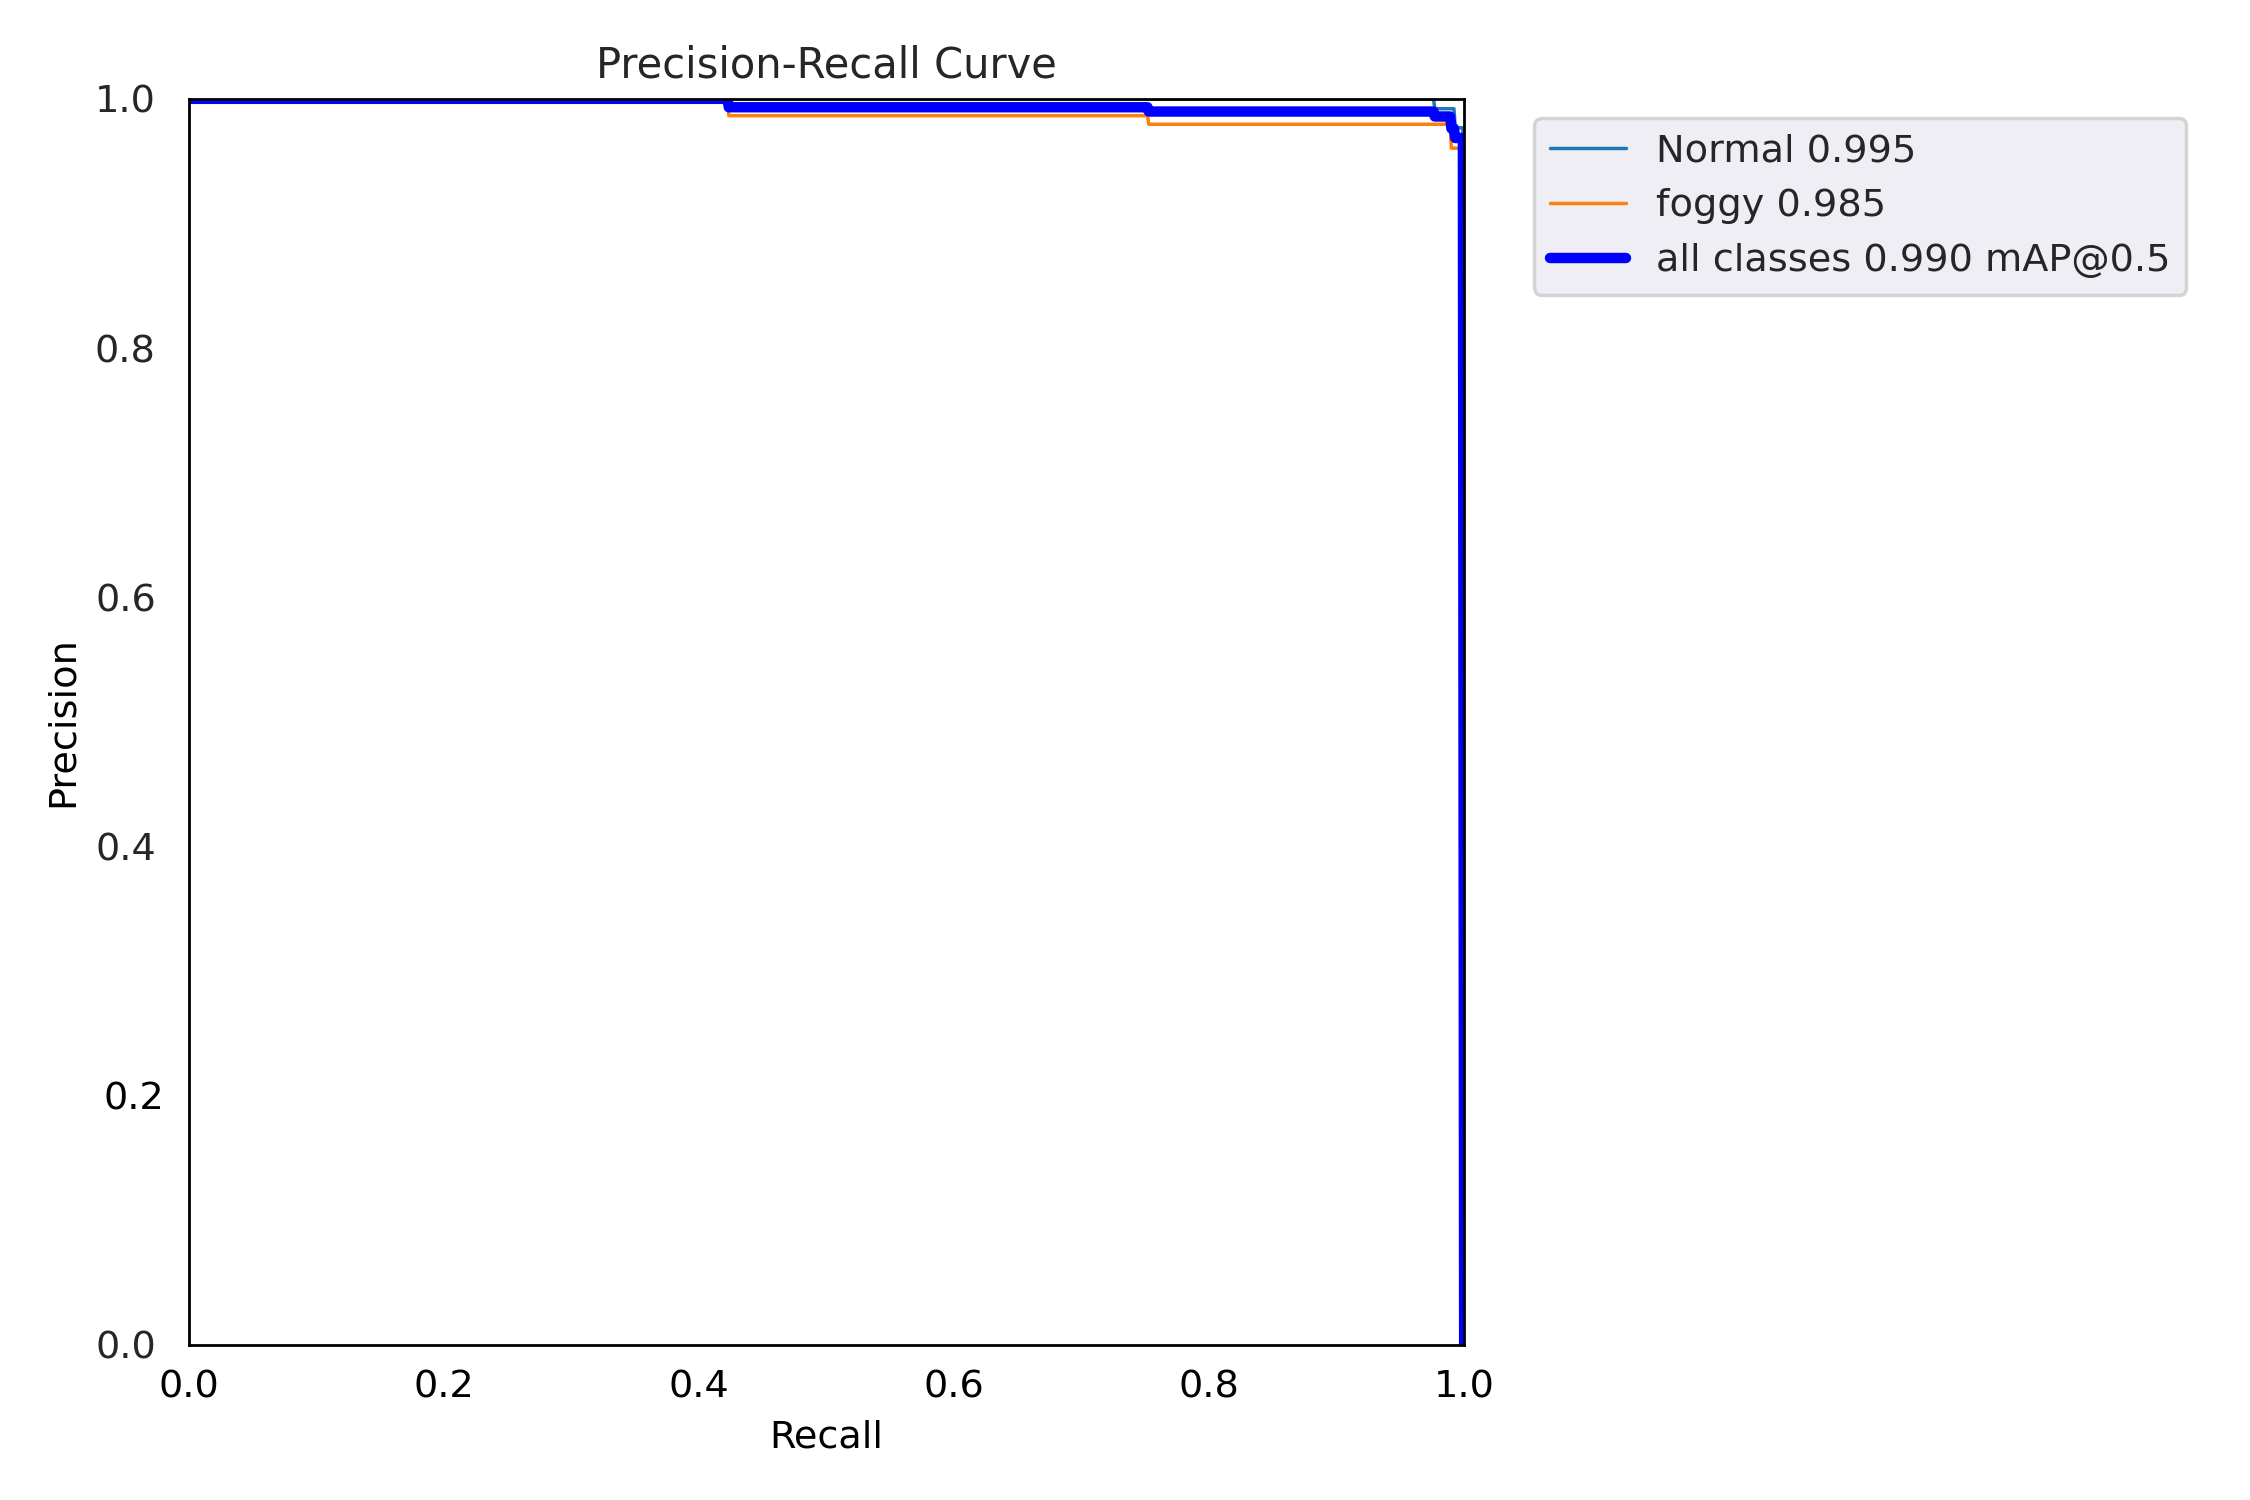

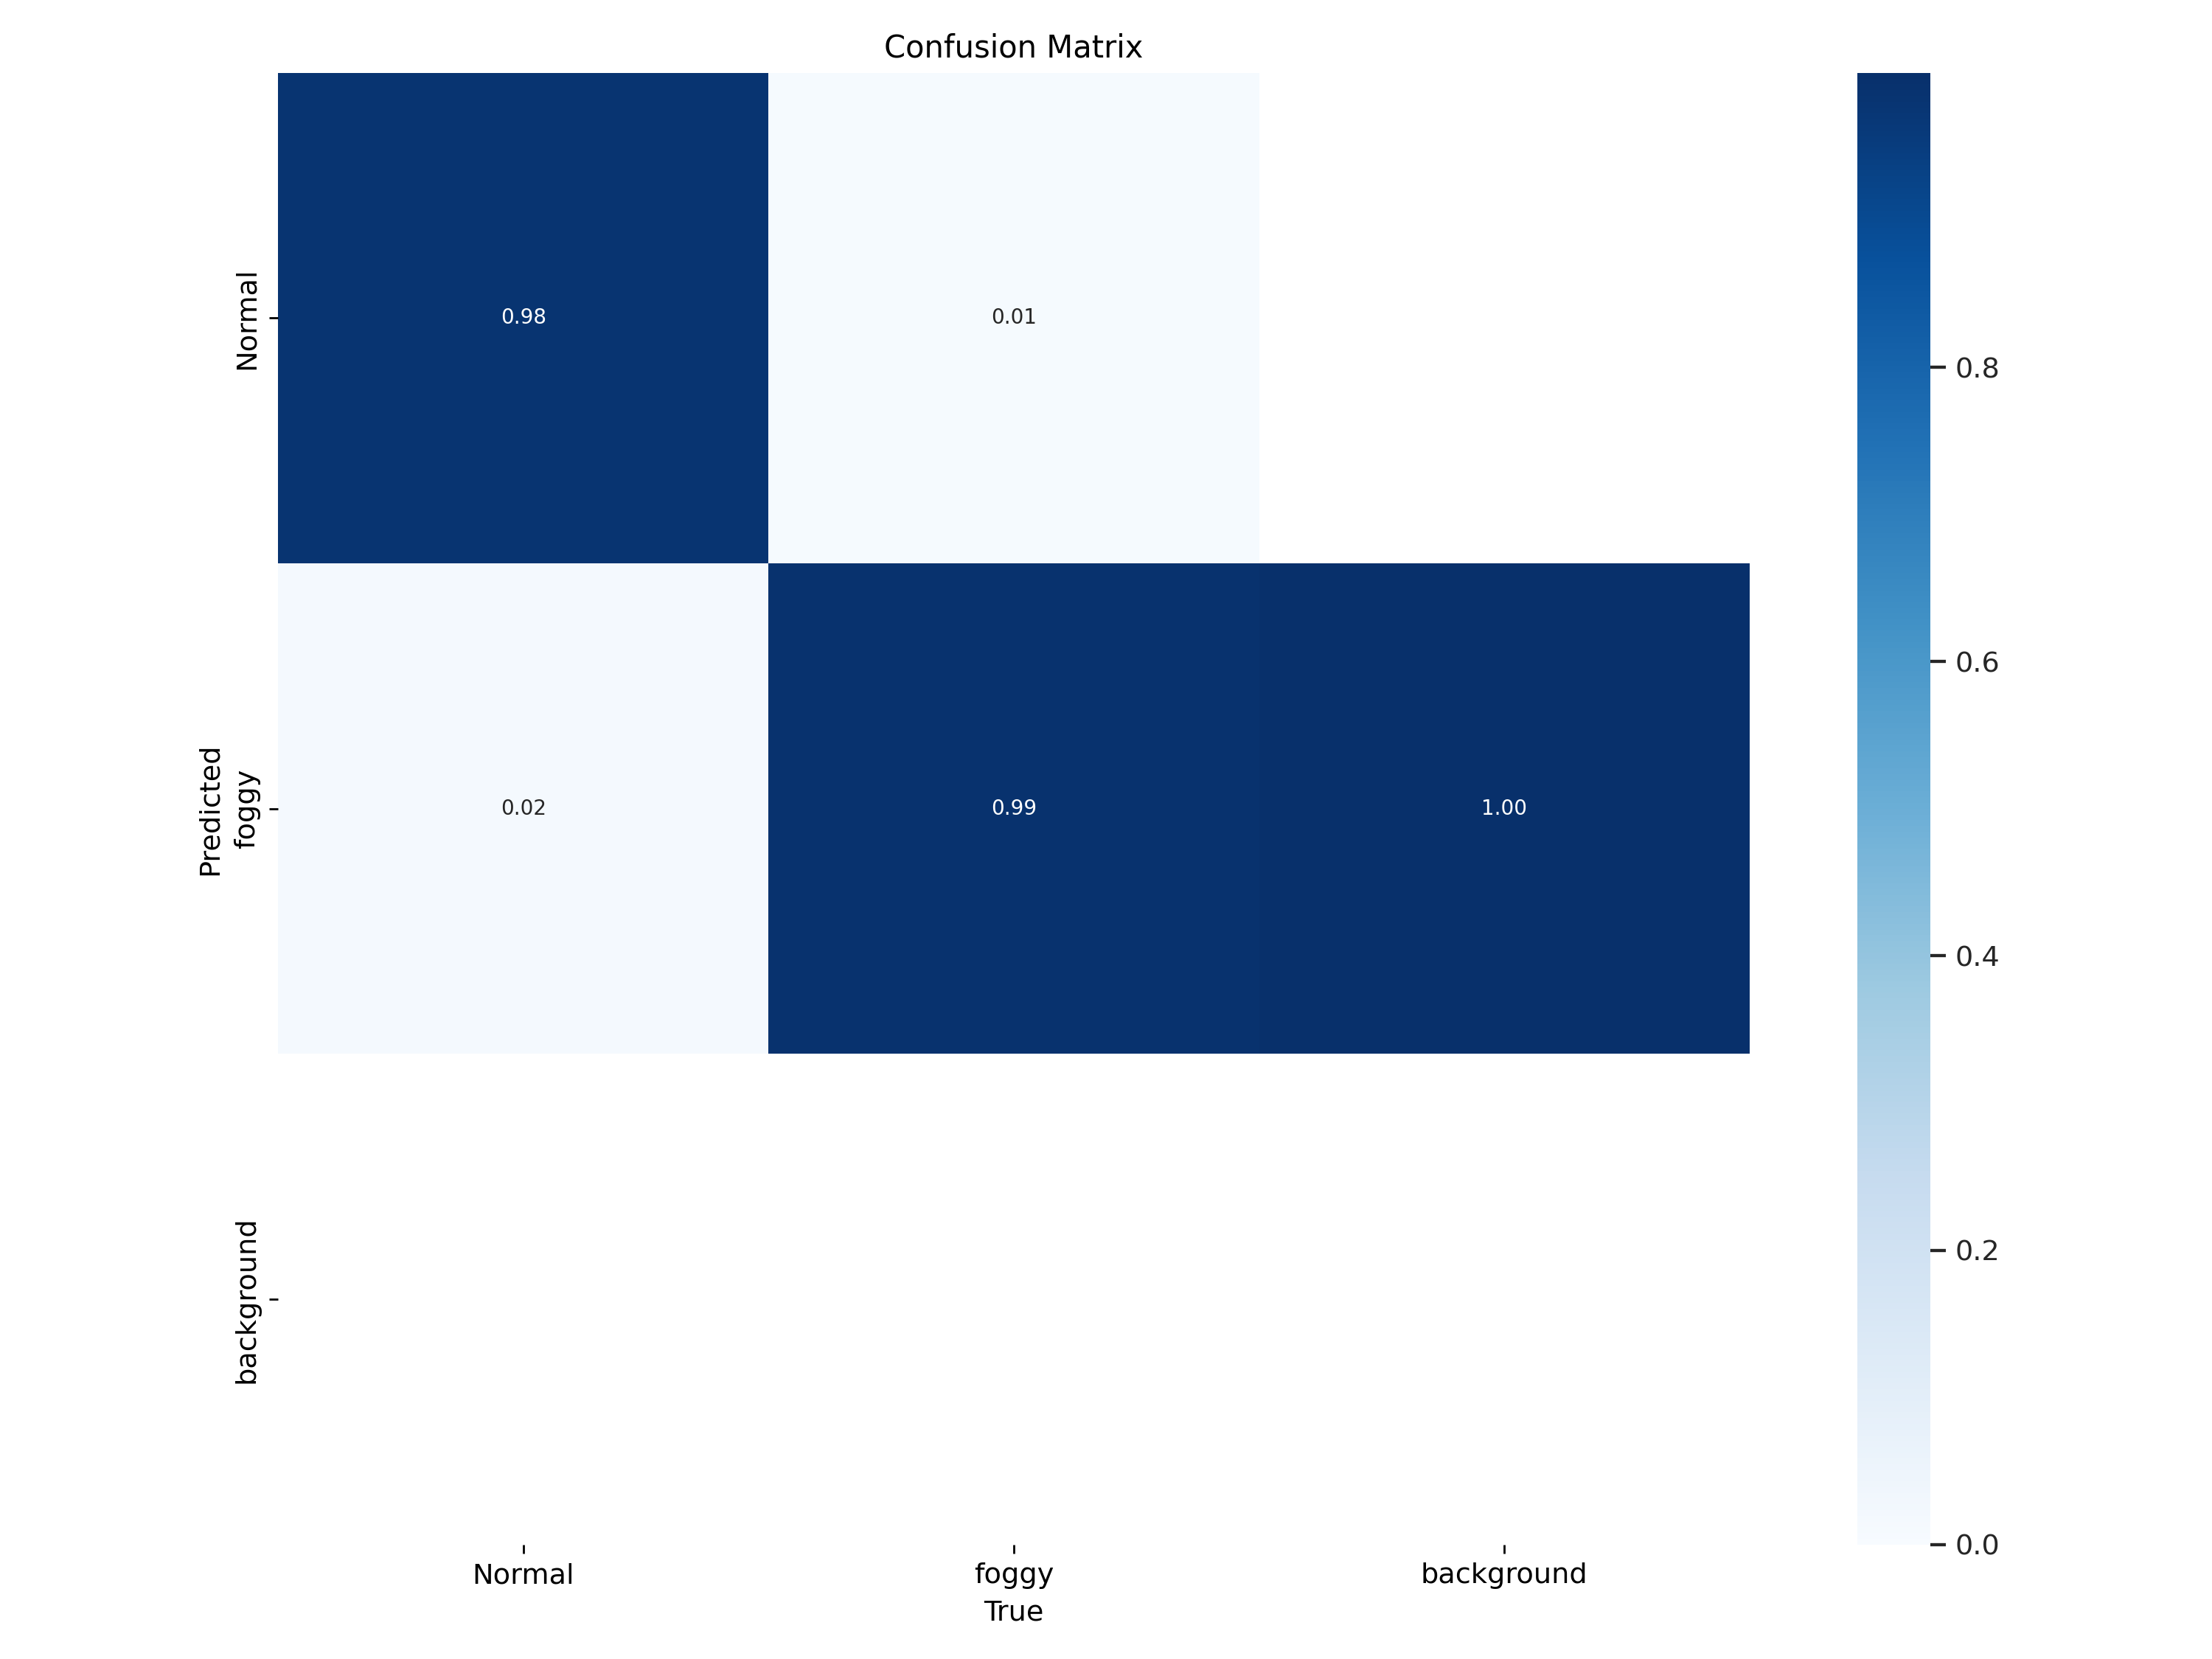

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp2/F1_curve.png')
y = Image(filename='runs/train/exp2/PR_curve.png')
z = Image(filename='runs/train/exp2/confusion_matrix.png')
display(x, y,z)

# YolovX

In [ ]:
!python train.py --data /content/drive/MyDrive/2/yolov5/data.yaml --epochs 20 --weights '' --cfg /content/drive/MyDrive/2/yolovx.yaml --img 416  # from scratch

2023-12-22 07:05:40.075268: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 07:05:40.075323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 07:05:40.076721: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=/content/drive/MyDrive/2/yolovx.yaml, data=/content/drive/MyDrive/2/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=Fal

In [5]:
p_yol5 = 0.704
r_yol5 = 0.731
mAP_yolo5 = 0.839

storeResults('Yolo X',p_yol5,r_yol5,mAP_yolo5)

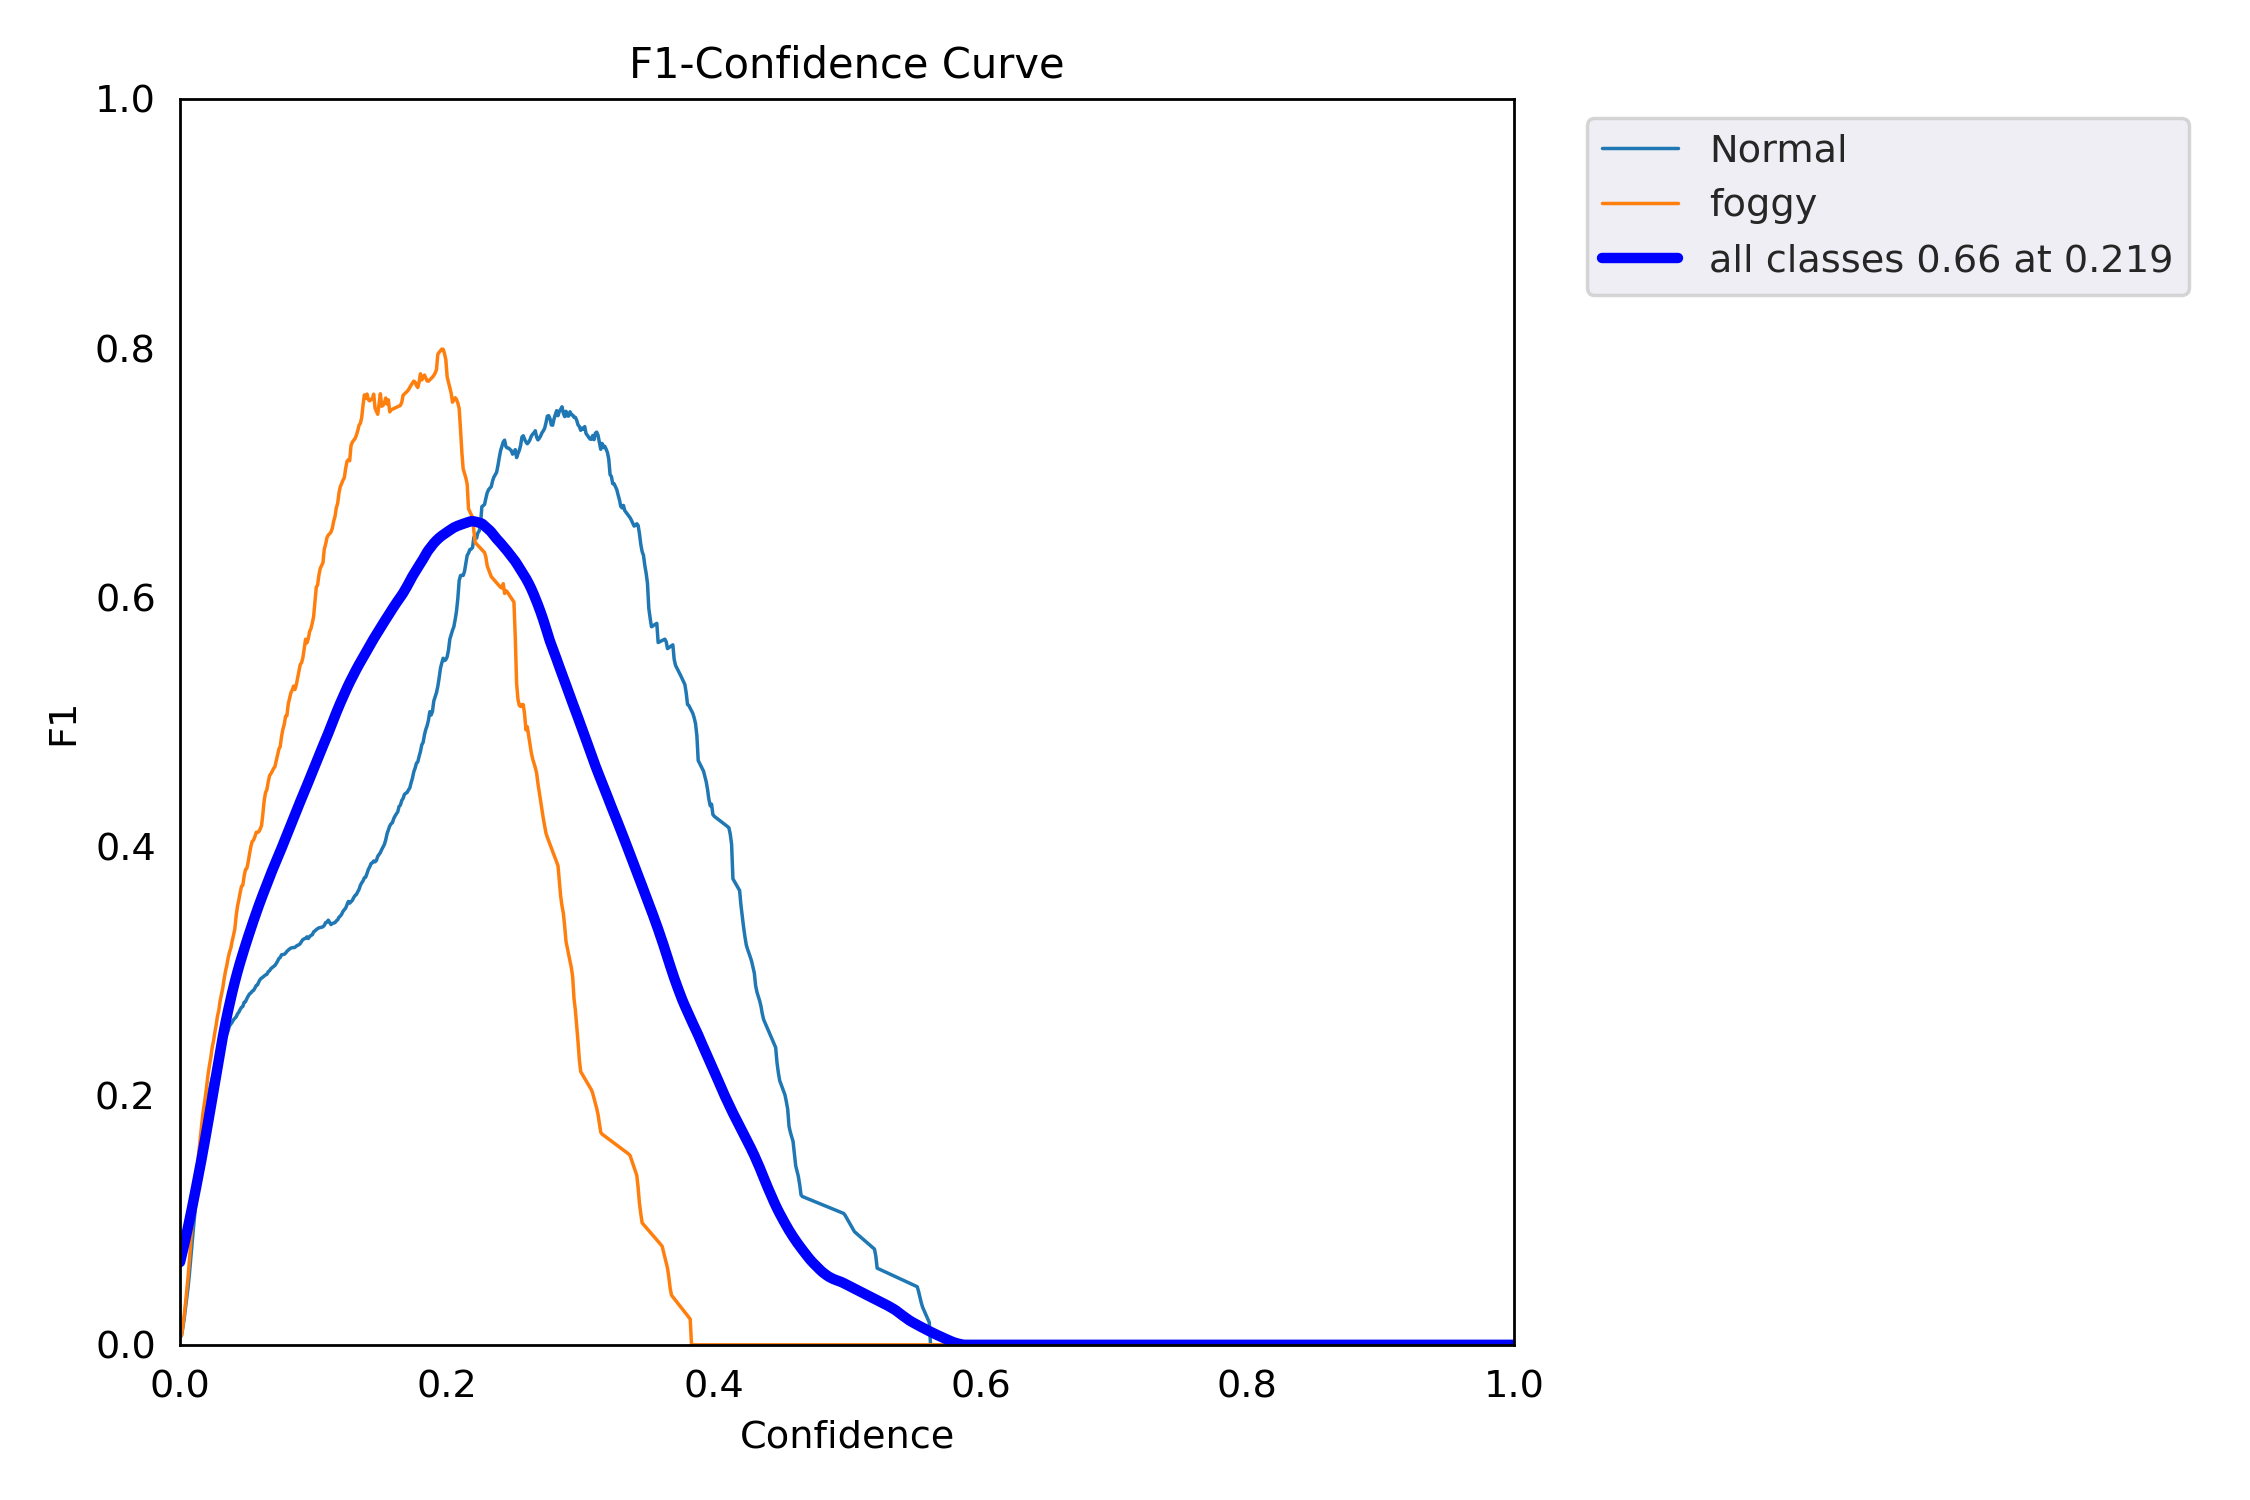

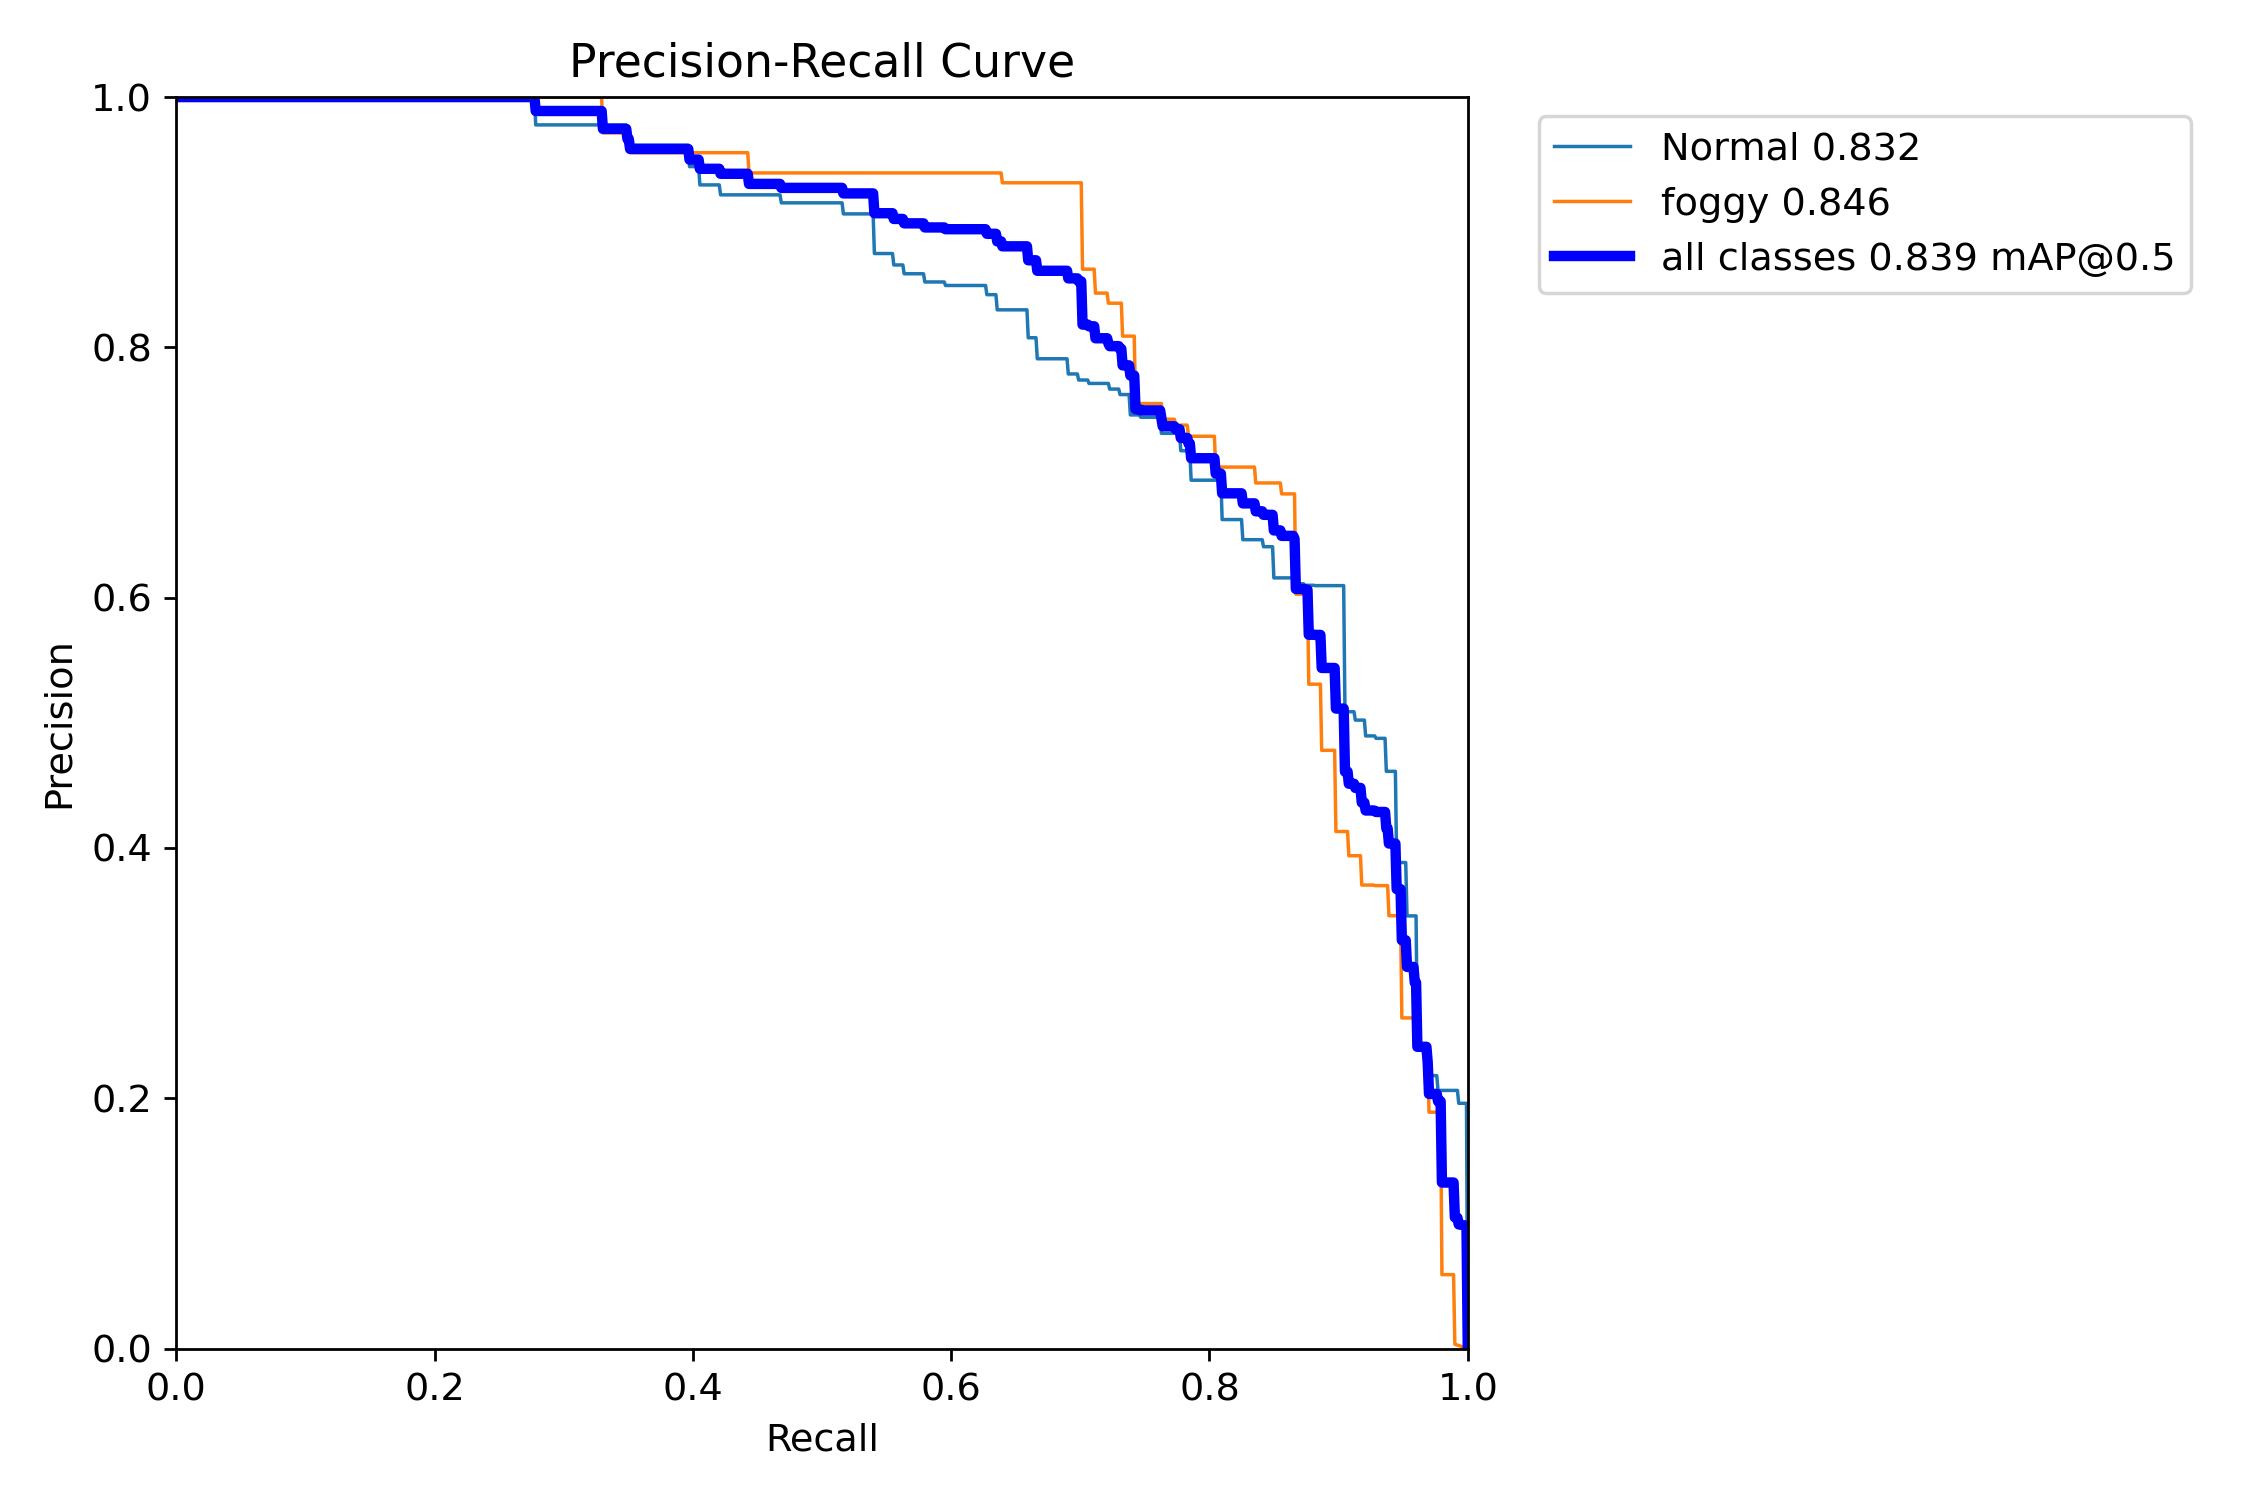

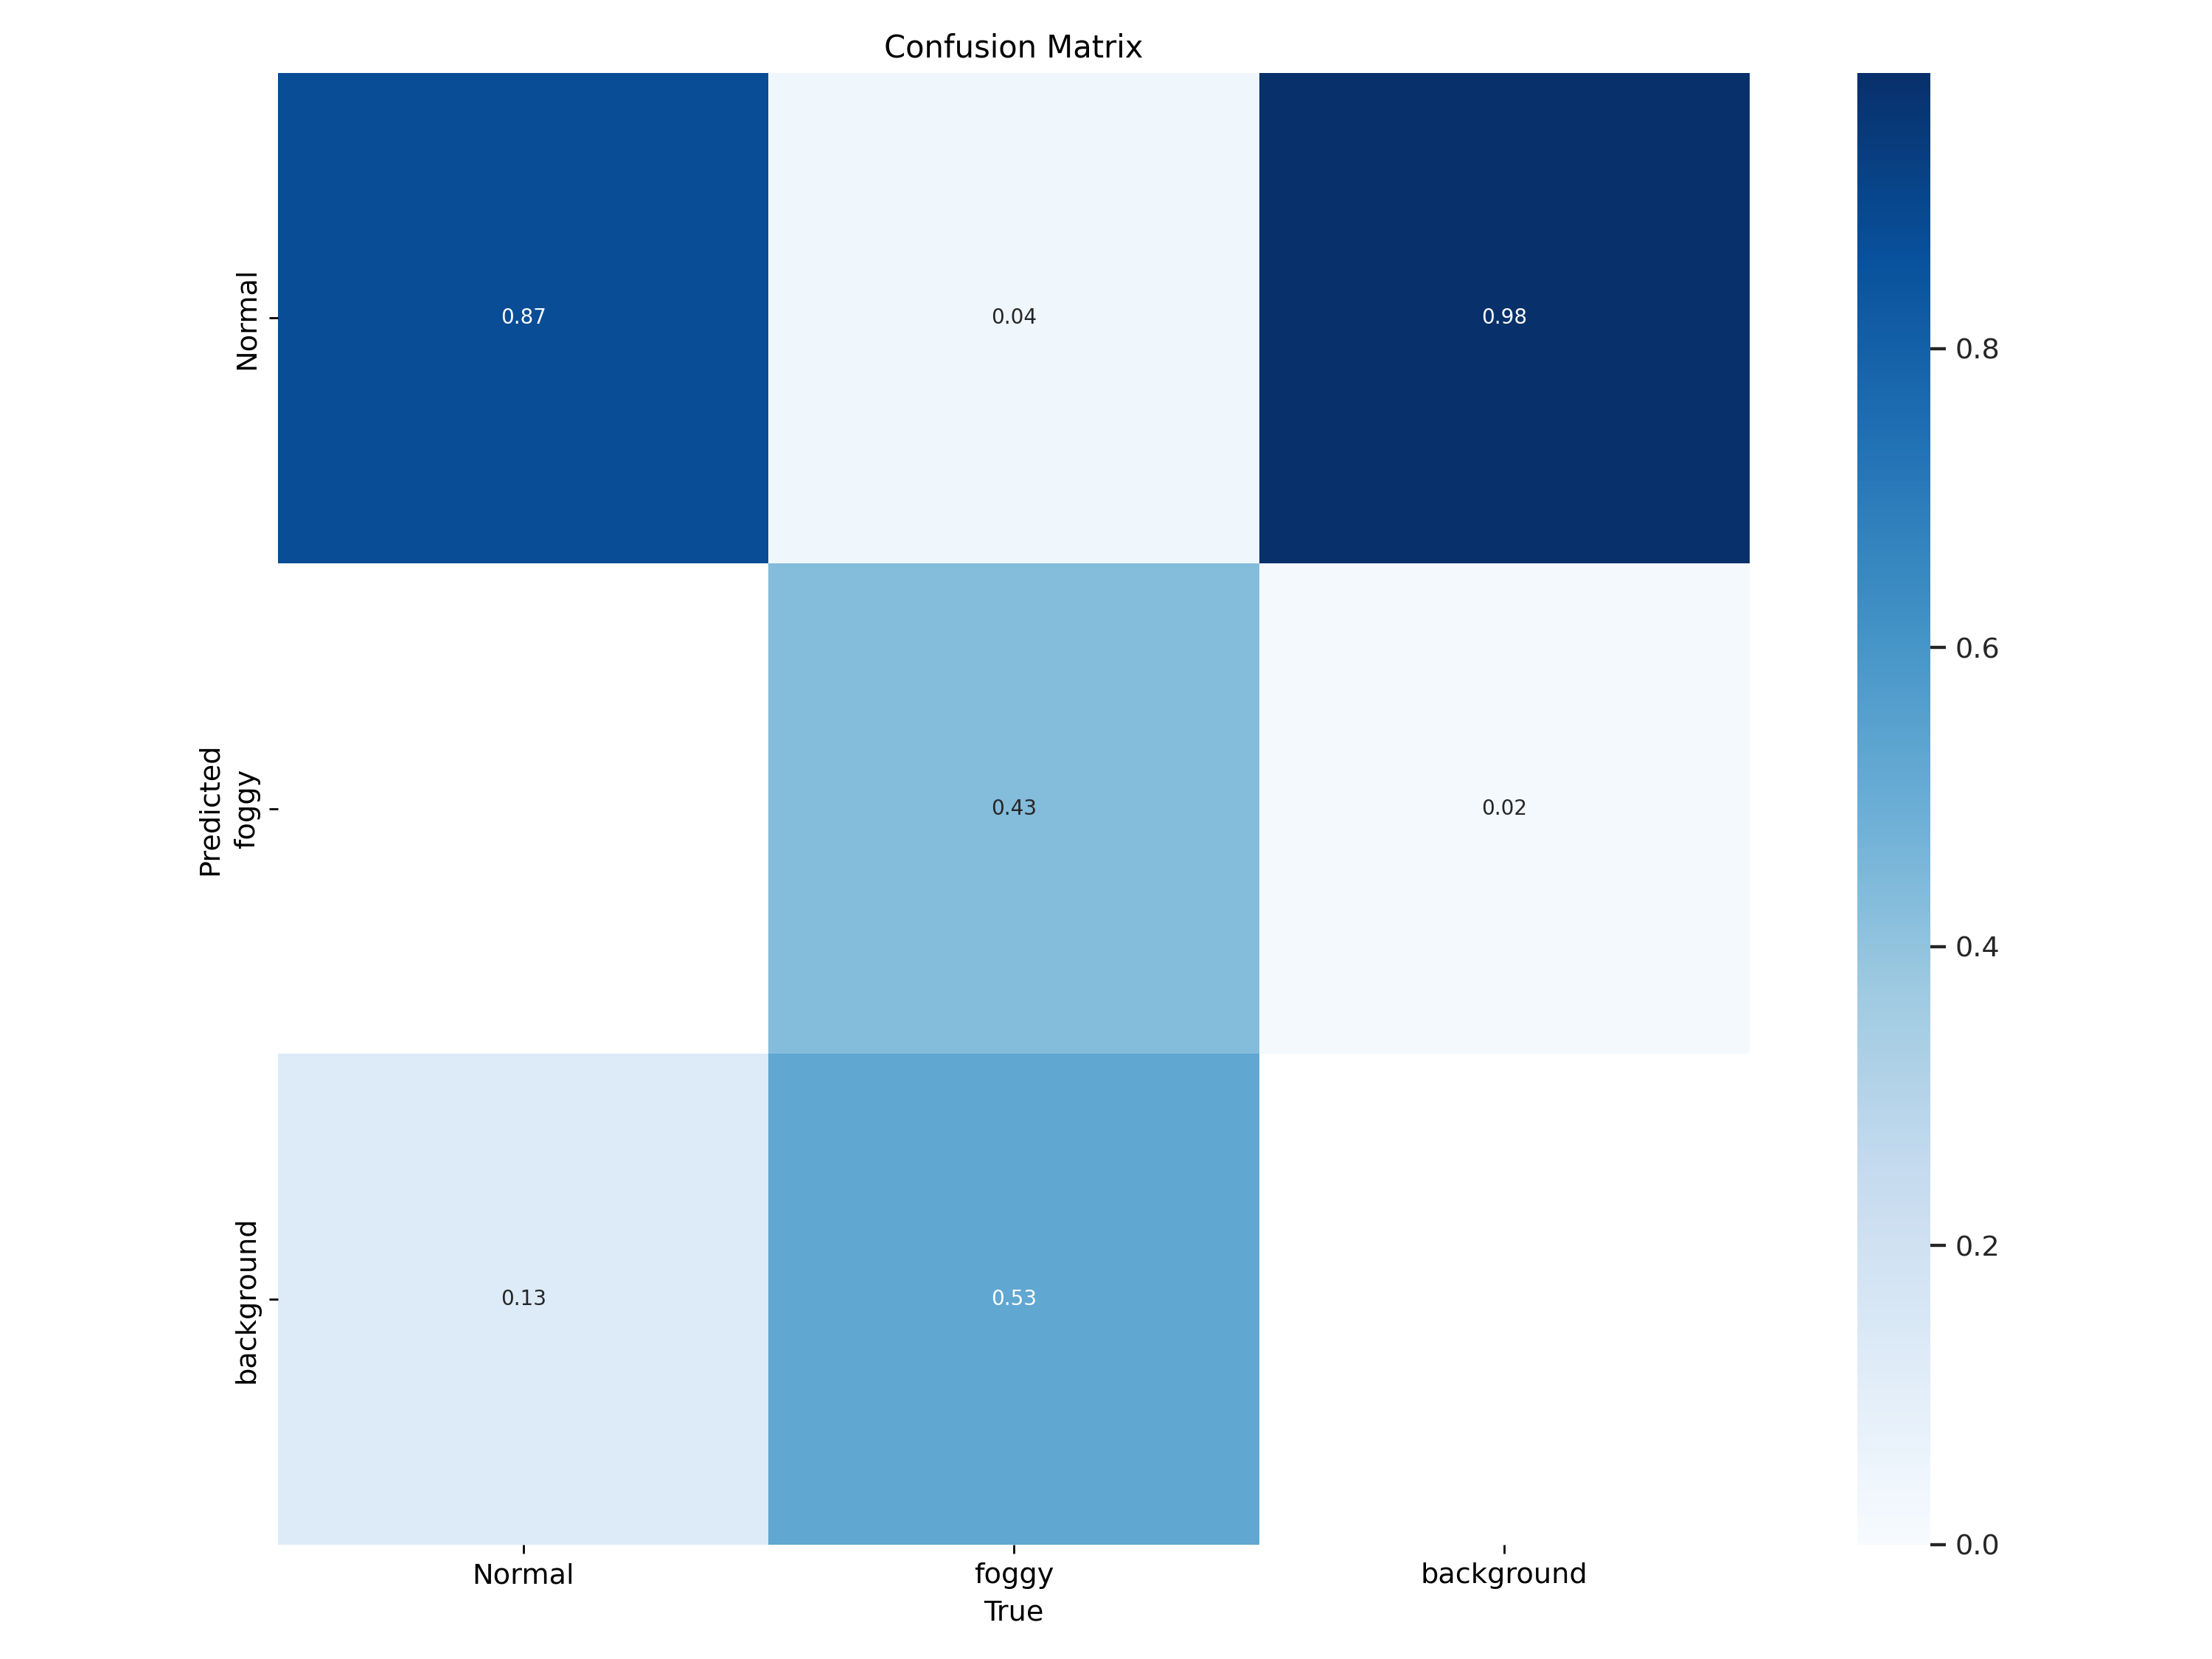

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp3/F1_curve.png')
y = Image(filename='runs/train/exp3/PR_curve.png')
z = Image(filename='runs/train/exp3/confusion_matrix.png')
display(x, y,z)

# R-Yolo

In [25]:
!git clone https://github.com/qinhongda8/R-YOLO

Cloning into 'R-YOLO'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (308/308), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 308 (delta 119), reused 250 (delta 80), pack-reused 0
Receiving objects: 100% (308/308), 14.03 MiB | 45.05 MiB/s, done.
Resolving deltas: 100% (119/119), done.


# **R-YoloV5**

In [24]:
!python train.py --data /content/drive/MyDrive/2/yolov5/data.yaml --epochs 20 --weights '' --cfg /content/R-YOLO/models/yolov5s.yaml --img 416  # from scratch

2023-12-22 09:30:41.585128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 09:30:41.585171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 09:30:41.586517: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=/content/R-YOLO/models/yolov5s.yaml, data=/content/drive/MyDrive/2/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=Fals

In [6]:
p_yol5 = 0.887
r_yol5 = 0.888
mAP_yolo5 = 0.934

storeResults('R-YoloV5',p_yol5,r_yol5,mAP_yolo5)

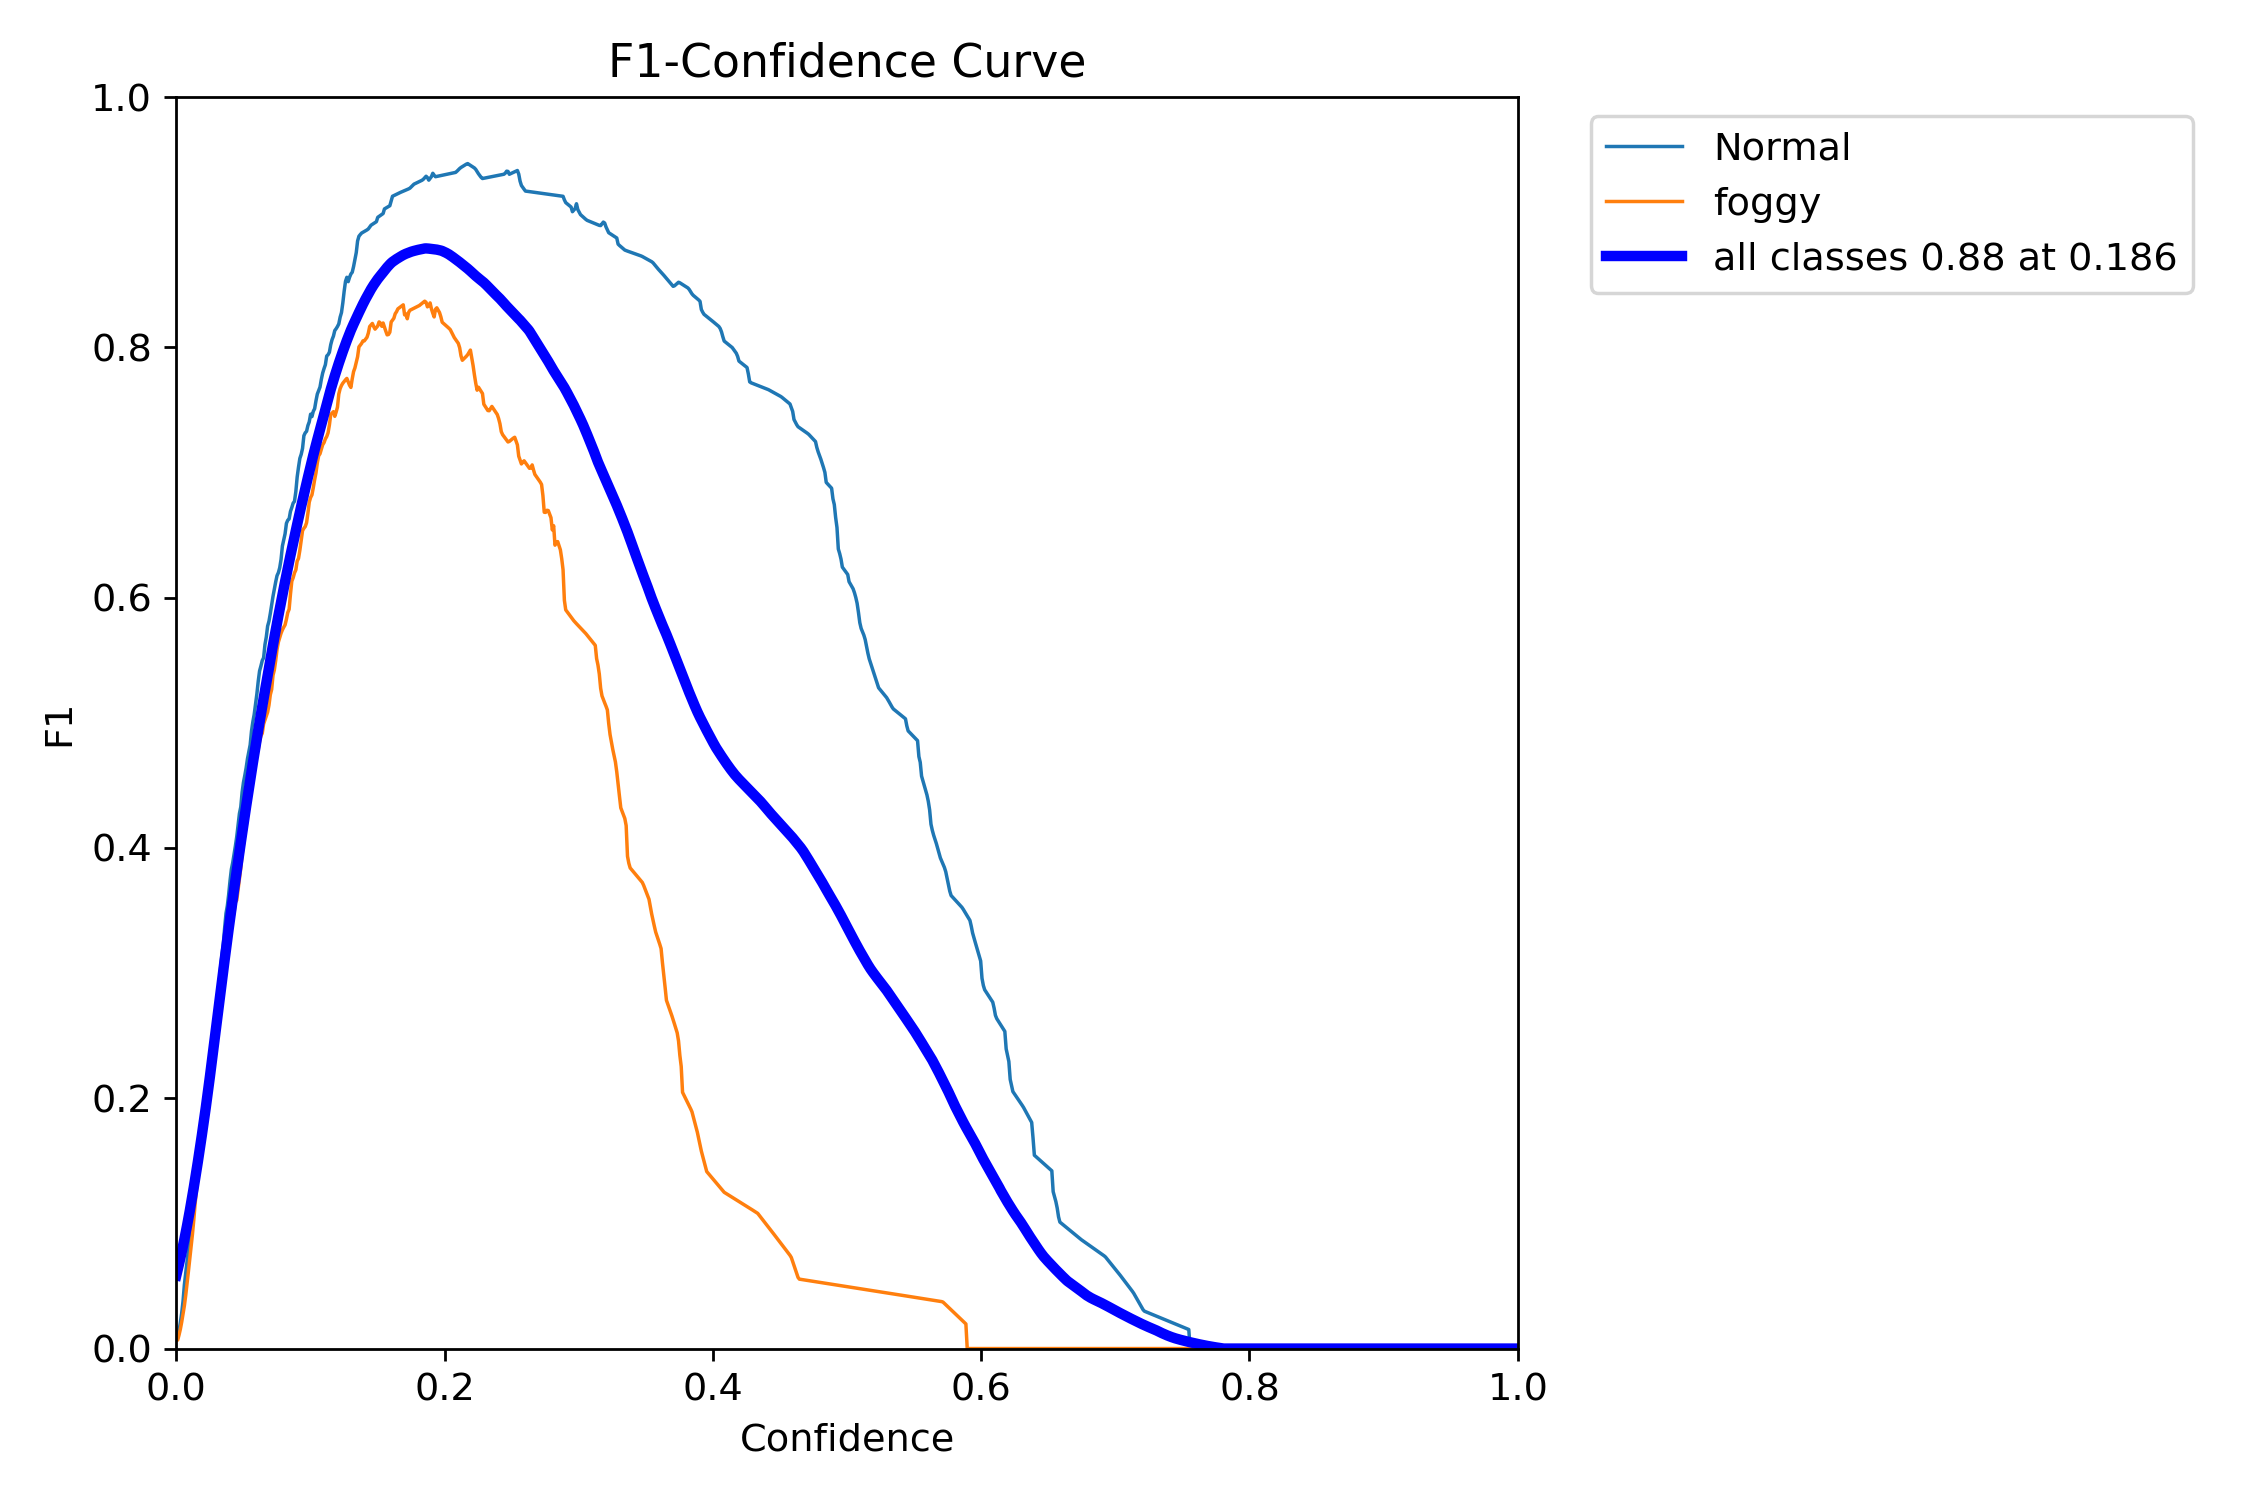

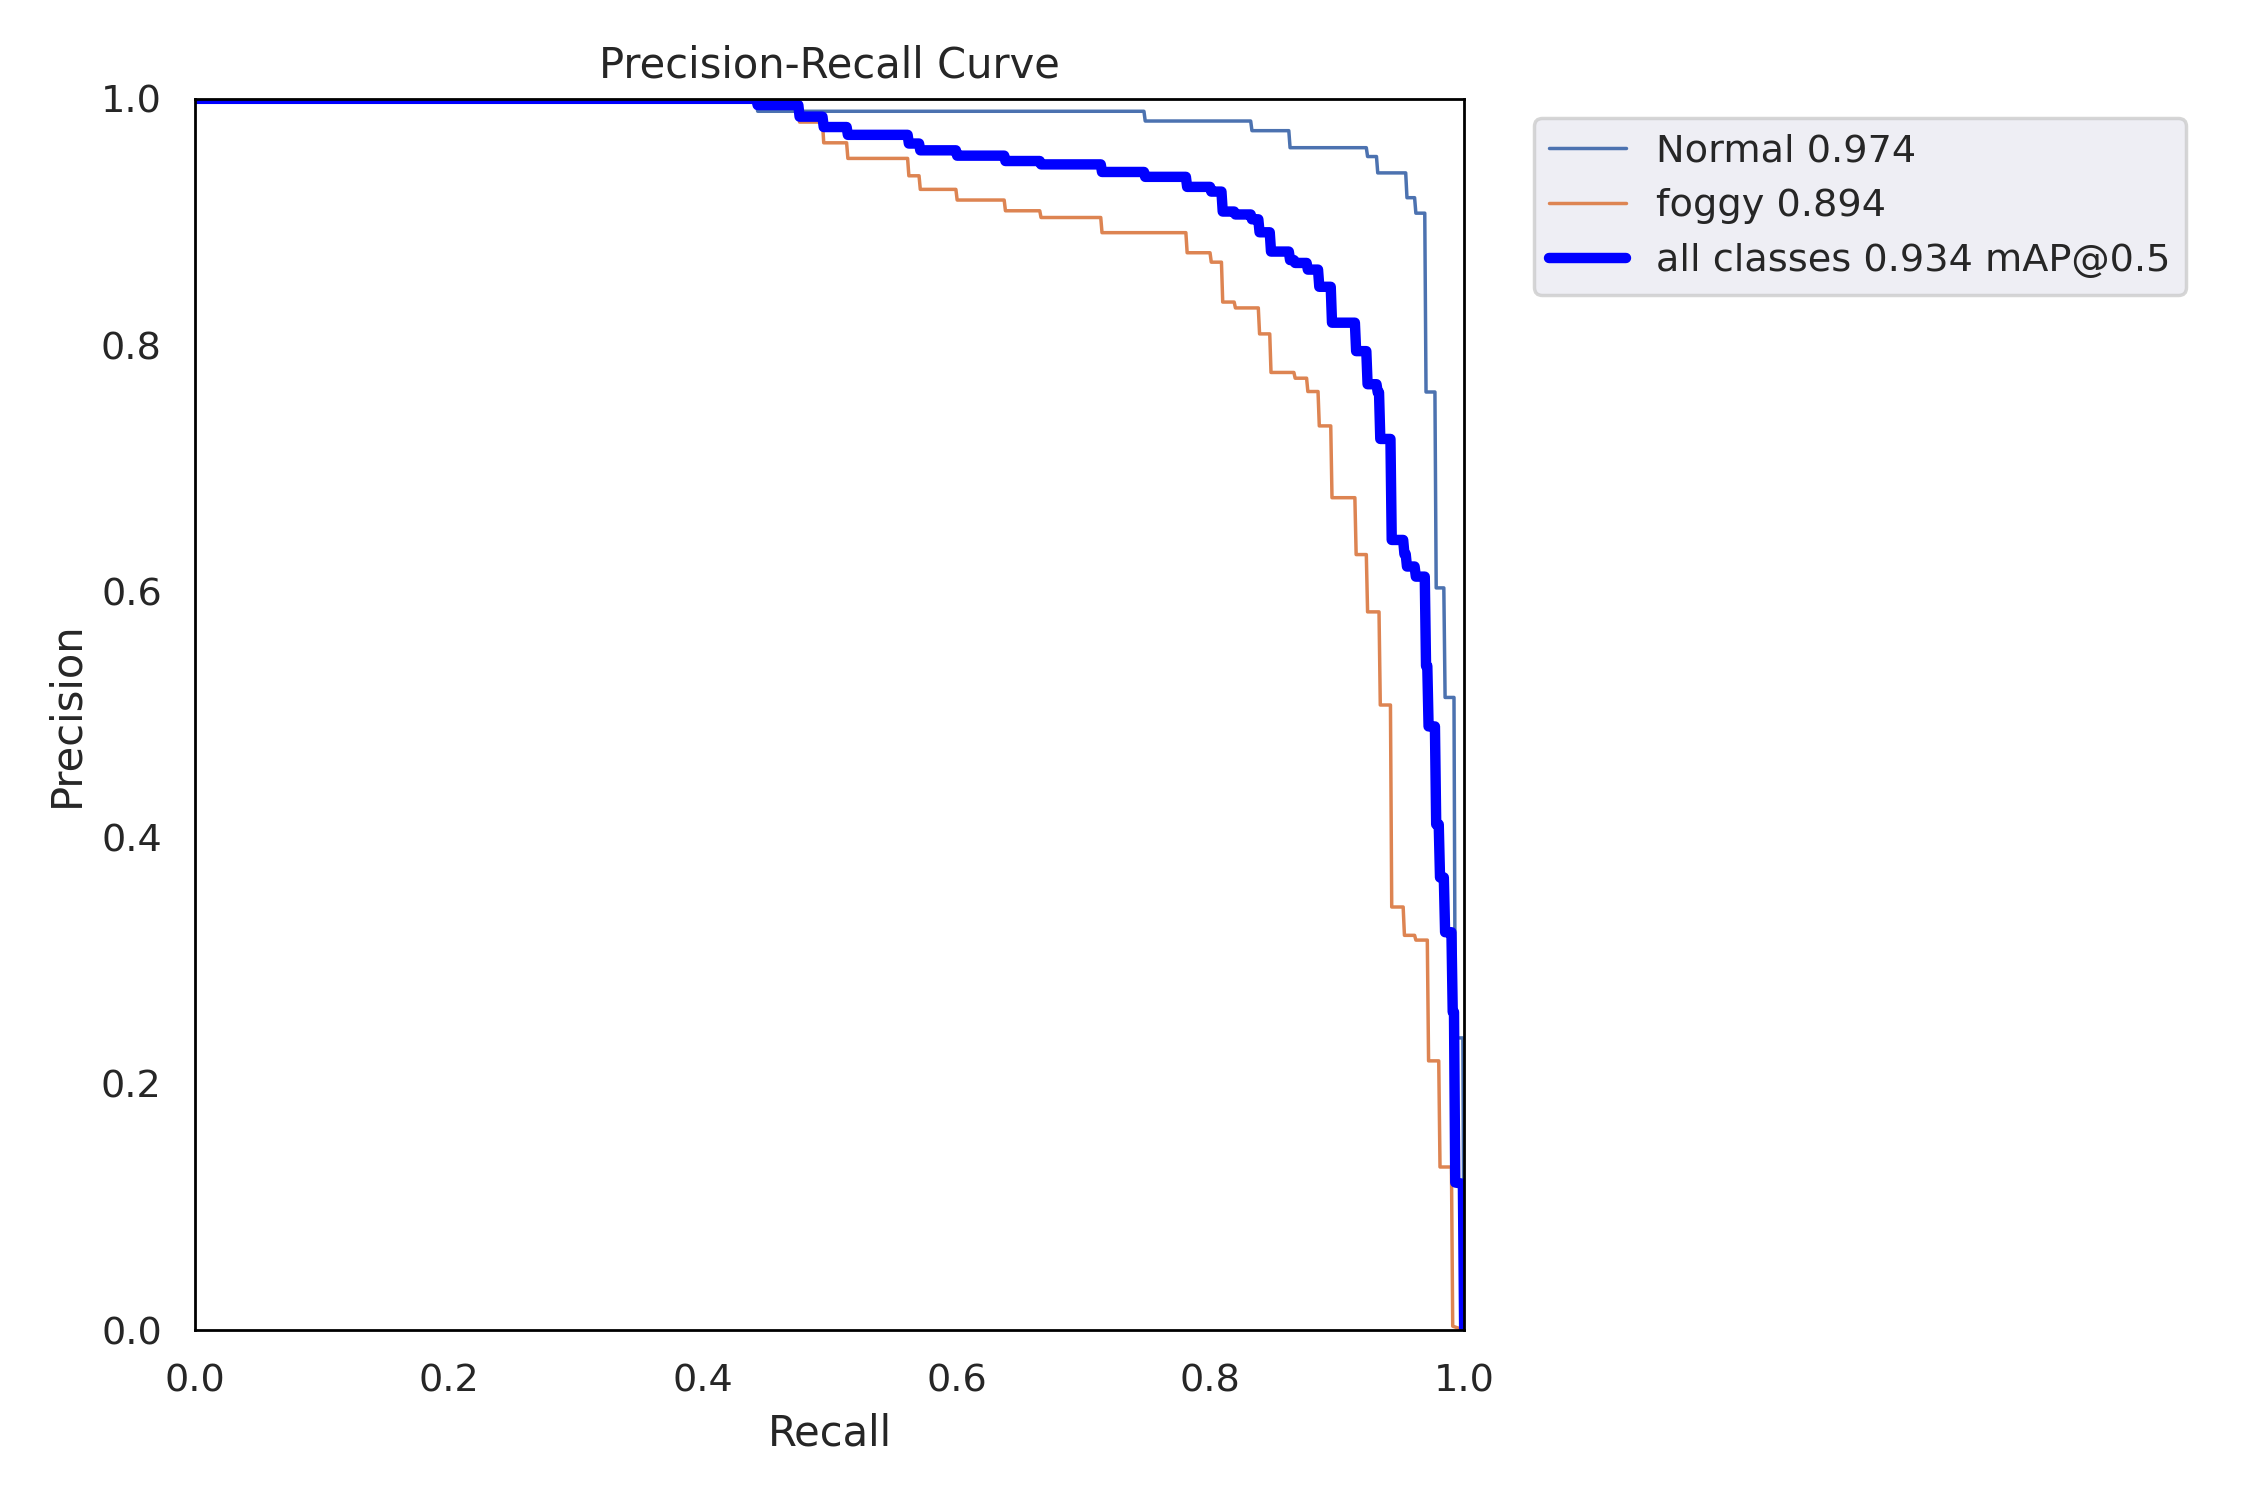

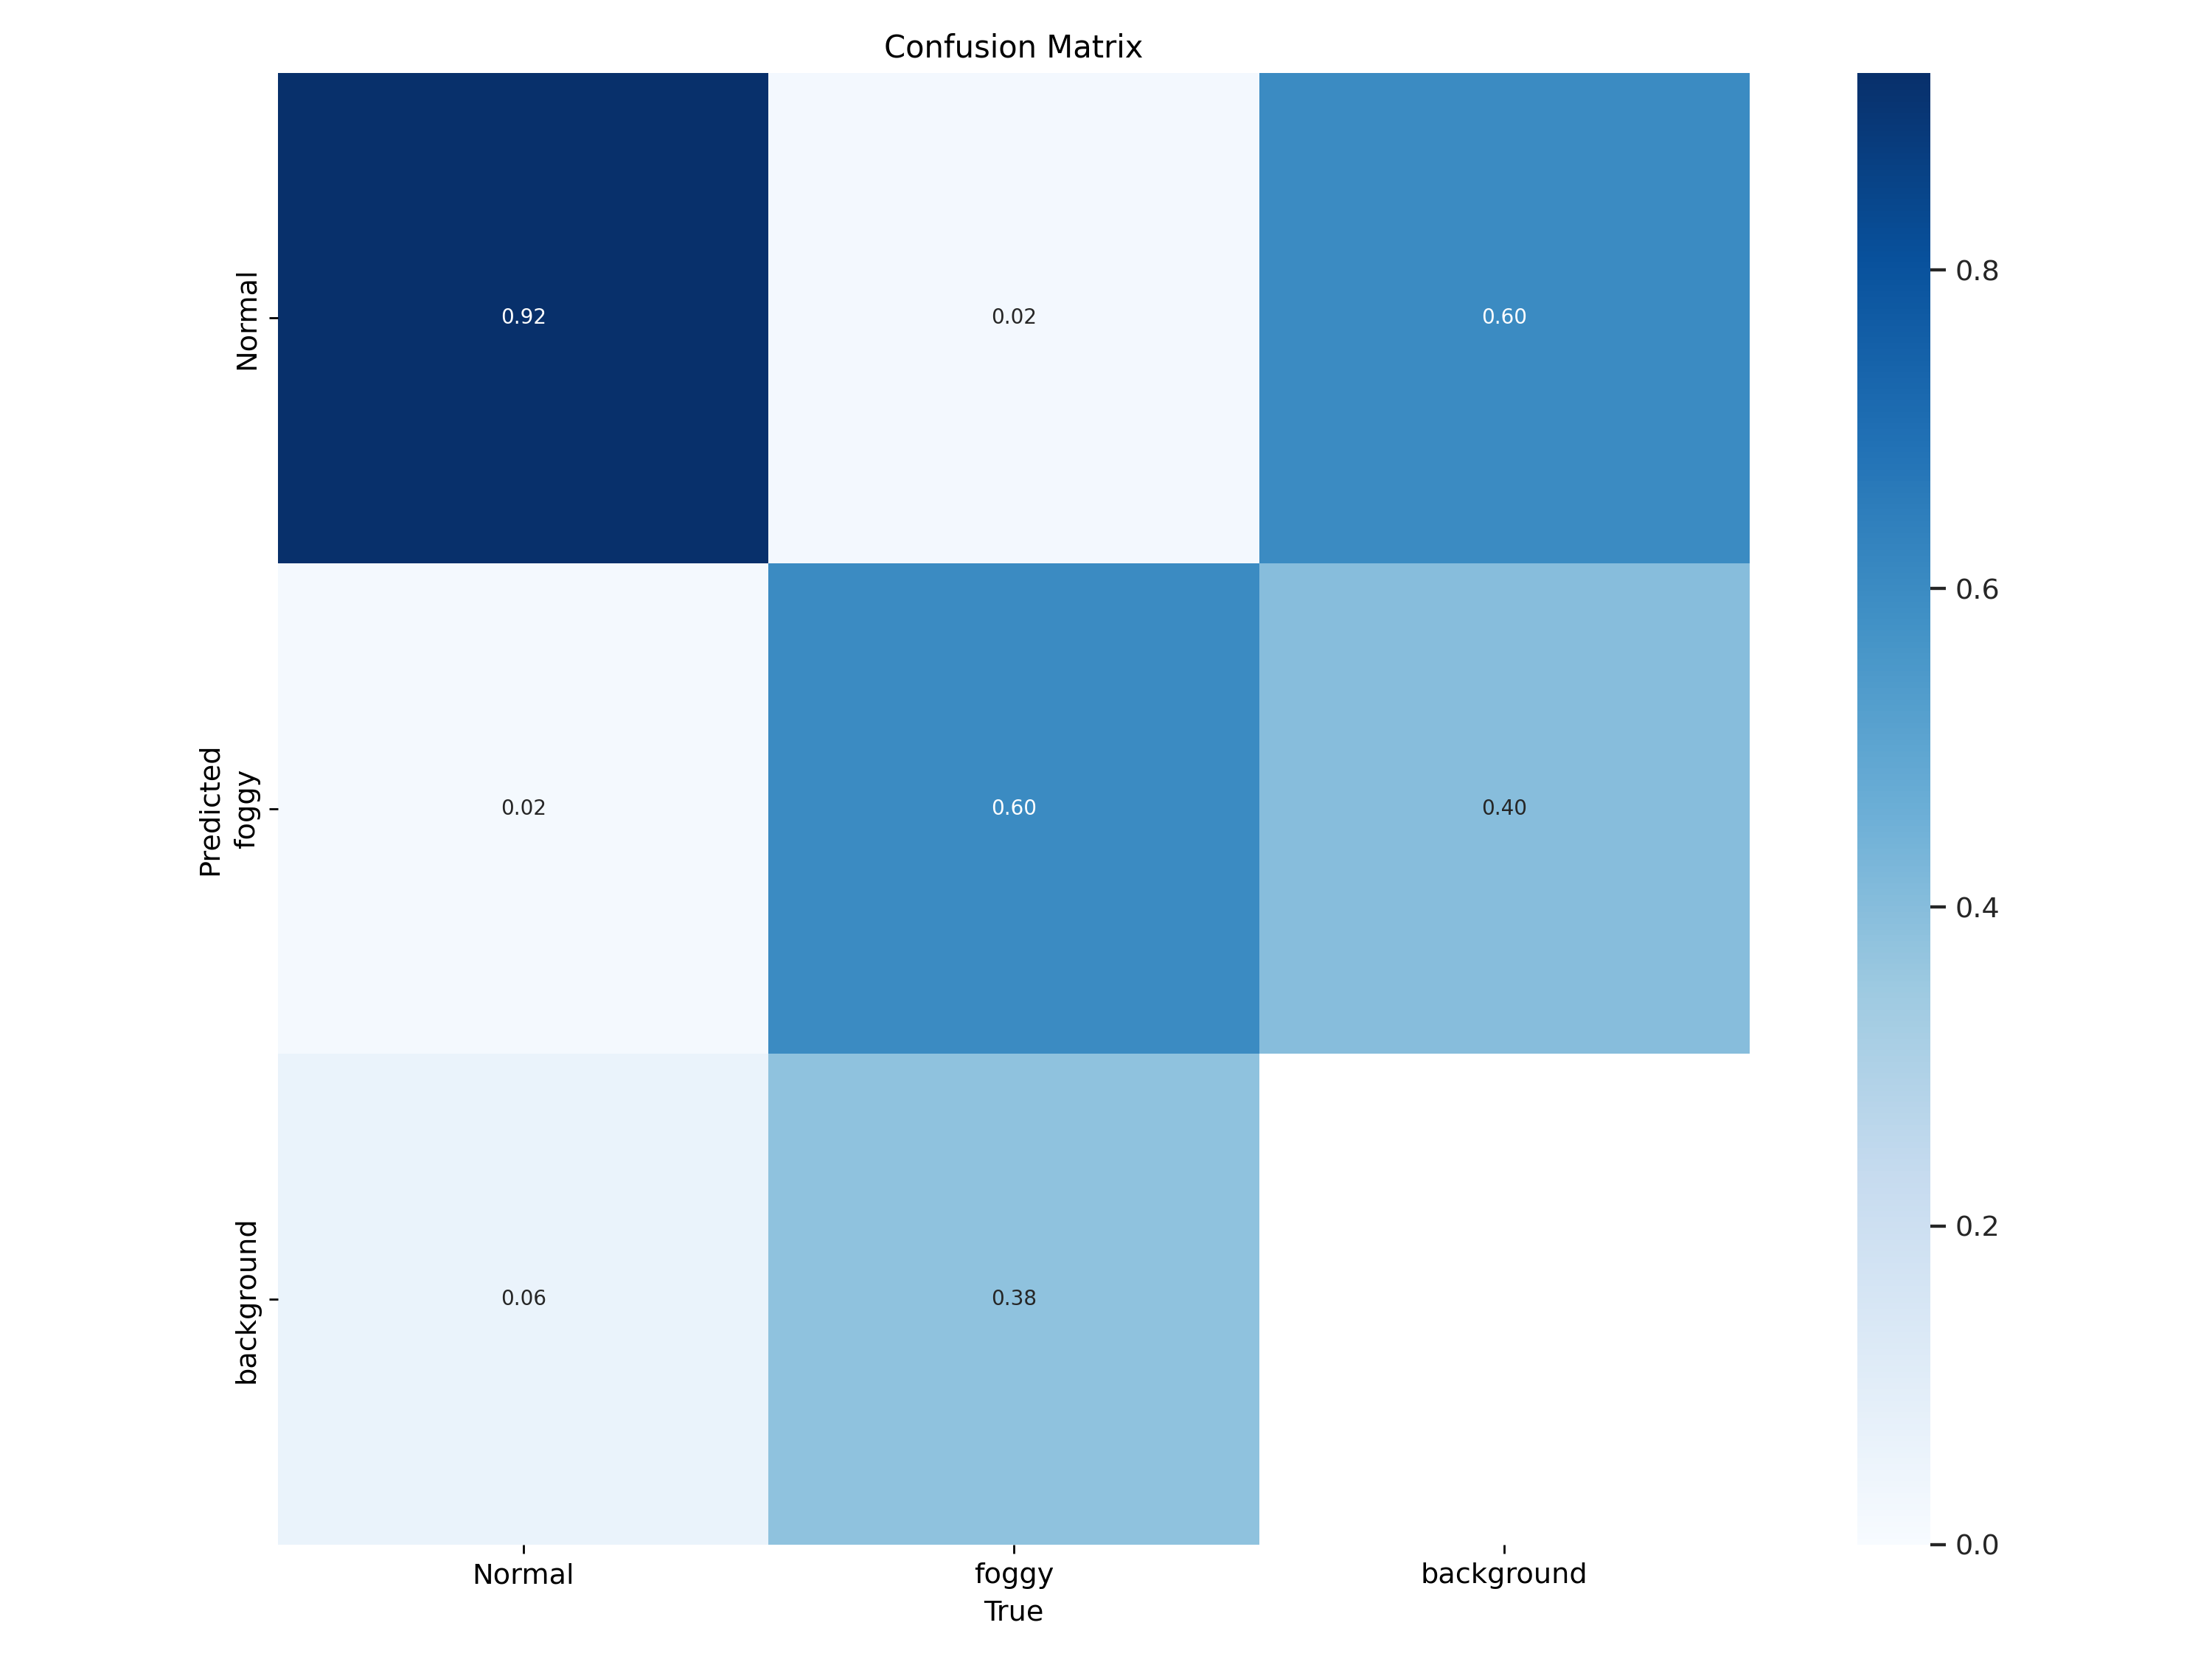

In [26]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp/F1_curve.png')
y = Image(filename='runs/train/exp/PR_curve.png')
z = Image(filename='runs/train/exp/confusion_matrix.png')
display(x, y,z)

**R-YoloV3**

In [27]:
!python train.py --data /content/drive/MyDrive/2/yolov5/data.yaml --epochs 20 --weights '' --cfg /content/R-YOLO/models/hub/yolov3-tiny.yaml --img 416  # from scratch

2023-12-22 09:35:28.548995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 09:35:28.549049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 09:35:28.550390: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=/content/R-YOLO/models/hub/yolov3-tiny.yaml, data=/content/drive/MyDrive/2/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_

In [7]:
p_yol5 = 0.667
r_yol5 = 0.836
mAP_yolo5 = 0.831

storeResults('R-YoloV3',p_yol5,r_yol5,mAP_yolo5)

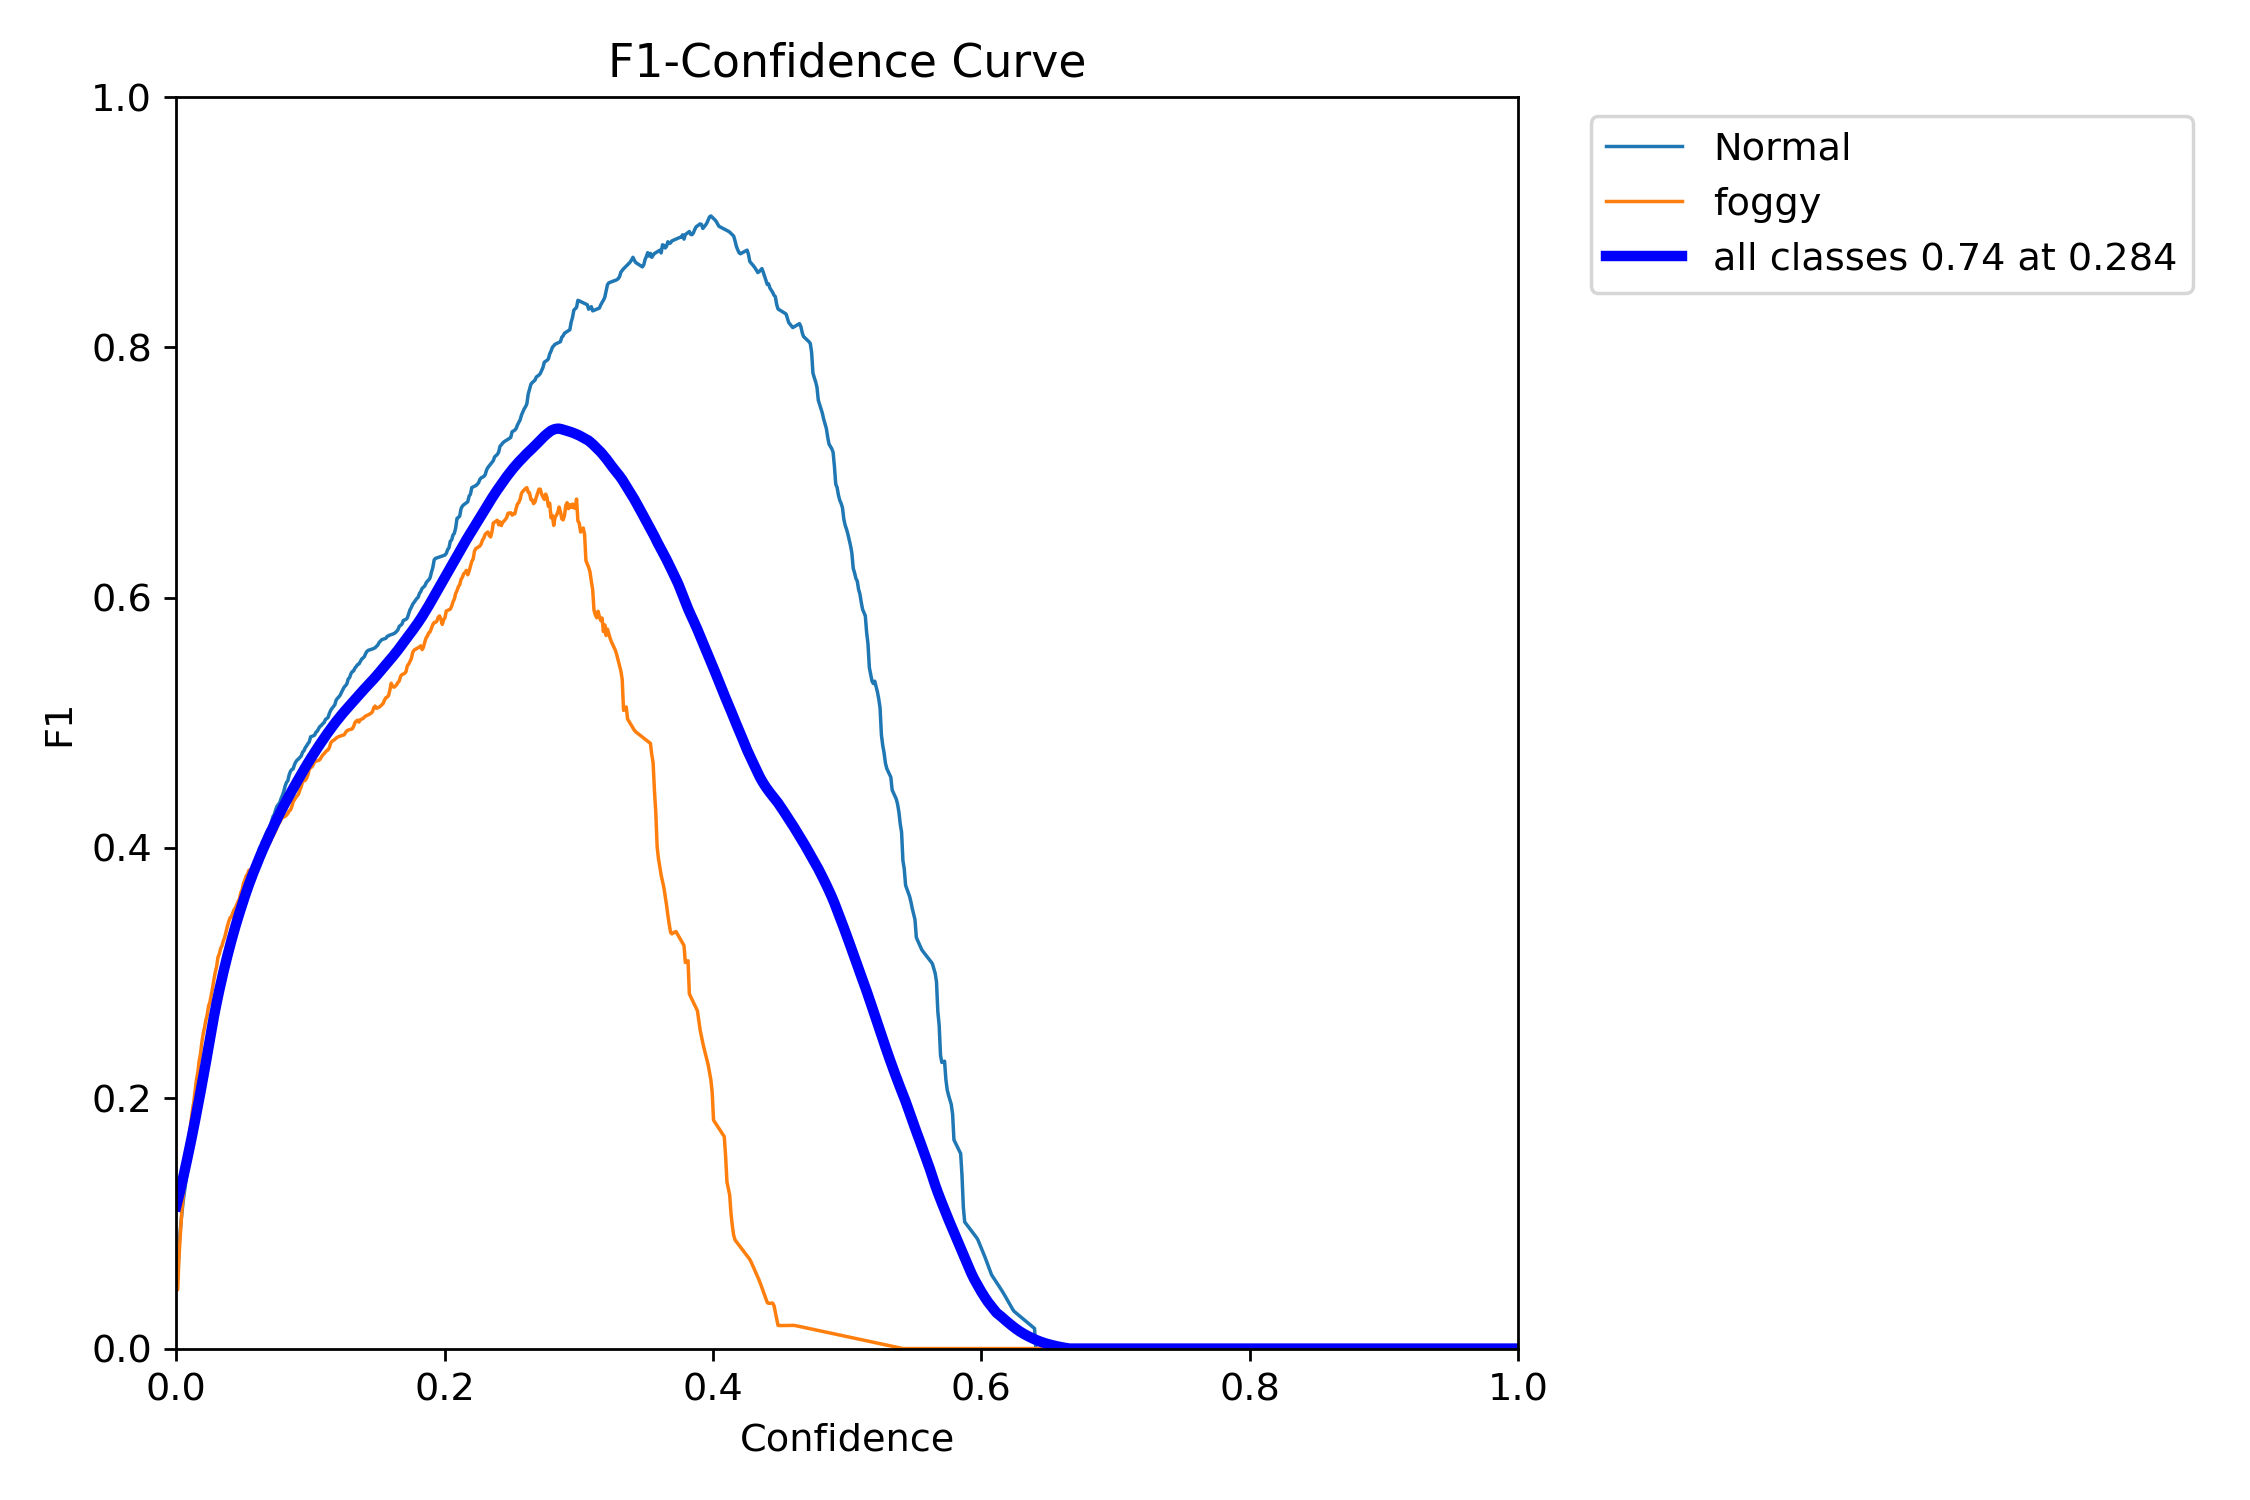

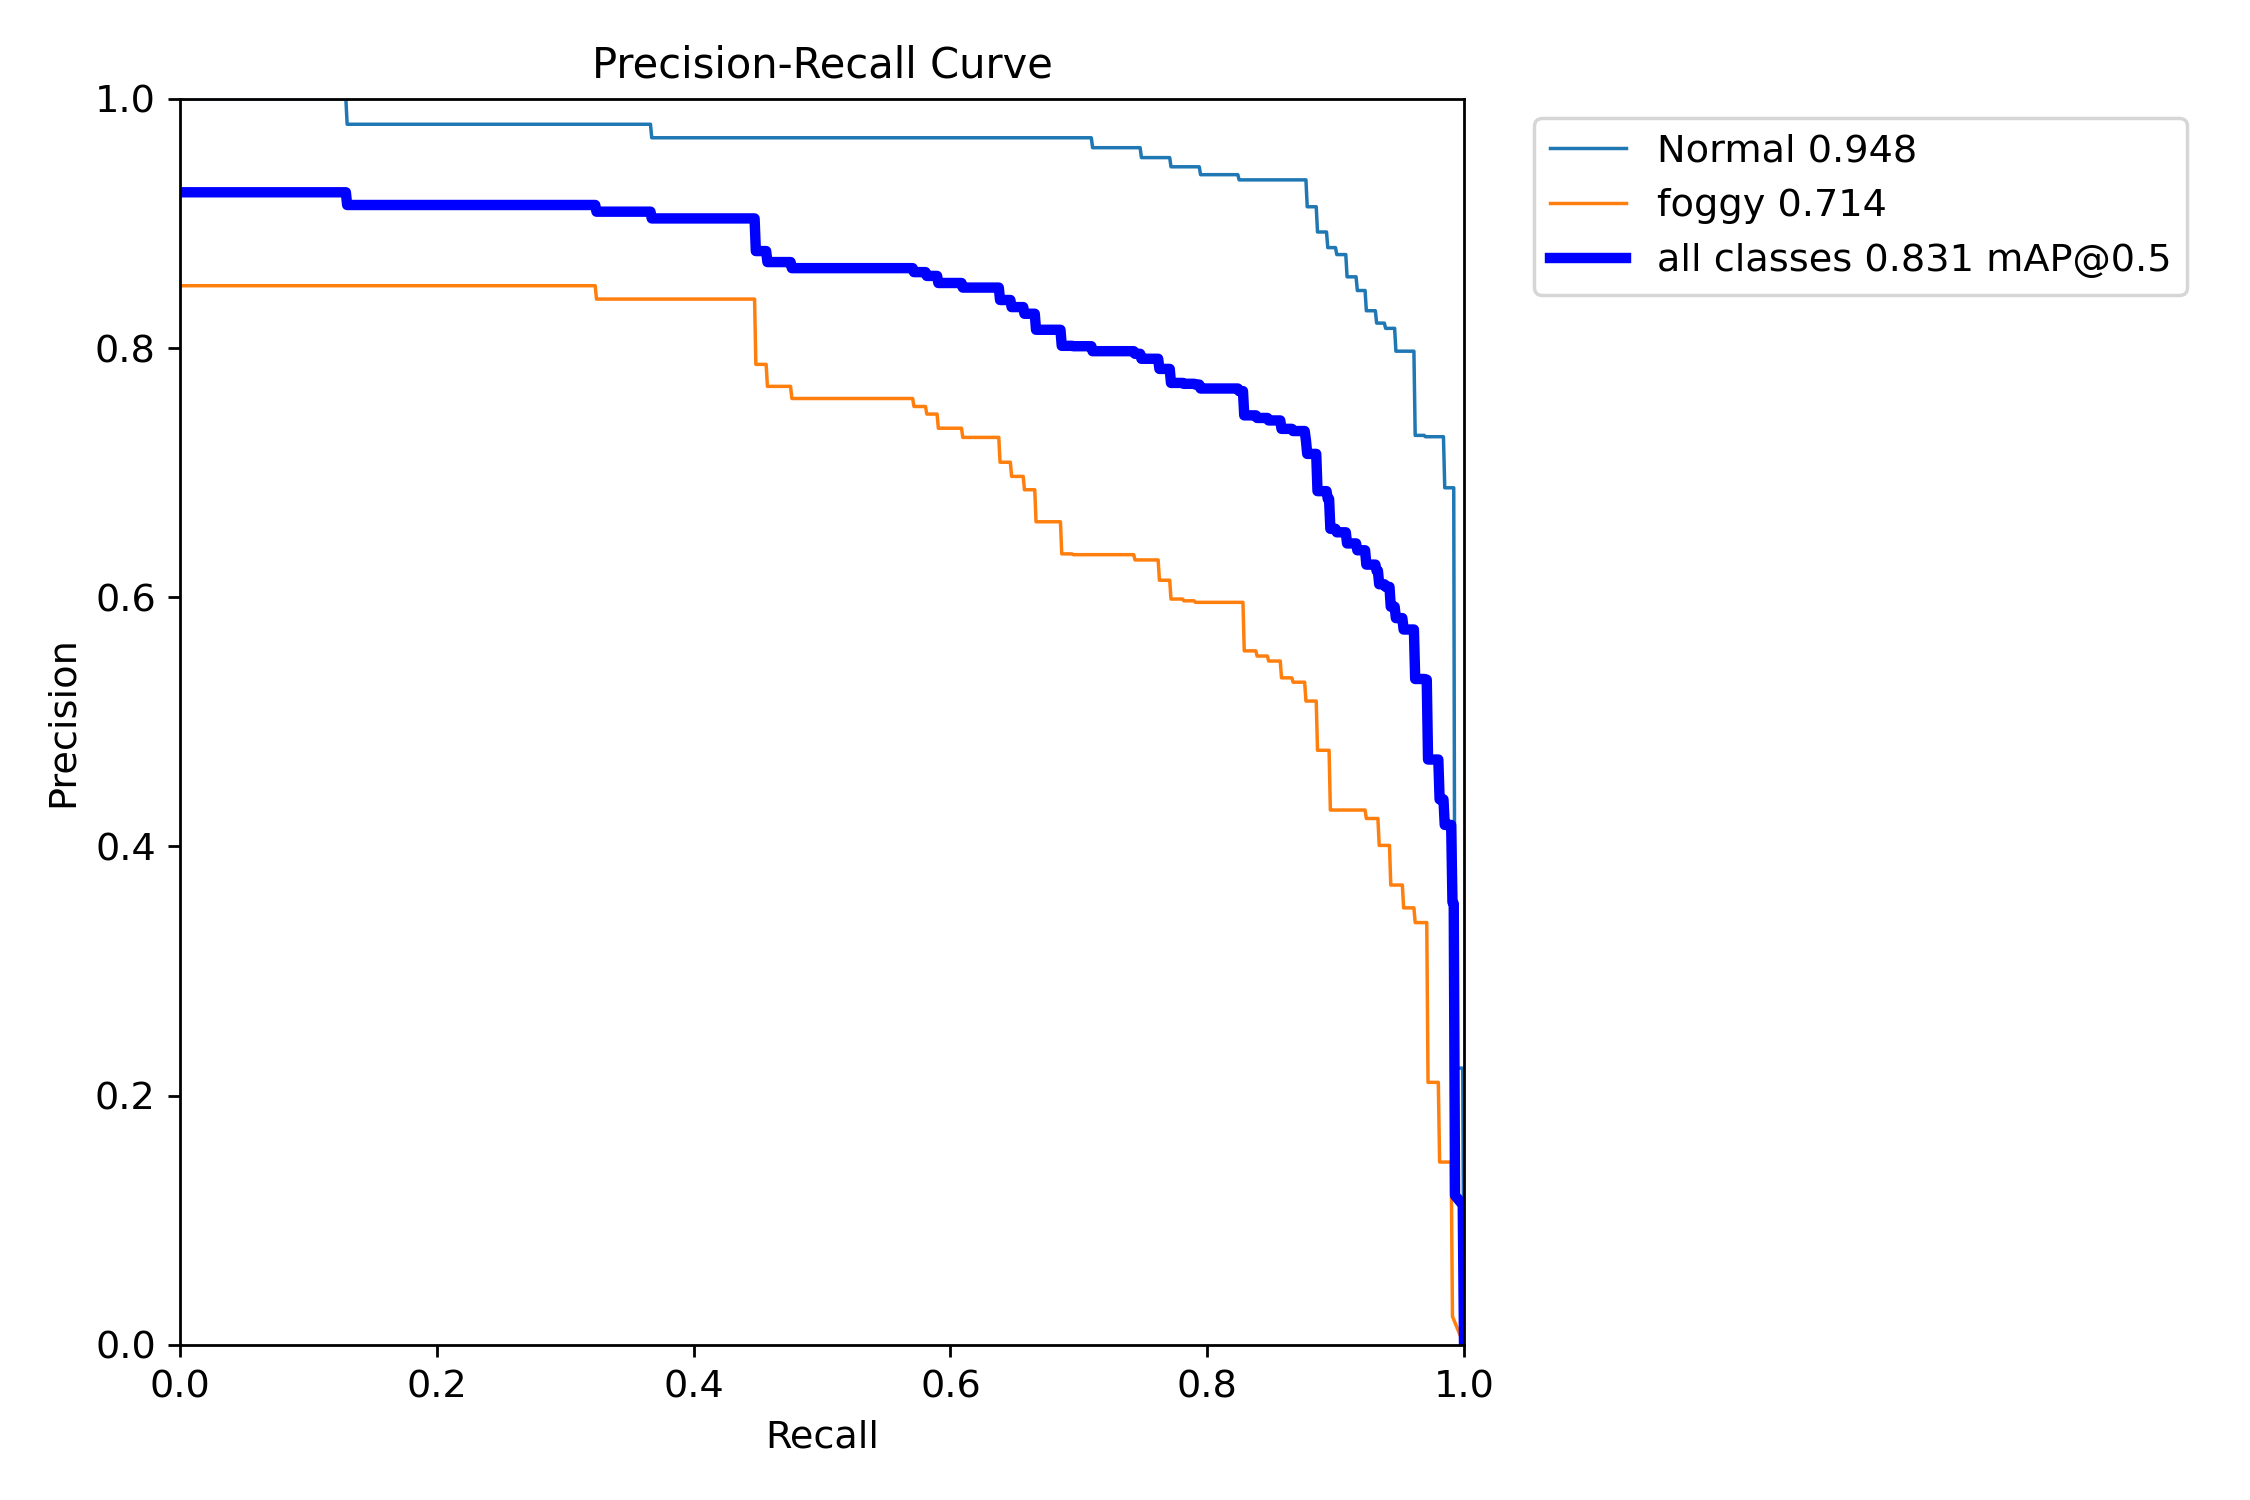

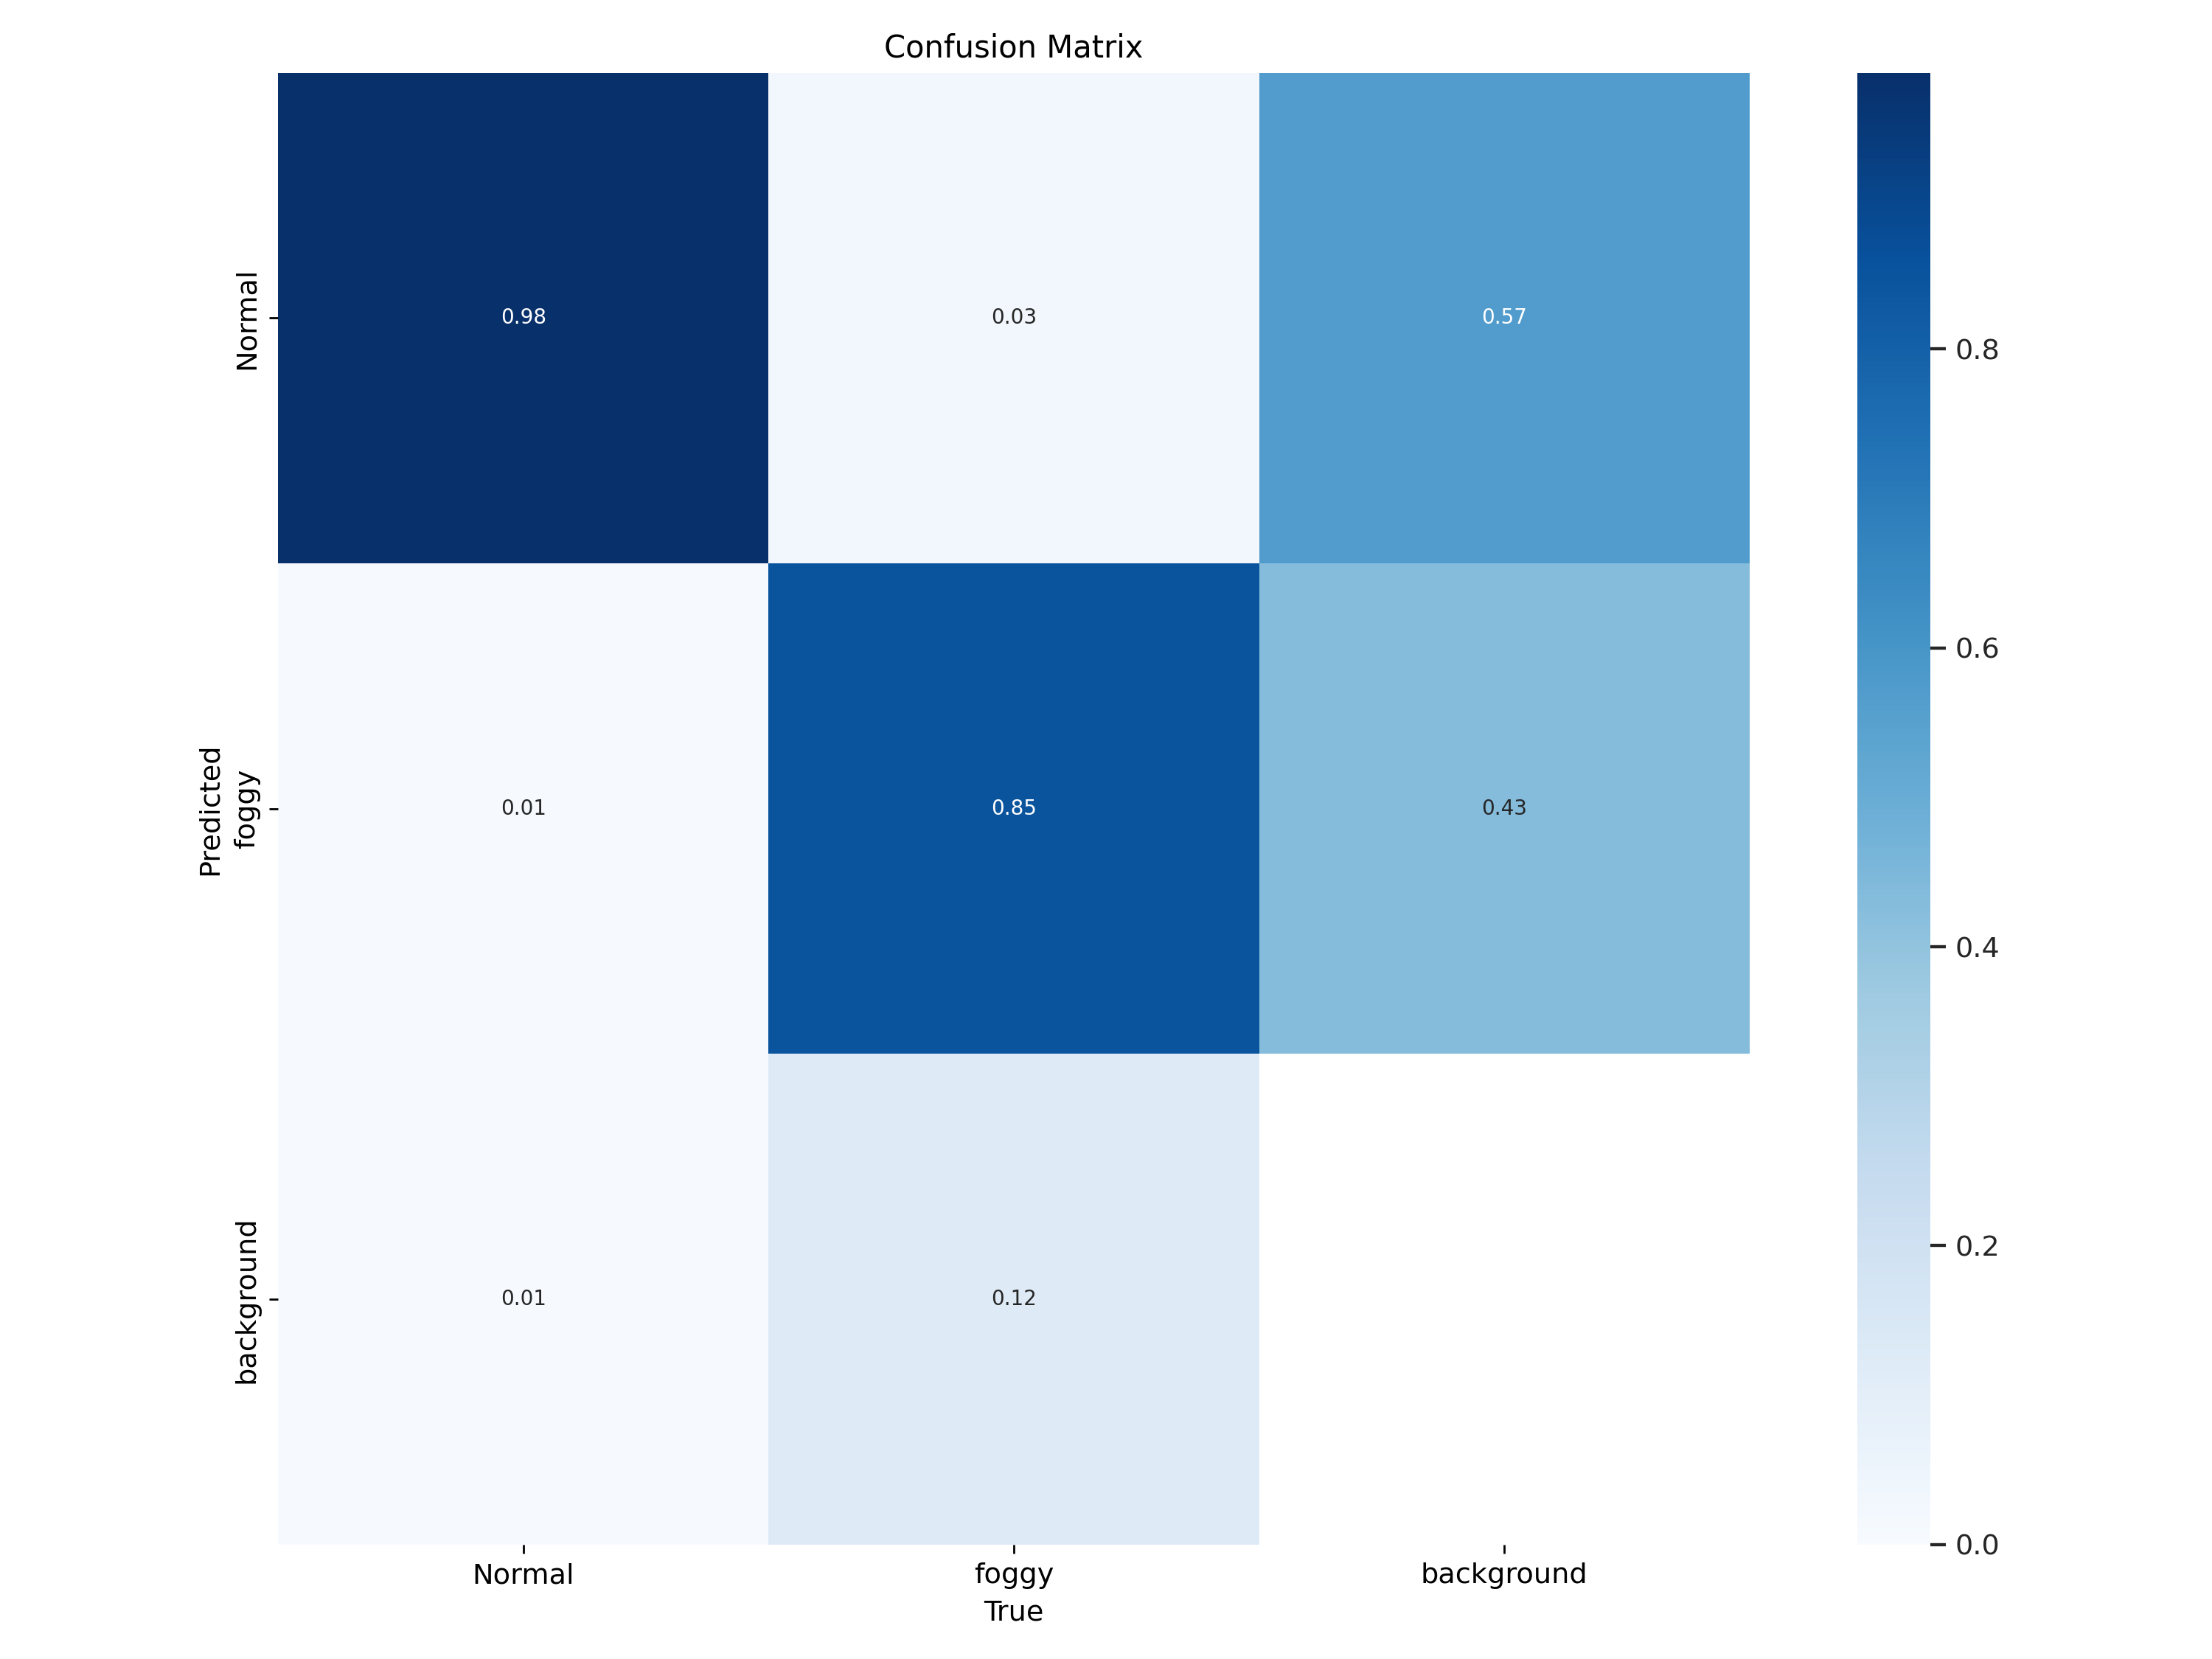

In [29]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp2/F1_curve.png')
y = Image(filename='runs/train/exp2/PR_curve.png')
z = Image(filename='runs/train/exp2/confusion_matrix.png')
display(x, y,z)

**R-YoloVX**

In [28]:
!python train.py --data /content/drive/MyDrive/2/yolov5/data.yaml --epochs 20 --weights '' --cfg /content/R-YOLO/models/yolov5x.yaml --img 416  # from scratch

2023-12-22 09:38:10.622554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 09:38:10.622607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 09:38:10.623936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=/content/R-YOLO/models/yolov5x.yaml, data=/content/drive/MyDrive/2/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=Fals

In [8]:
p_yol5 = 0.171
r_yol5 = 0.476
mAP_yolo5 = 0.276

storeResults('R-YoloVX',p_yol5,r_yol5,mAP_yolo5)

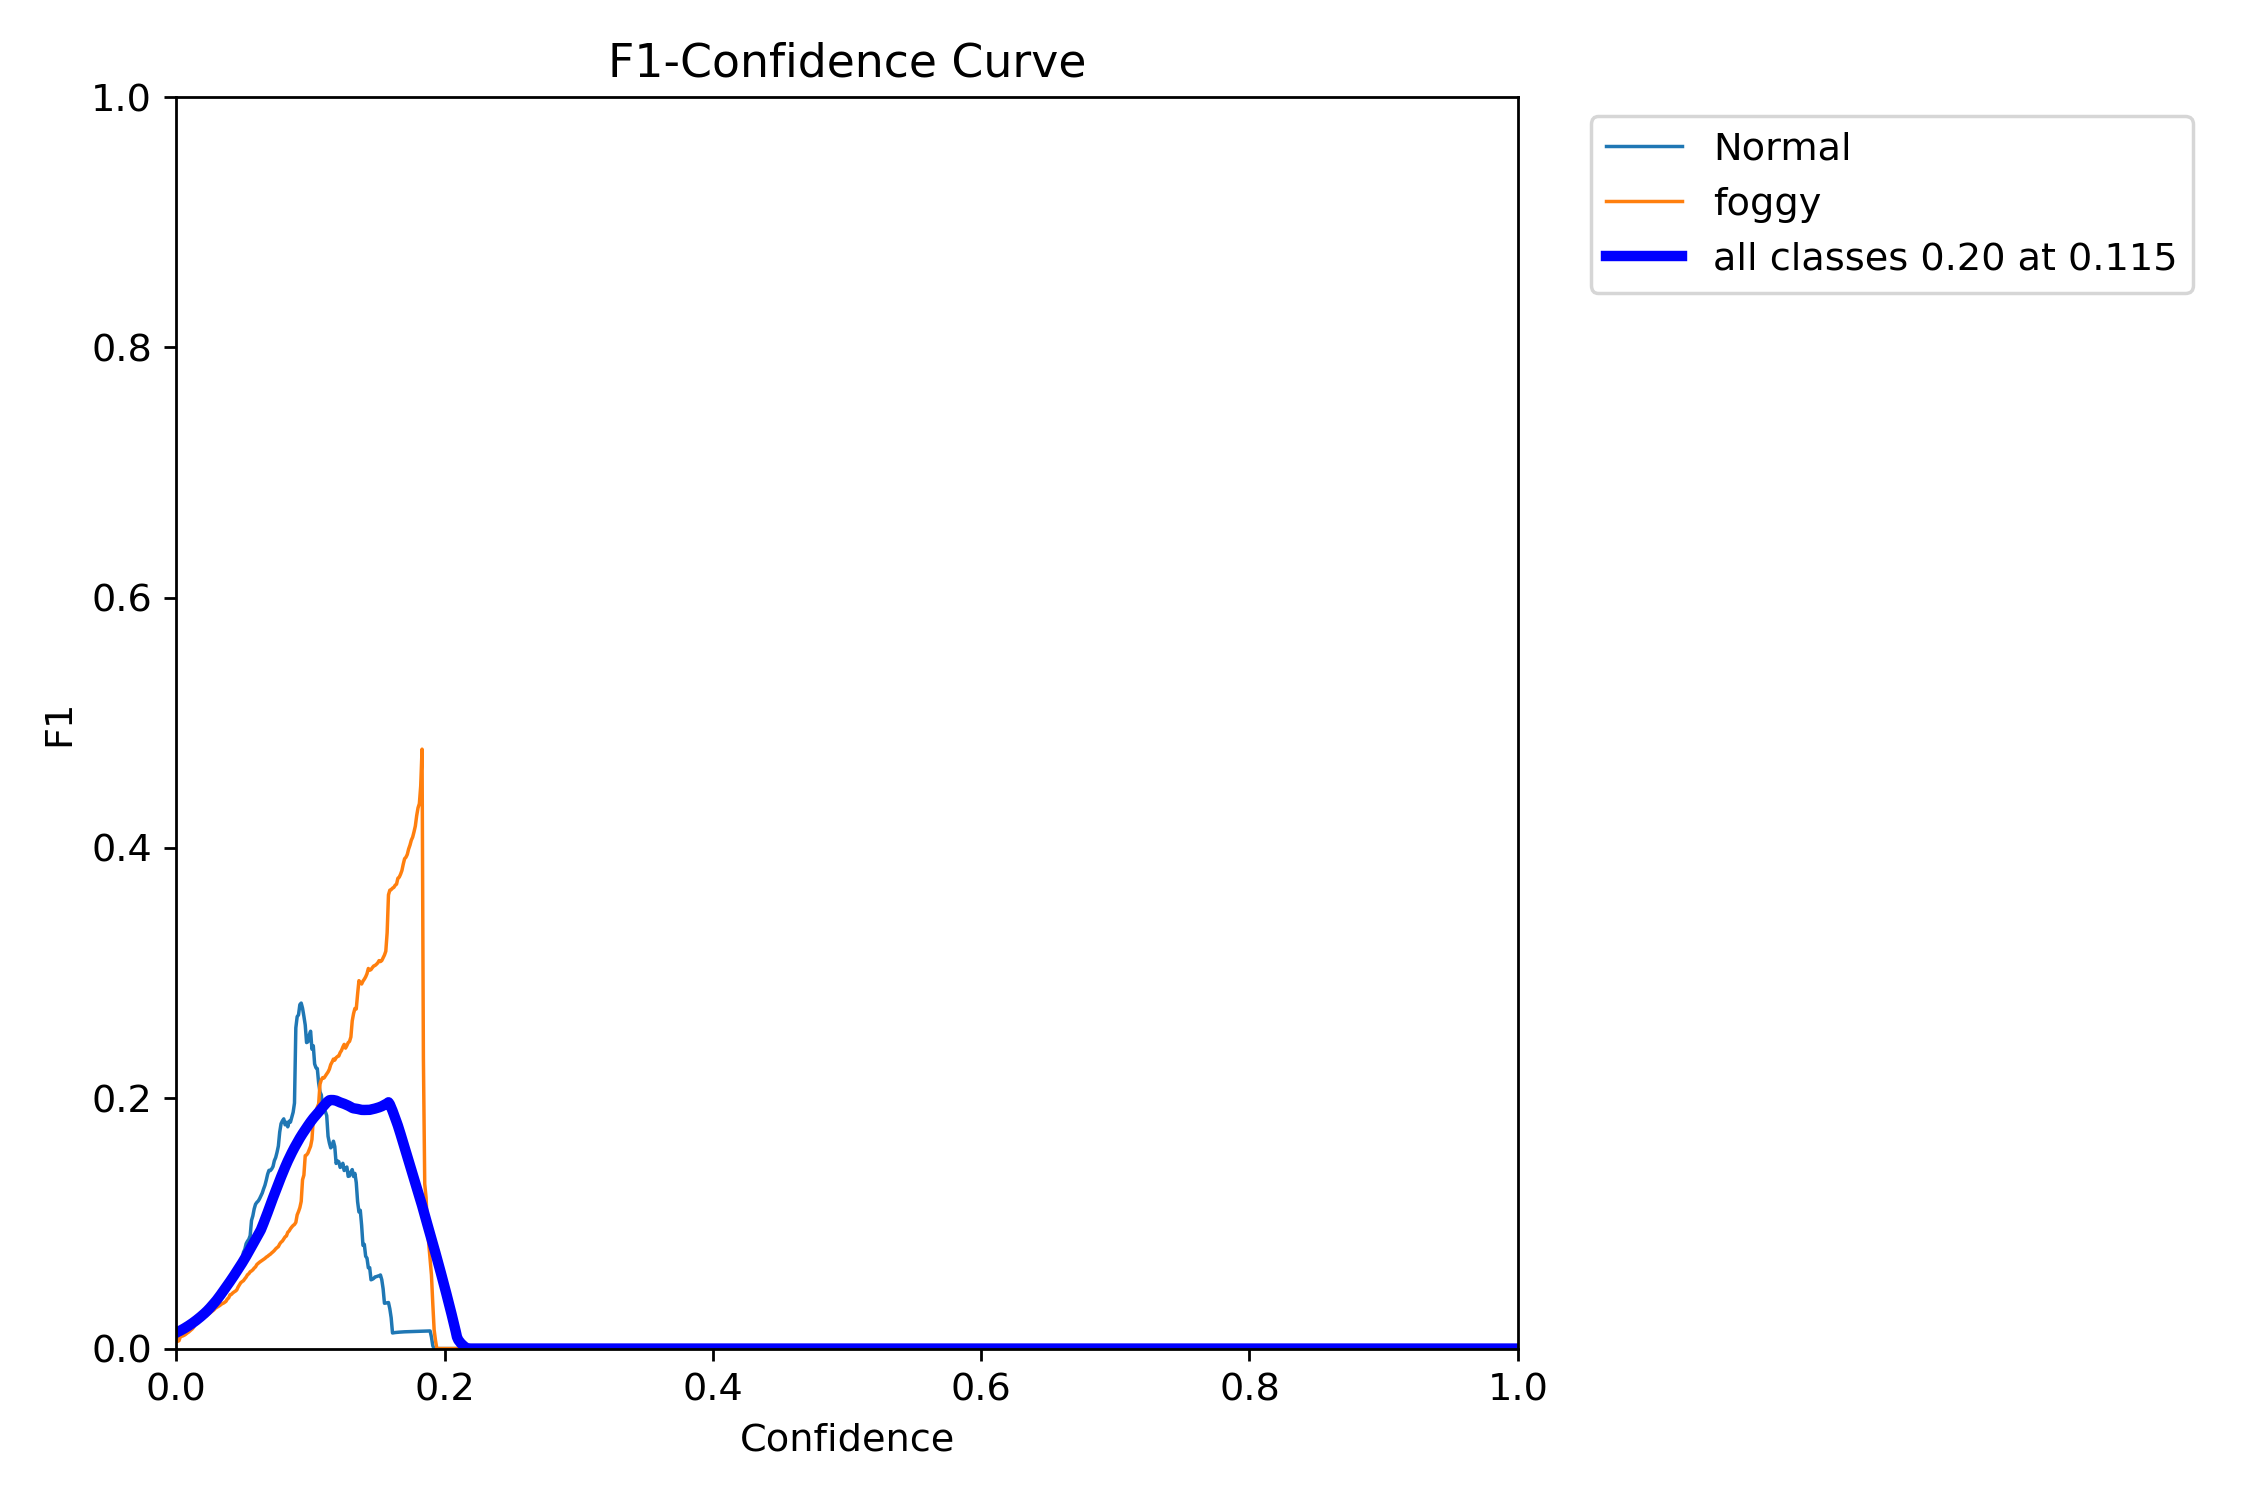

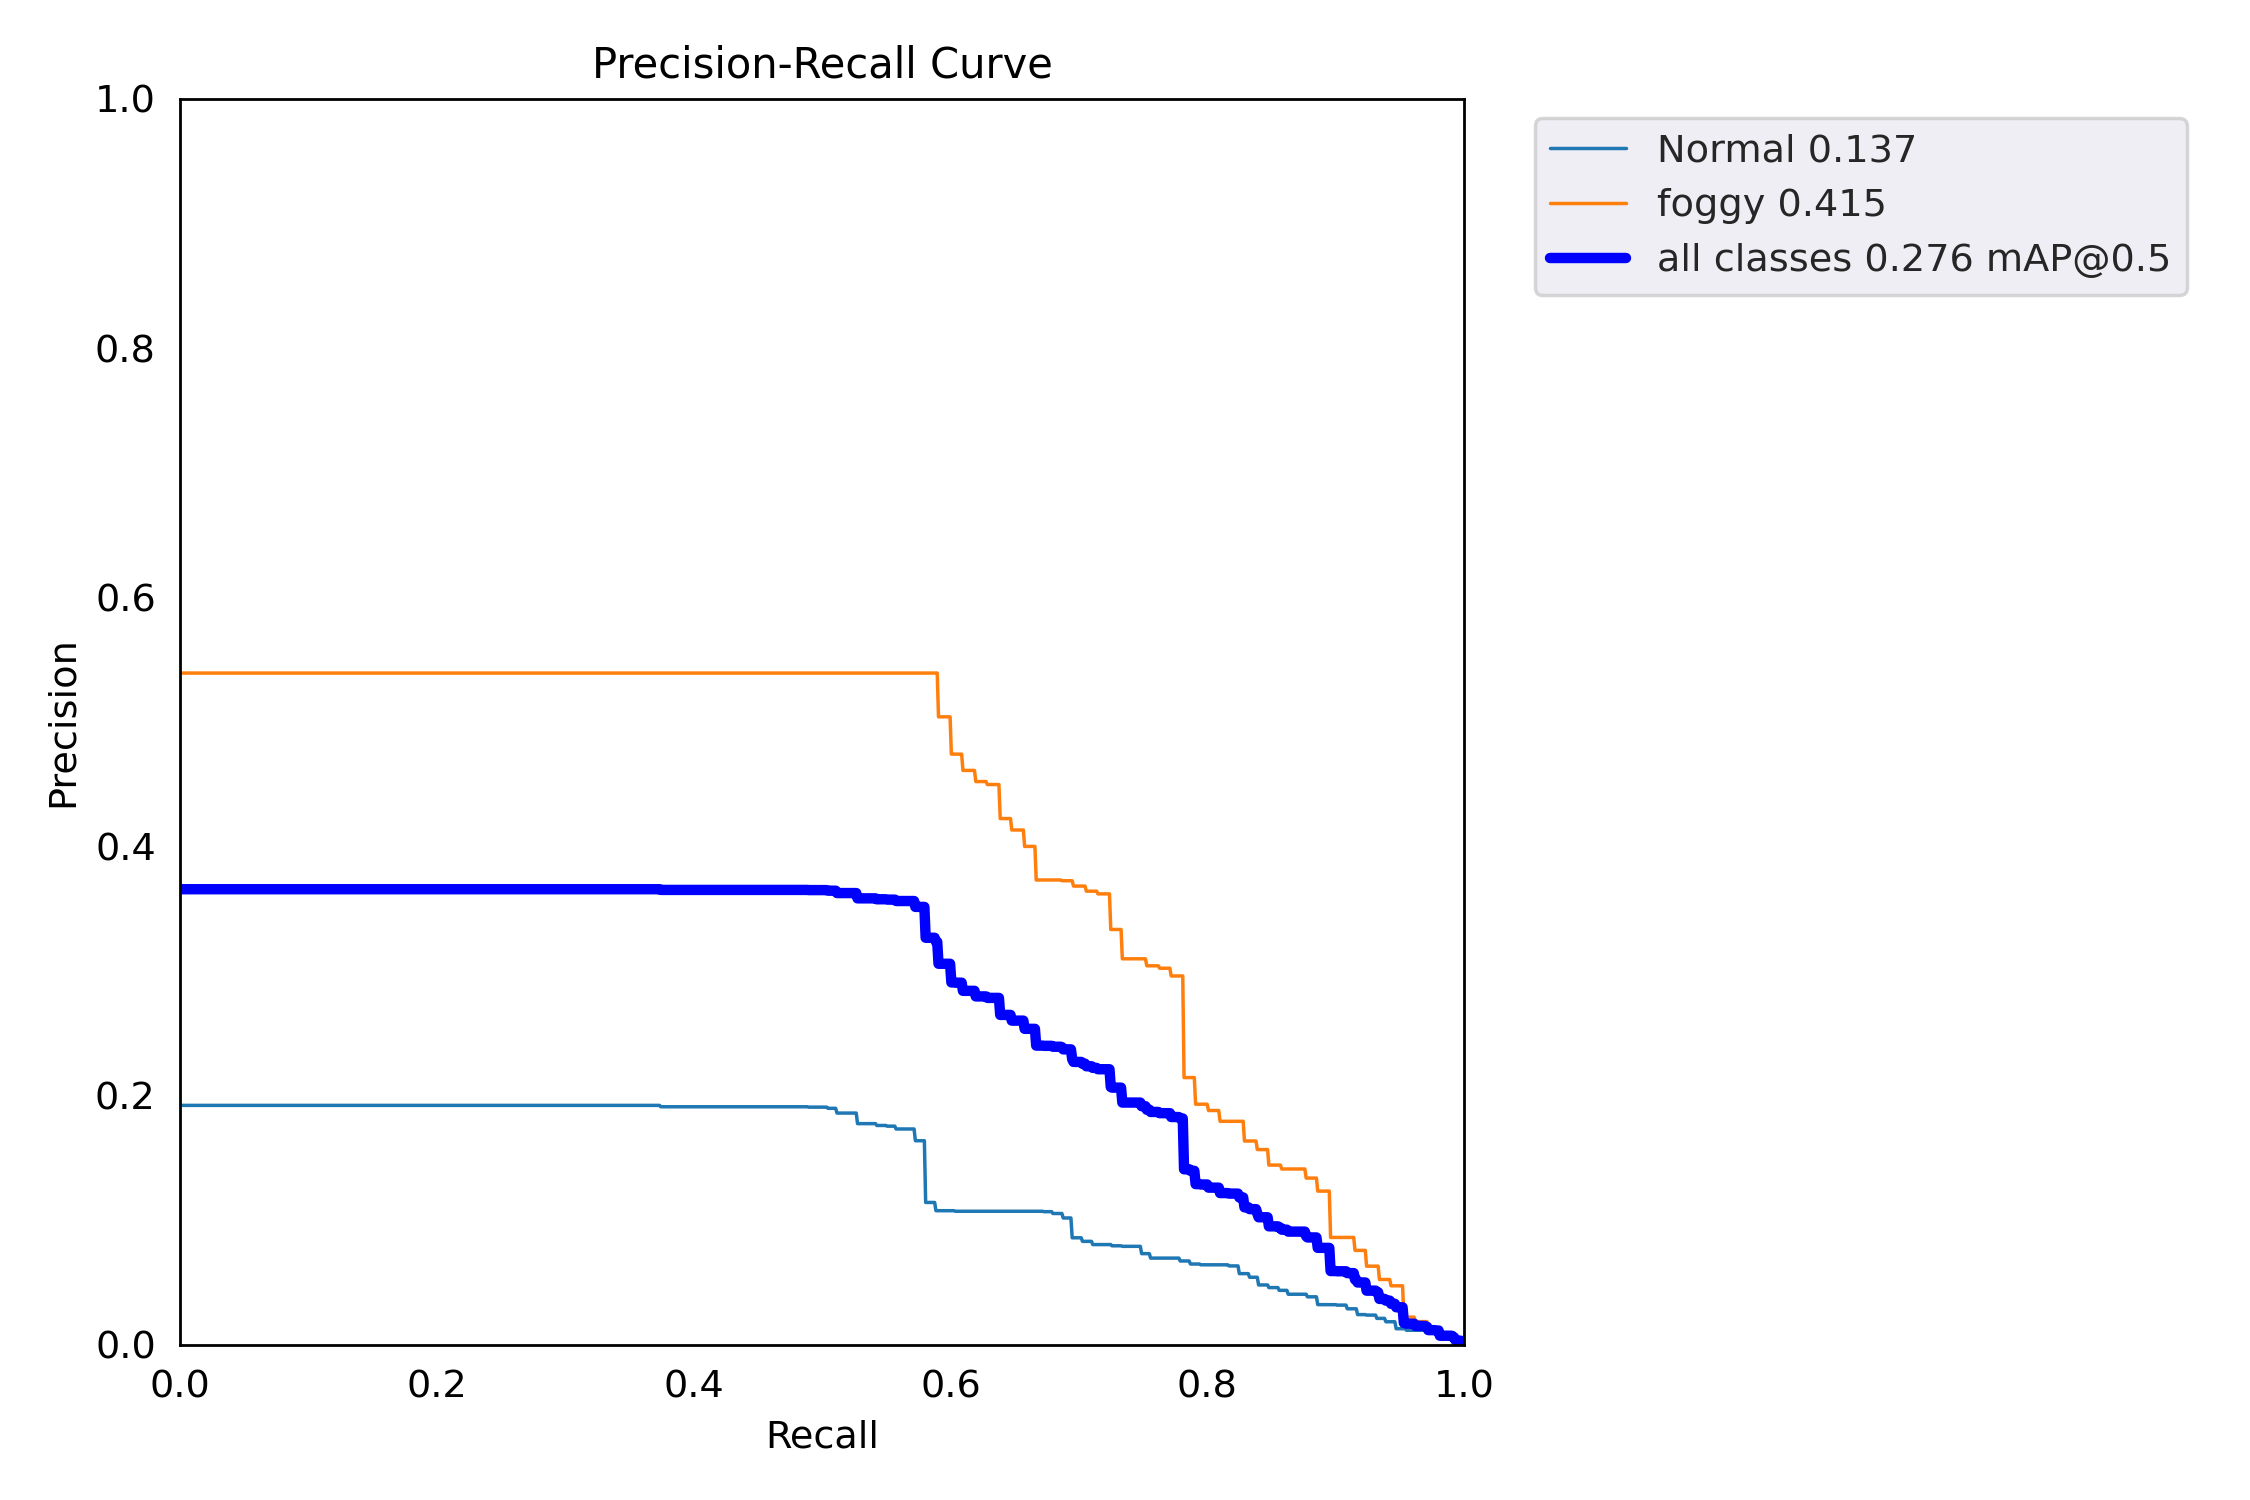

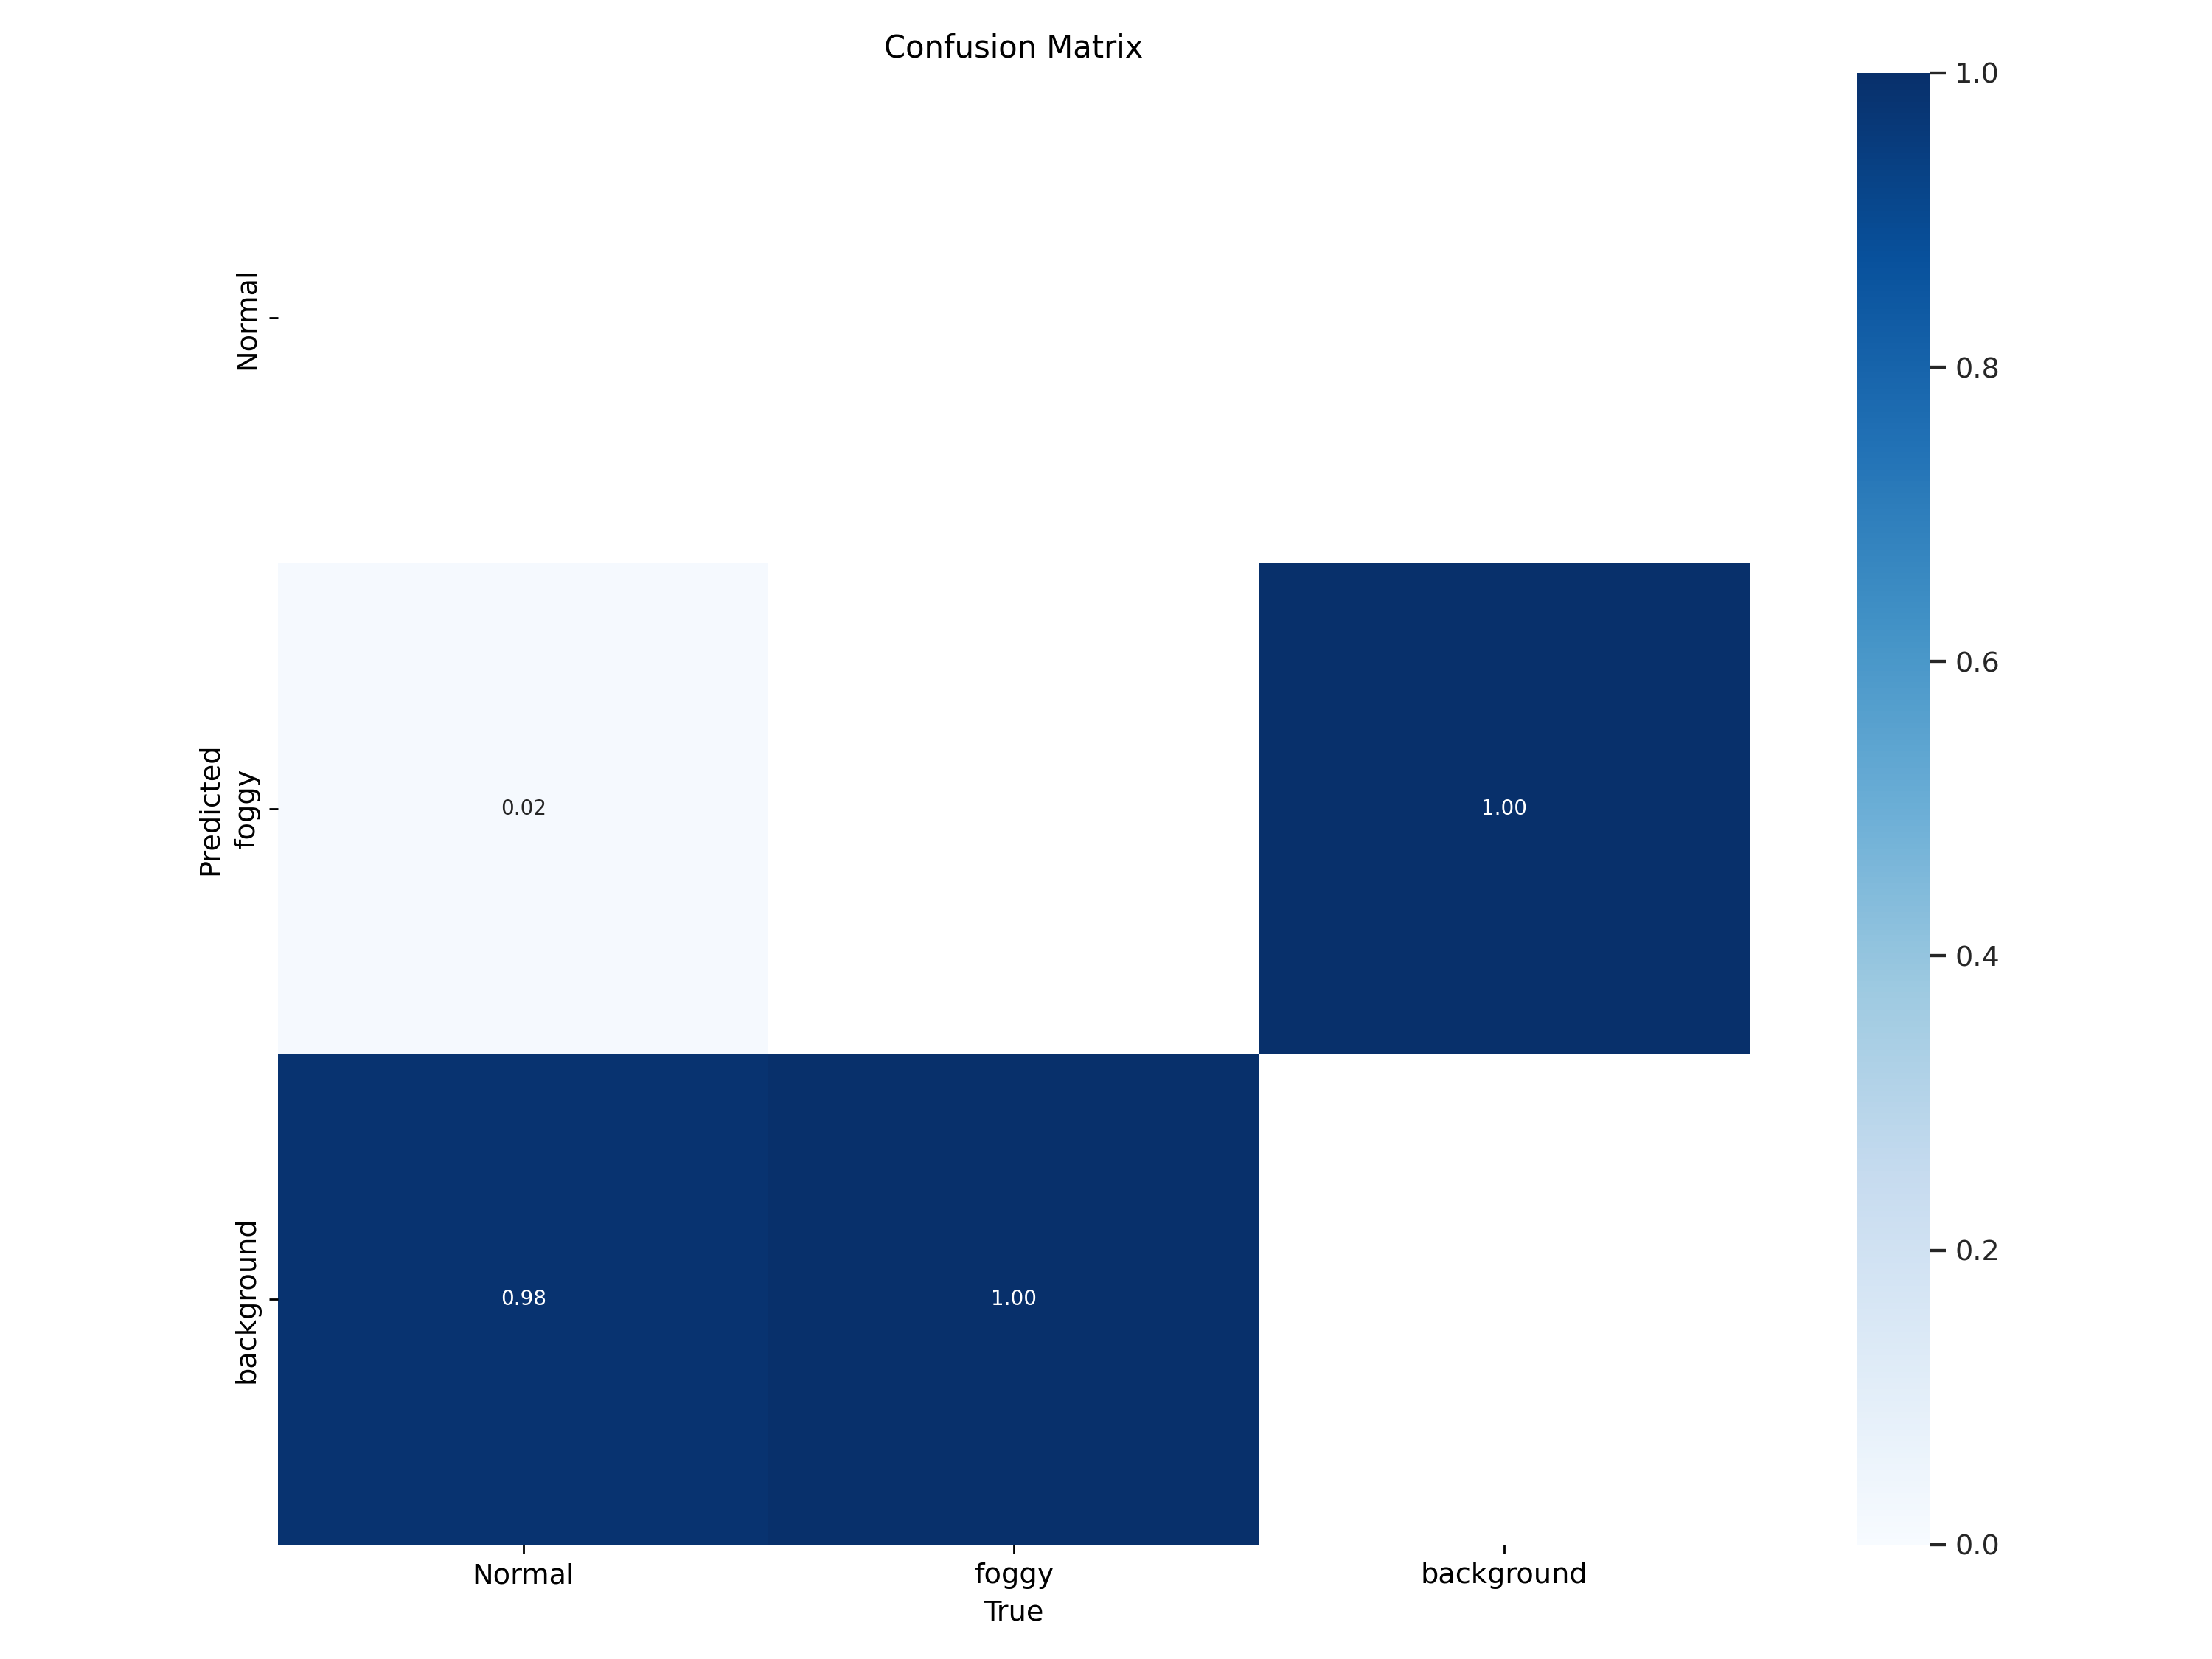

In [30]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp3/F1_curve.png')
y = Image(filename='runs/train/exp3/PR_curve.png')
z = Image(filename='runs/train/exp3/confusion_matrix.png')
display(x, y,z)

In [ ]:
!zip -r /content/drive/MyDrive/2/file.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/tutorial.ipynb (deflated 74%)
  adding: content/yolov5/__pycache__/ (stored 0%)
  adding: content/yolov5/__pycache__/val.cpython-310.pyc (deflated 43%)
  adding: content/yolov5/requirements.txt (deflated 55%)
  adding: content/yolov5/export.py (deflated 72%)
  adding: content/yolov5/.gitignore (deflated 55%)
  adding: content/yolov5/utils/ (stored 0%)
  adding: content/yolov5/utils/metrics.py (deflated 66%)
  adding: content/yolov5/utils/loss.py (deflated 69%)
  adding: content/yolov5/utils/autobatch.py (deflated 56%)
  adding: content/yolov5/utils/__pycache__/ (stored 0%)
  adding: content/yolov5/utils/__pycache__/__init__.cpython-310.pyc (deflated 40%)
  adding: content/yolov5/utils/__pycache__/downloads.cpython-310.pyc (deflated 42%)
  adding: content/yolov5/utils/__pycache__/dataloaders.cpython-310.pyc (deflated 51%)
  adding: content/yolov5/utils/__pycache__/callbacks.cpython-310.pyc (deflated 51%)
  adding: content/yo

# YoloV8

In [ ]:
%cd /content

/content


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 7.6 MB/s eta 0:00:00


In [ ]:
# check the uploaded data in drive
!ls '/content/drive/MyDrive/2/yolov8'
!ls '/content/drive/MyDrive/2/yolov8/train/'

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
images	labels


In [ ]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/drive/MyDrive/2/yolov8/train/images/00001_jpg.rf.de5a3f7d25a03019ec4623efd525fde3.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/drive/MyDrive/2/yolov8/train/images/00026_jpg.rf.98a3513d7116f3ea66f789cd8f457083.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 640, 640
shape of the validation image 640, 640


In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/2/yolov8/data.yaml", epochs=20, imgsz=416)  # train the model

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.1MB/s]


Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/2/yolov8/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/2/yolov8/train/labels... 655 images, 0 backgrounds, 0 corrupt: 100%|██████████| 655/655 [00:31<00:00, 20.88it/s]


train: New cache created: /content/drive/MyDrive/2/yolov8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/2/yolov8/valid/labels... 188 images, 0 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:08<00:00, 22.87it/s]

val: New cache created: /content/drive/MyDrive/2/yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.02G     0.5563      1.901      1.136         46        416: 100%|██████████| 41/41 [00:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        188        188      0.859      0.844      0.909      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.02G     0.5023     0.9589      1.082         44        416: 100%|██████████| 41/41 [00:03<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.03it/s]

                   all        188        188      0.595      0.854      0.756       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.02G     0.4641     0.8009      1.046         47        416: 100%|██████████| 41/41 [00:03<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.17it/s]


                   all        188        188      0.847      0.865      0.904      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.02G     0.4763     0.7572      1.043         40        416: 100%|██████████| 41/41 [00:04<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all        188        188      0.808        0.9      0.912      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.04G       0.47     0.6801      1.056         41        416: 100%|██████████| 41/41 [00:03<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        188        188      0.909        0.9      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.02G     0.4448     0.6556      1.047         44        416: 100%|██████████| 41/41 [00:03<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all        188        188       0.94      0.951      0.987      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.02G     0.4631     0.6021      1.048         46        416: 100%|██████████| 41/41 [00:03<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        188        188      0.911      0.919       0.97       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.02G     0.4301     0.5629      1.034         39        416: 100%|██████████| 41/41 [00:03<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        188        188      0.962      0.979      0.989      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.04G     0.4091     0.5307      1.031         41        416: 100%|██████████| 41/41 [00:03<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]

                   all        188        188      0.948      0.962      0.971      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.02G     0.4043     0.5083      1.028         51        416: 100%|██████████| 41/41 [00:03<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        188        188      0.981      0.956      0.991      0.875


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.16G     0.3545     0.6831       1.11         15        416: 100%|██████████| 41/41 [00:05<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all        188        188      0.968      0.987      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.02G     0.3122     0.4674      1.067         15        416: 100%|██████████| 41/41 [00:03<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        188        188      0.974      0.949       0.99      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.04G     0.3048     0.4382      1.061         15        416: 100%|██████████| 41/41 [00:03<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.14it/s]

                   all        188        188      0.967      0.977      0.994      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.02G     0.2709     0.3761      1.063         15        416: 100%|██████████| 41/41 [00:03<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        188        188      0.941      0.949      0.982      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.02G     0.2661     0.3258      1.053         15        416: 100%|██████████| 41/41 [00:03<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.04it/s]

                   all        188        188      0.963      0.971      0.993       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.02G      0.272     0.3218      1.051         15        416: 100%|██████████| 41/41 [00:03<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        188        188      0.974      0.981      0.993      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.04G     0.2644     0.3077      1.042         15        416: 100%|██████████| 41/41 [00:03<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.82it/s]

                   all        188        188      0.974      0.993      0.993      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.02G     0.2618     0.2706      1.049         15        416: 100%|██████████| 41/41 [00:03<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all        188        188      0.977      0.975      0.993      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.02G     0.2475     0.2569      1.041         15        416: 100%|██████████| 41/41 [00:03<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all        188        188      0.961      0.933      0.993      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.02G     0.2452     0.2382      1.049         15        416: 100%|██████████| 41/41 [00:03<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        188        188      0.974      0.992      0.995      0.912



20 epochs completed in 0.031 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]


                   all        188        188      0.963      0.971      0.993       0.92
                Normal        188        109       0.99      0.954      0.994      0.904
                 foggy        188         79      0.935      0.987      0.993      0.936
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [ ]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/2/yolov8/valid/labels.cache... 188 images, 0 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]


                   all        188        188      0.963      0.971      0.993      0.918
                Normal        188        109       0.99      0.954      0.994      0.904
                 foggy        188         79      0.935      0.987      0.993      0.933
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train2


In [9]:
p_yol5 = 0.963
r_yol5 = 0.971
mAP_yolo5 = 0.993

storeResults('YoloV8',p_yol5,r_yol5,mAP_yolo5)

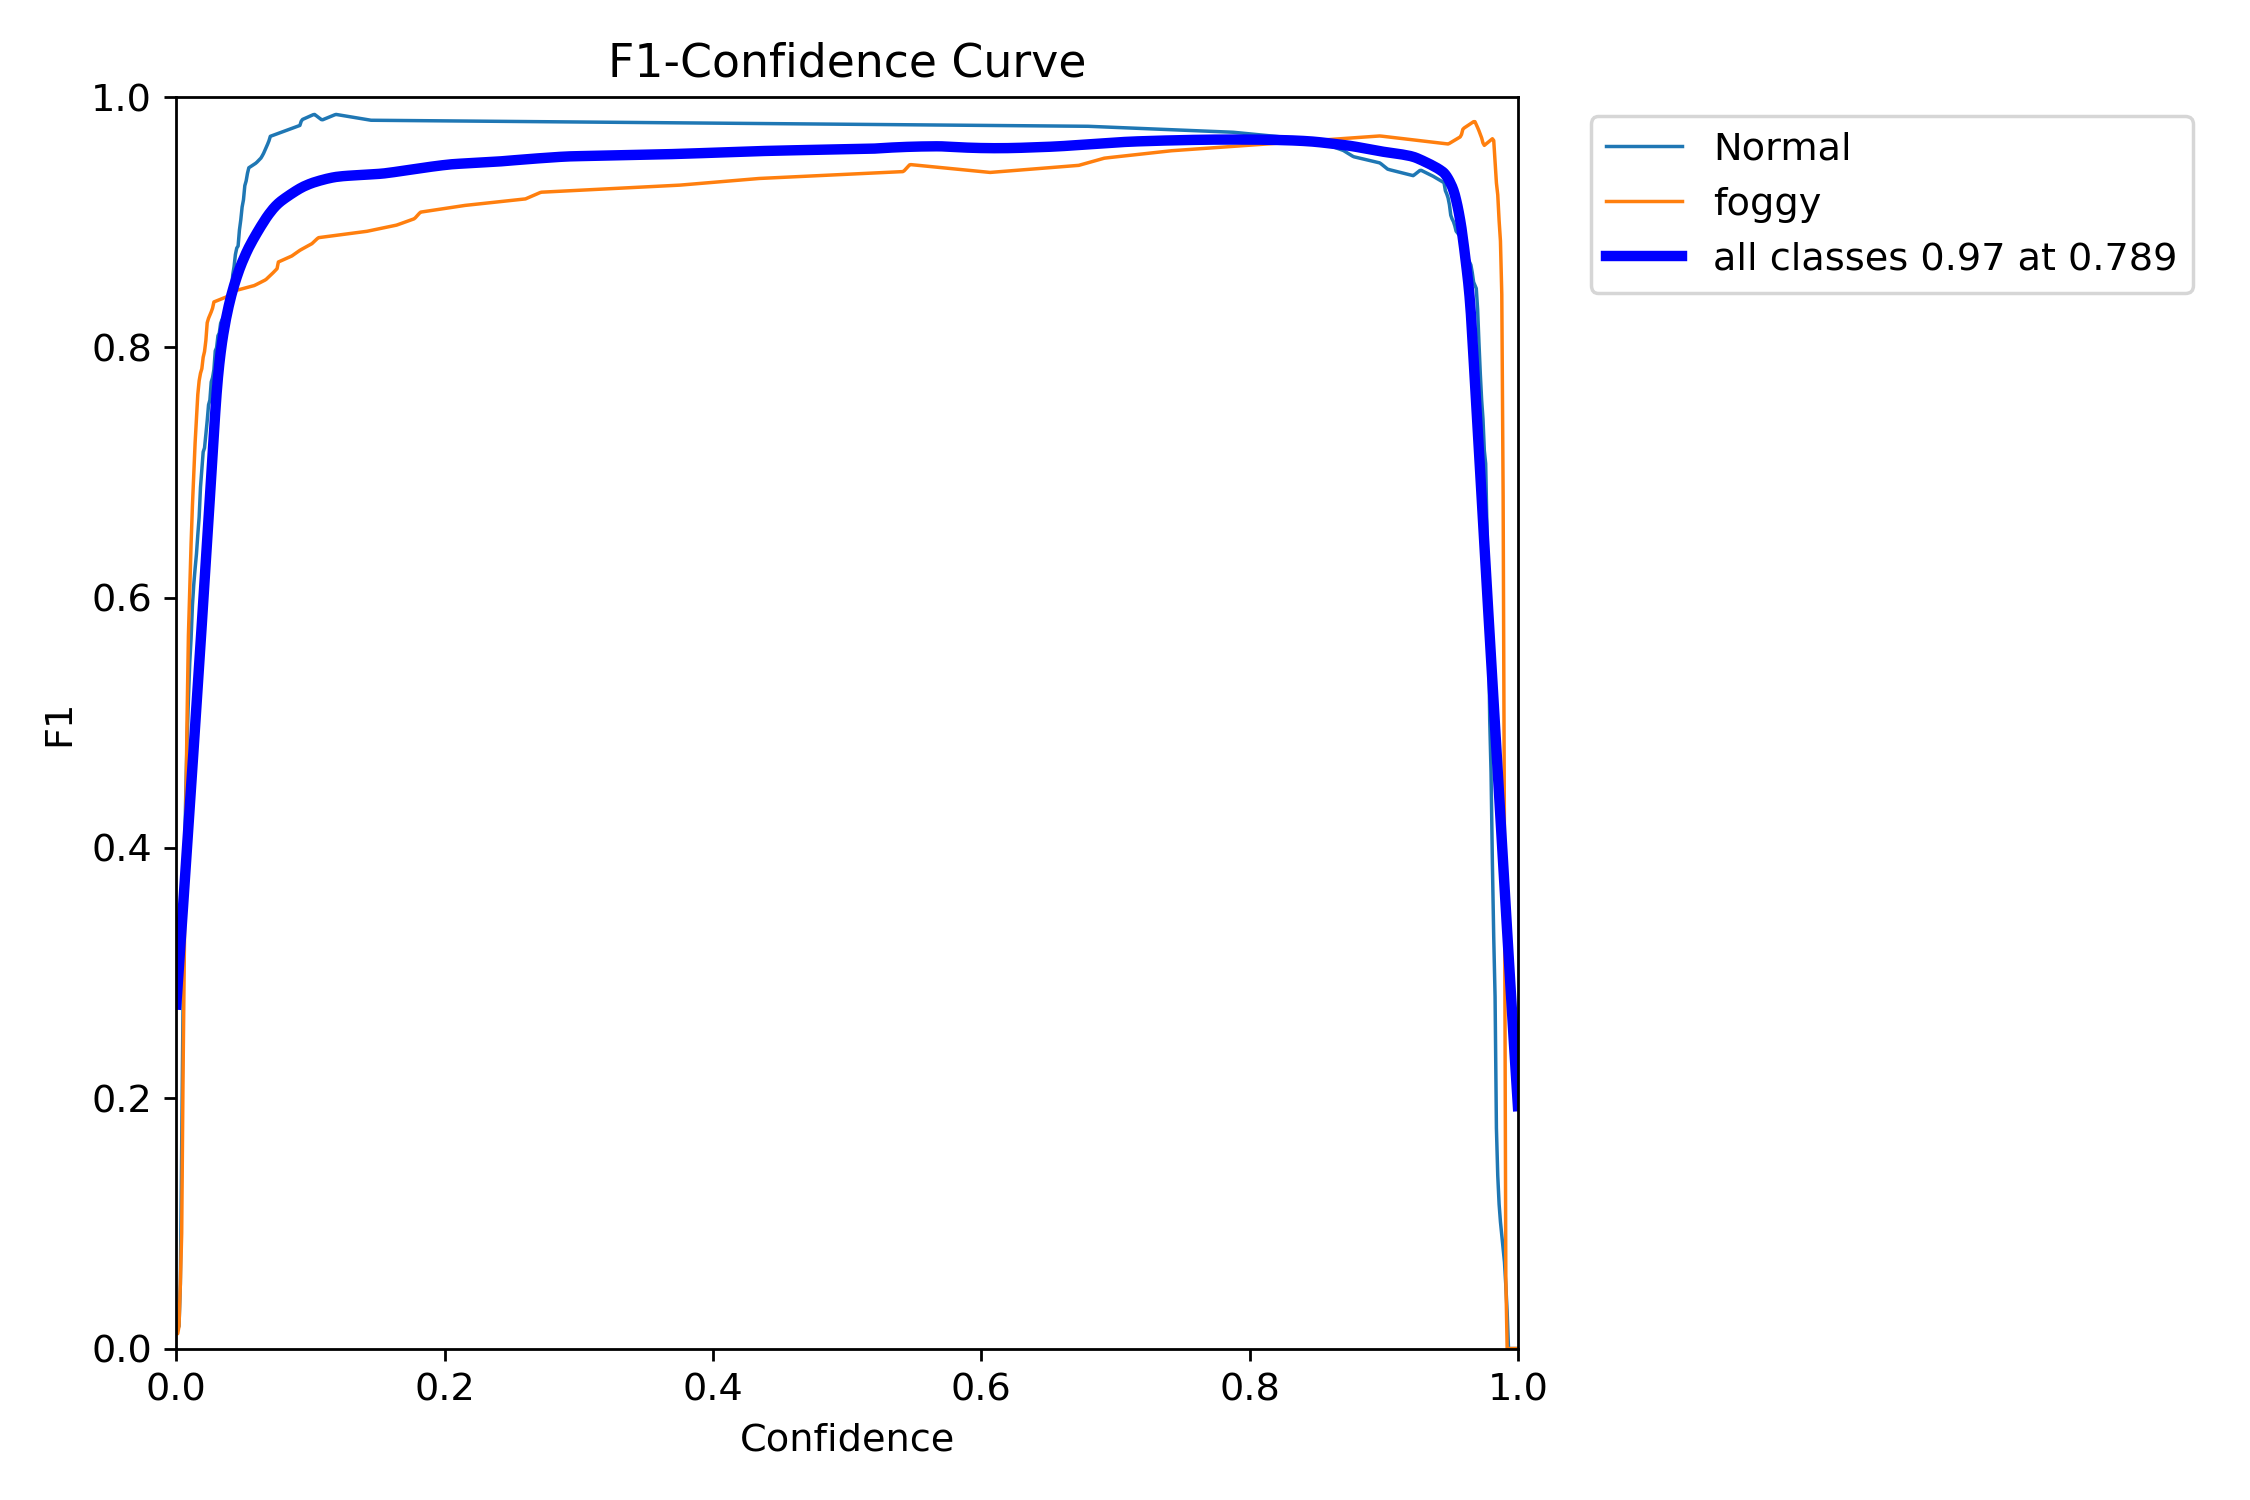

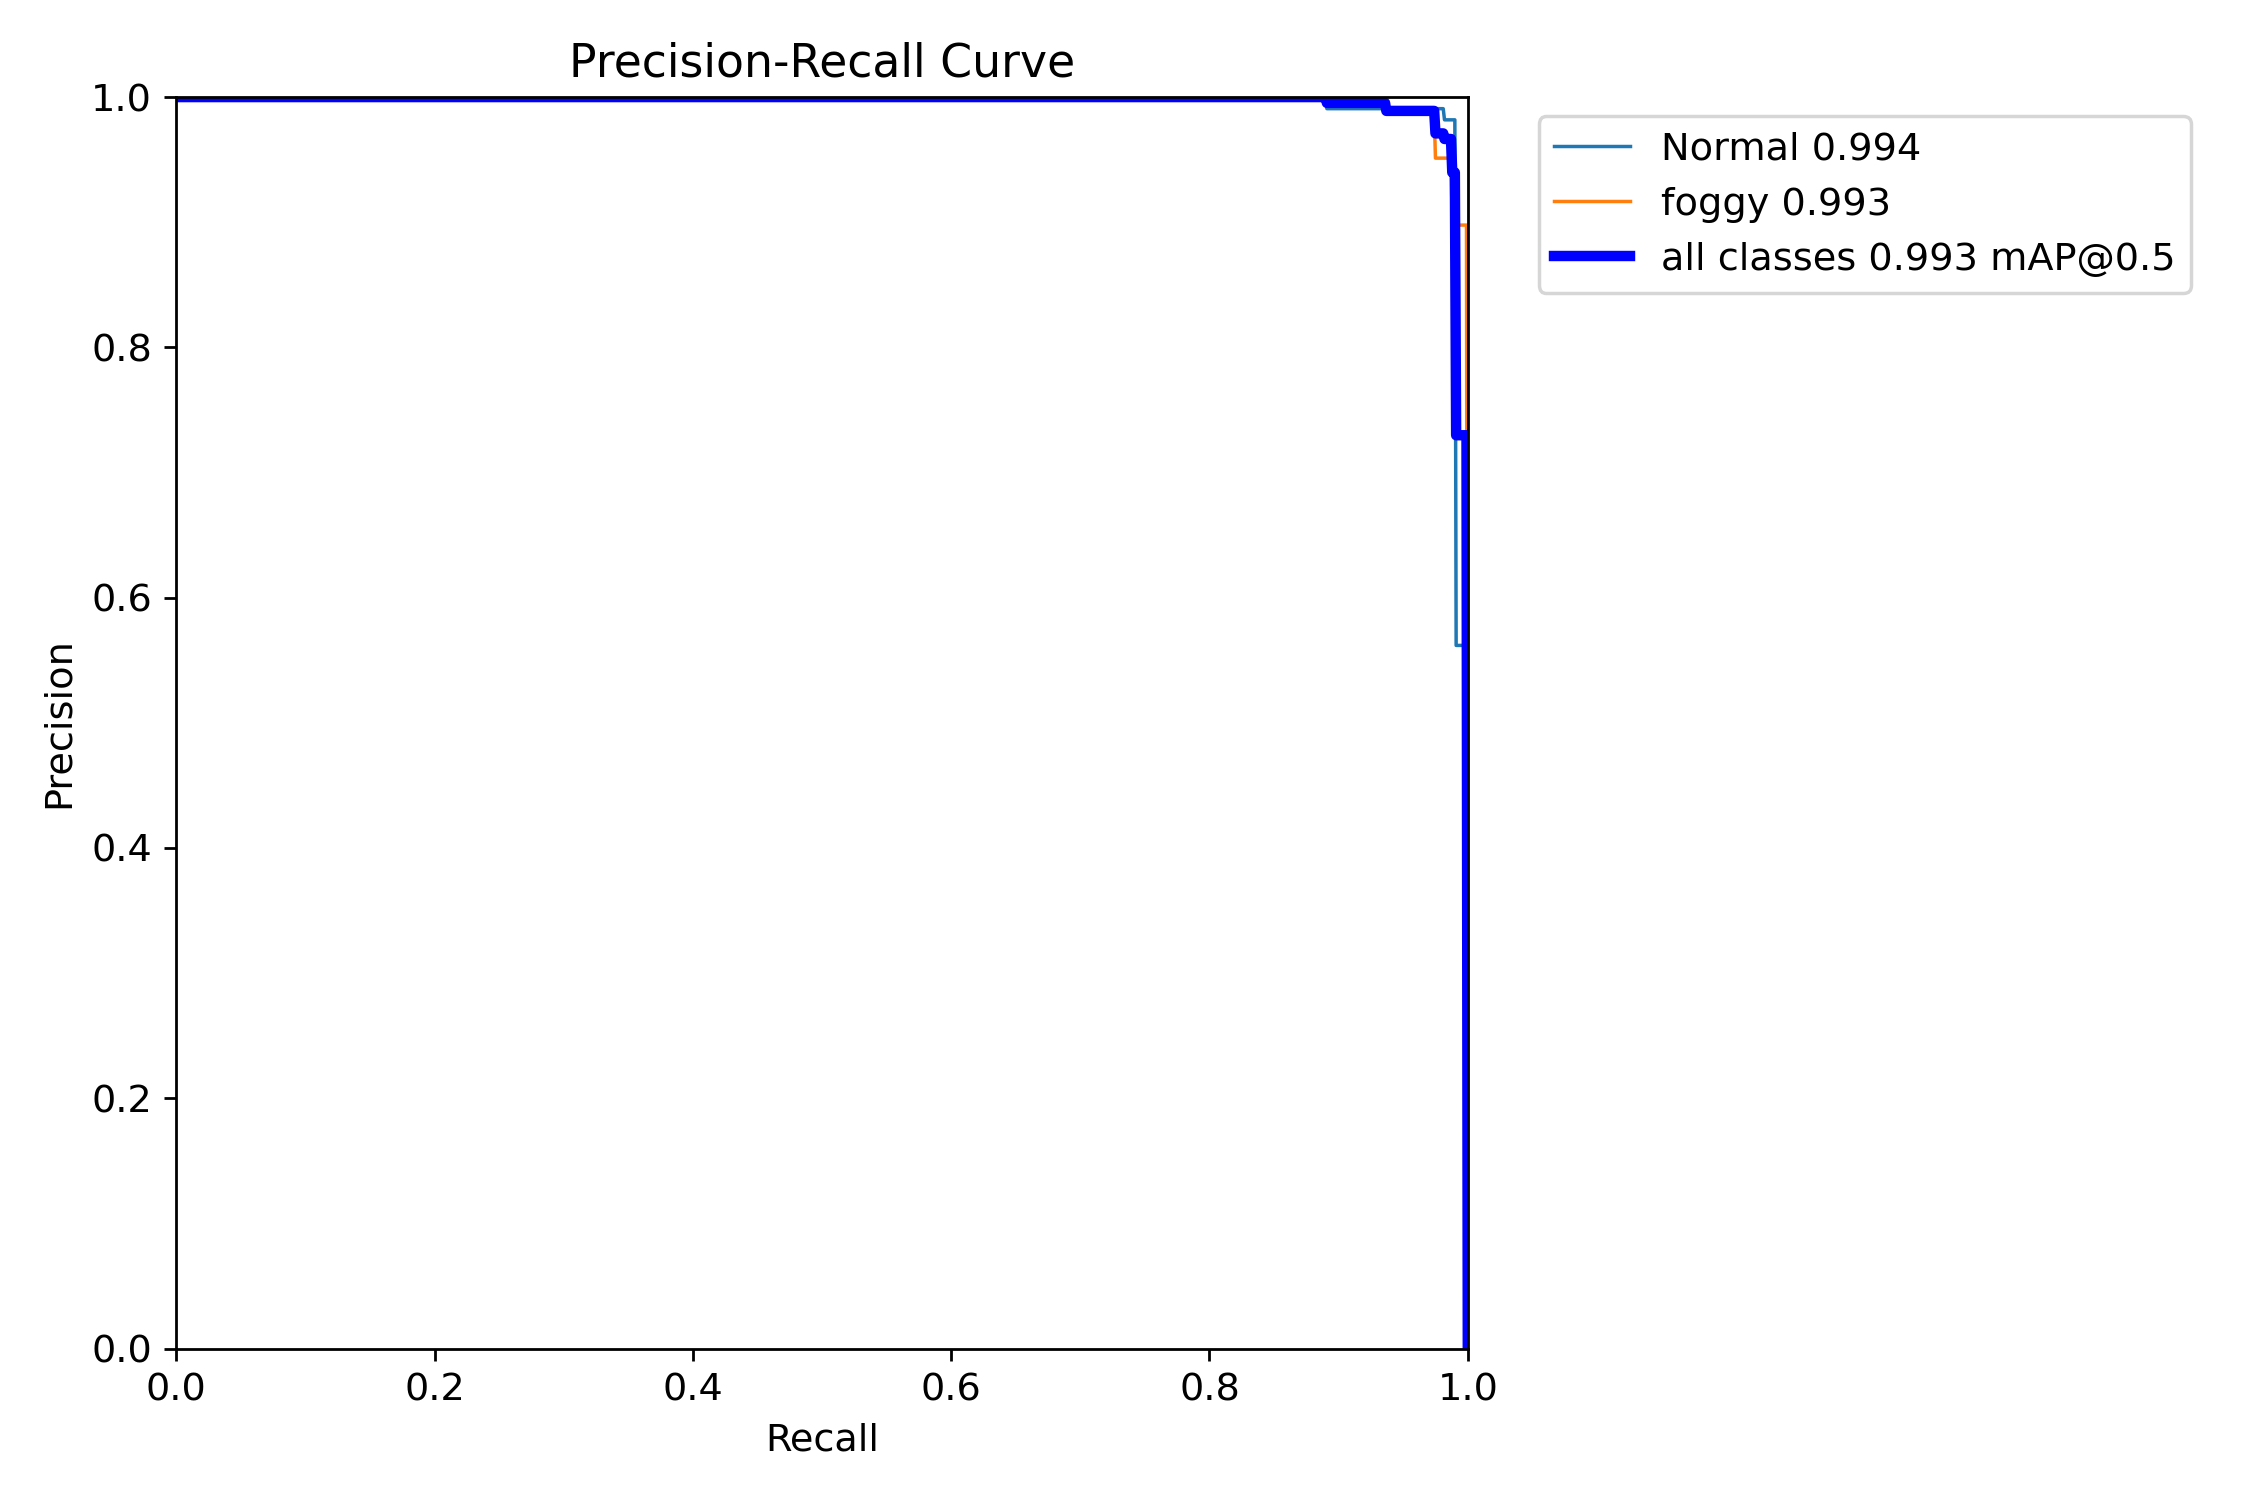

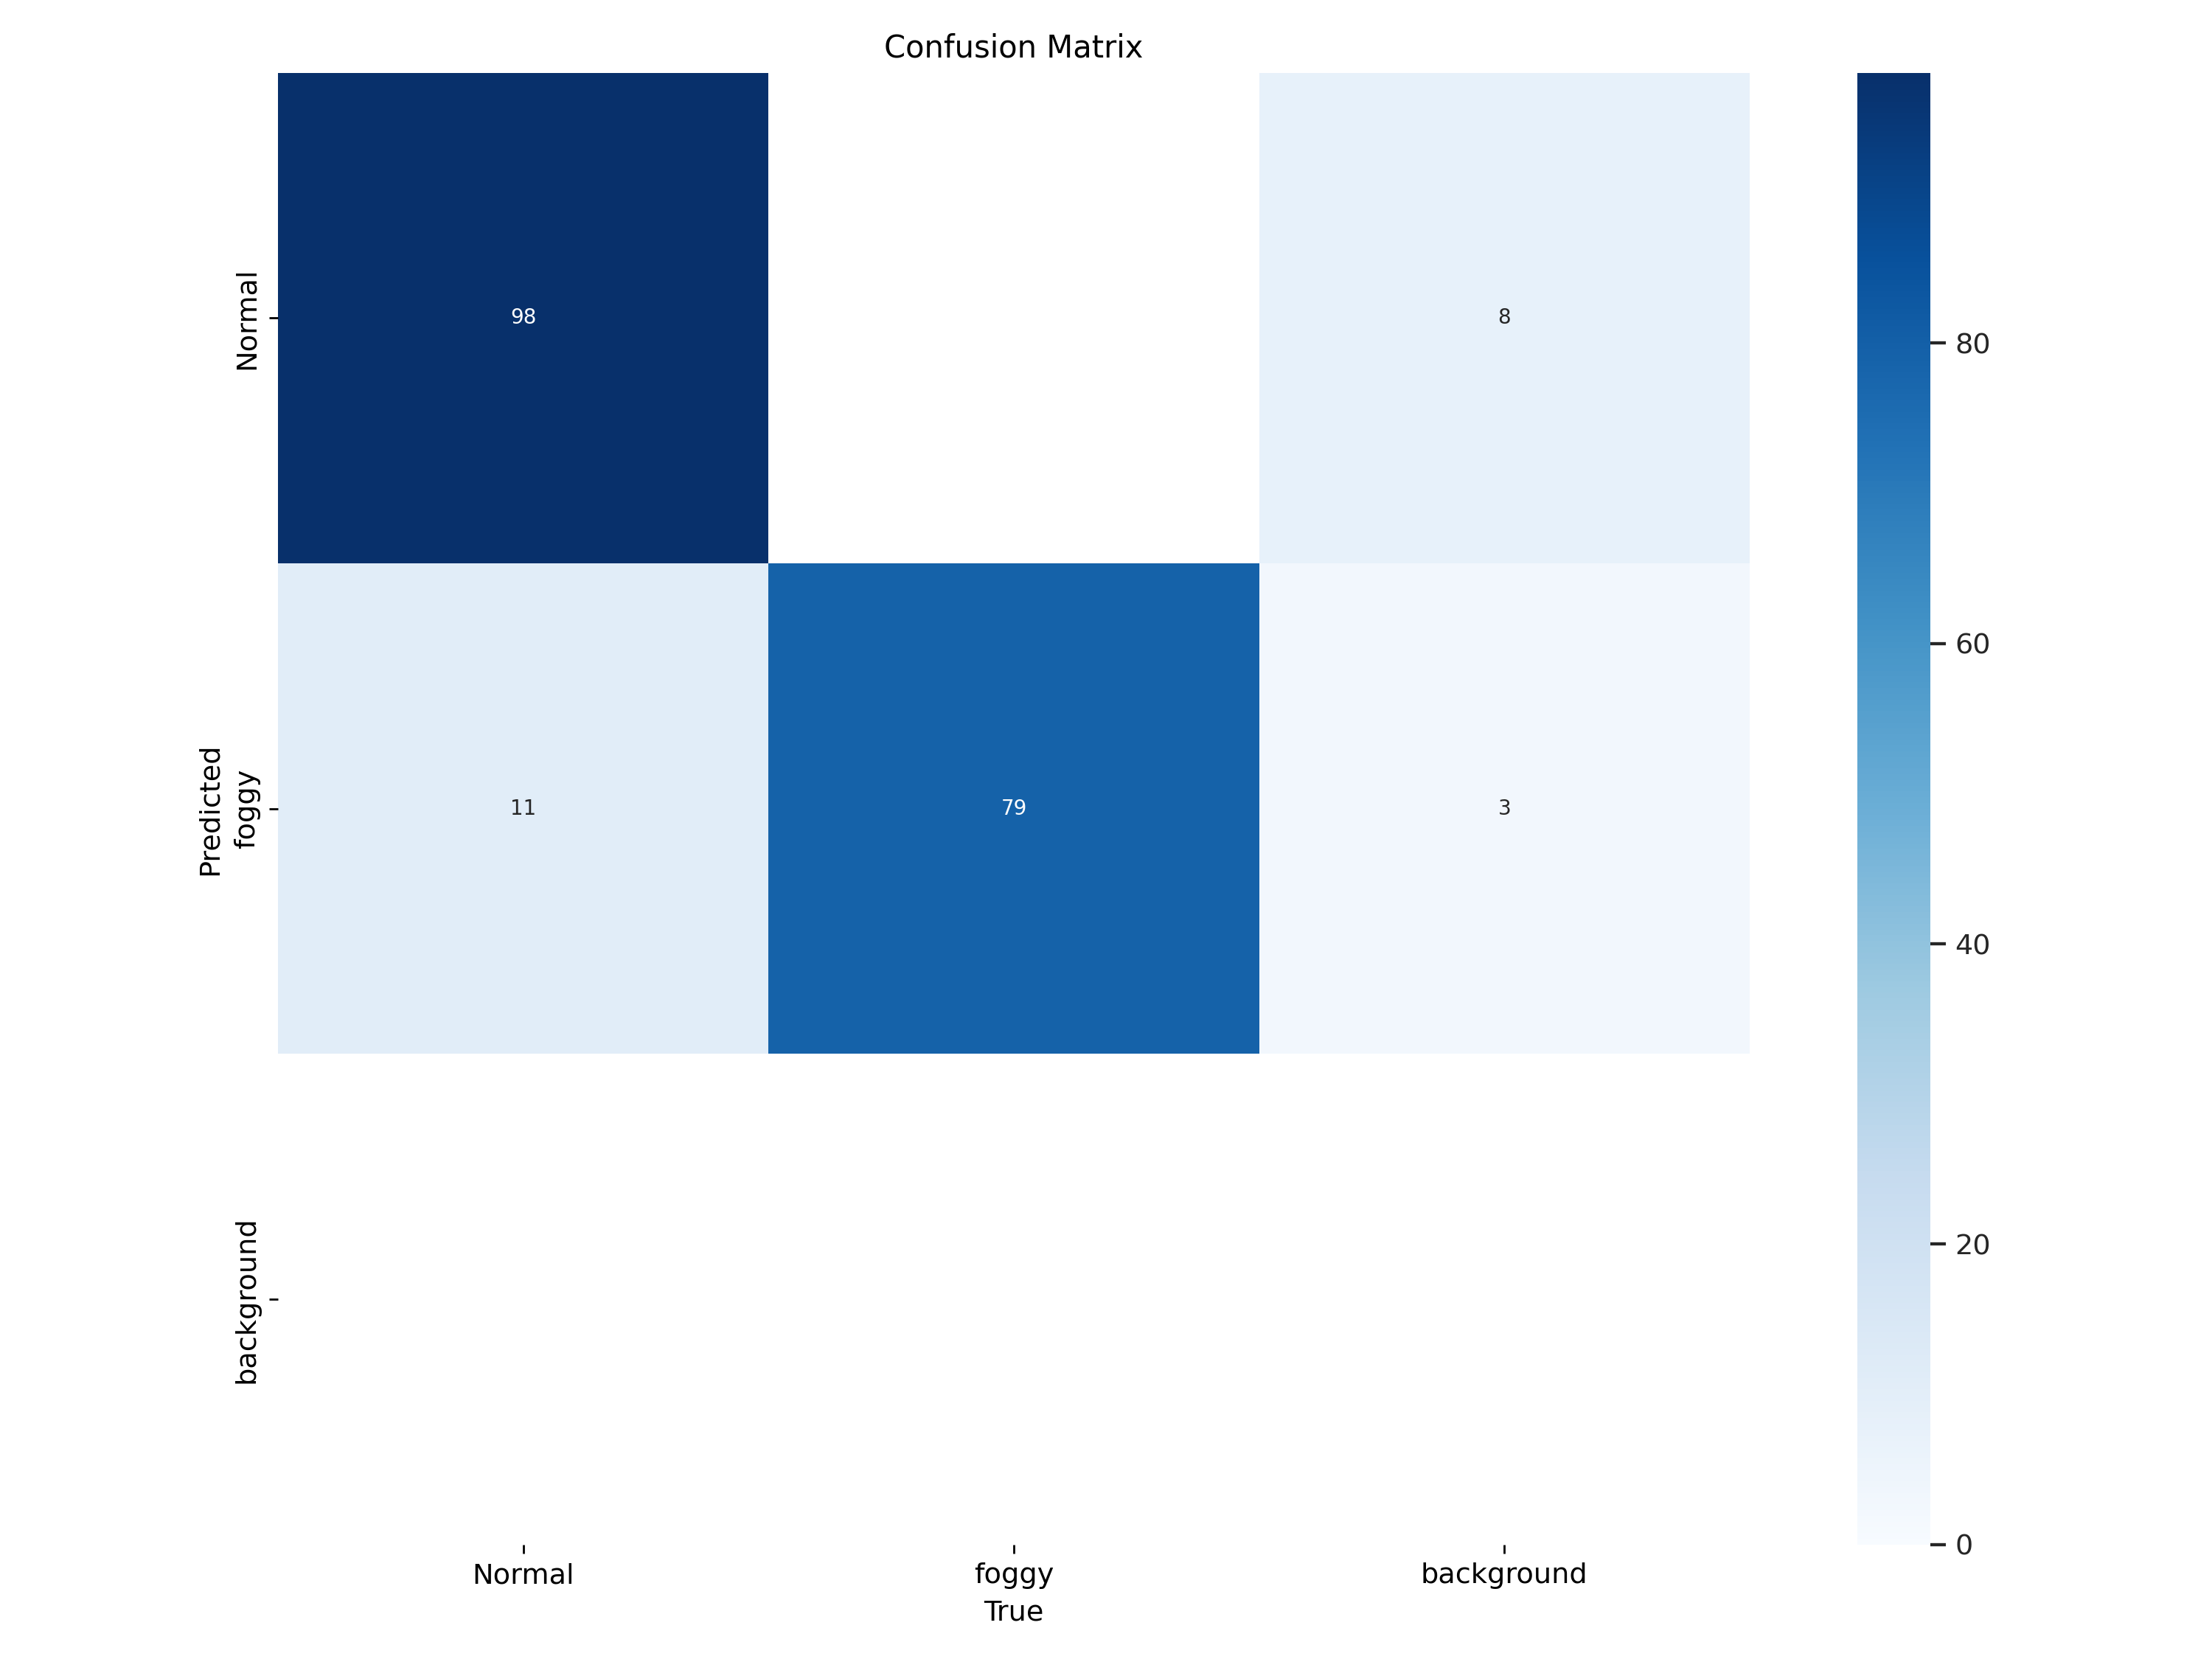

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train2/F1_curve.png')
y = Image(filename='runs/detect/train2/PR_curve.png')
z = Image(filename='runs/detect/train2/confusion_matrix.png')
display(x, y,z)

# YoloV3

In [5]:
%cd /content

/content


In [6]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 11009, done.
remote: Counting objects: 100% (931/931), done.
remote: Compressing objects: 100% (453/453), done.
remote: Total 11009 (delta 633), reused 730 (delta 477), pack-reused 10078
Receiving objects: 100% (11009/11009), 9.88 MiB | 14.66 MiB/s, done.
Resolving deltas: 100% (7432/7432), done.


In [7]:
%cd /content/yolov3/

/content/yolov3


In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [9]:
train: '/content/drive/MyDrive/2/yolov5/train/images'
val: '/content/drive/MyDrive/2/yolov5/valid/images'


nc: 2
names: ['Normal', 'foggy']

In [10]:
!python train.py --img 416 --batch 16 --epochs 20 --data /content/drive/MyDrive/2/yolov5/data.yaml --weights yolov3.pt

2023-12-22 09:12:54.329892: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 09:12:54.329941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 09:12:54.331276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov3.pt, cfg=, data=/content/drive/MyDrive/2/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=

In [10]:
p_yol5 = 0.99
r_yol5 = 0.988
mAP_yolo5 = 0.991

storeResults('YoloV3',p_yol5,r_yol5,mAP_yolo5)

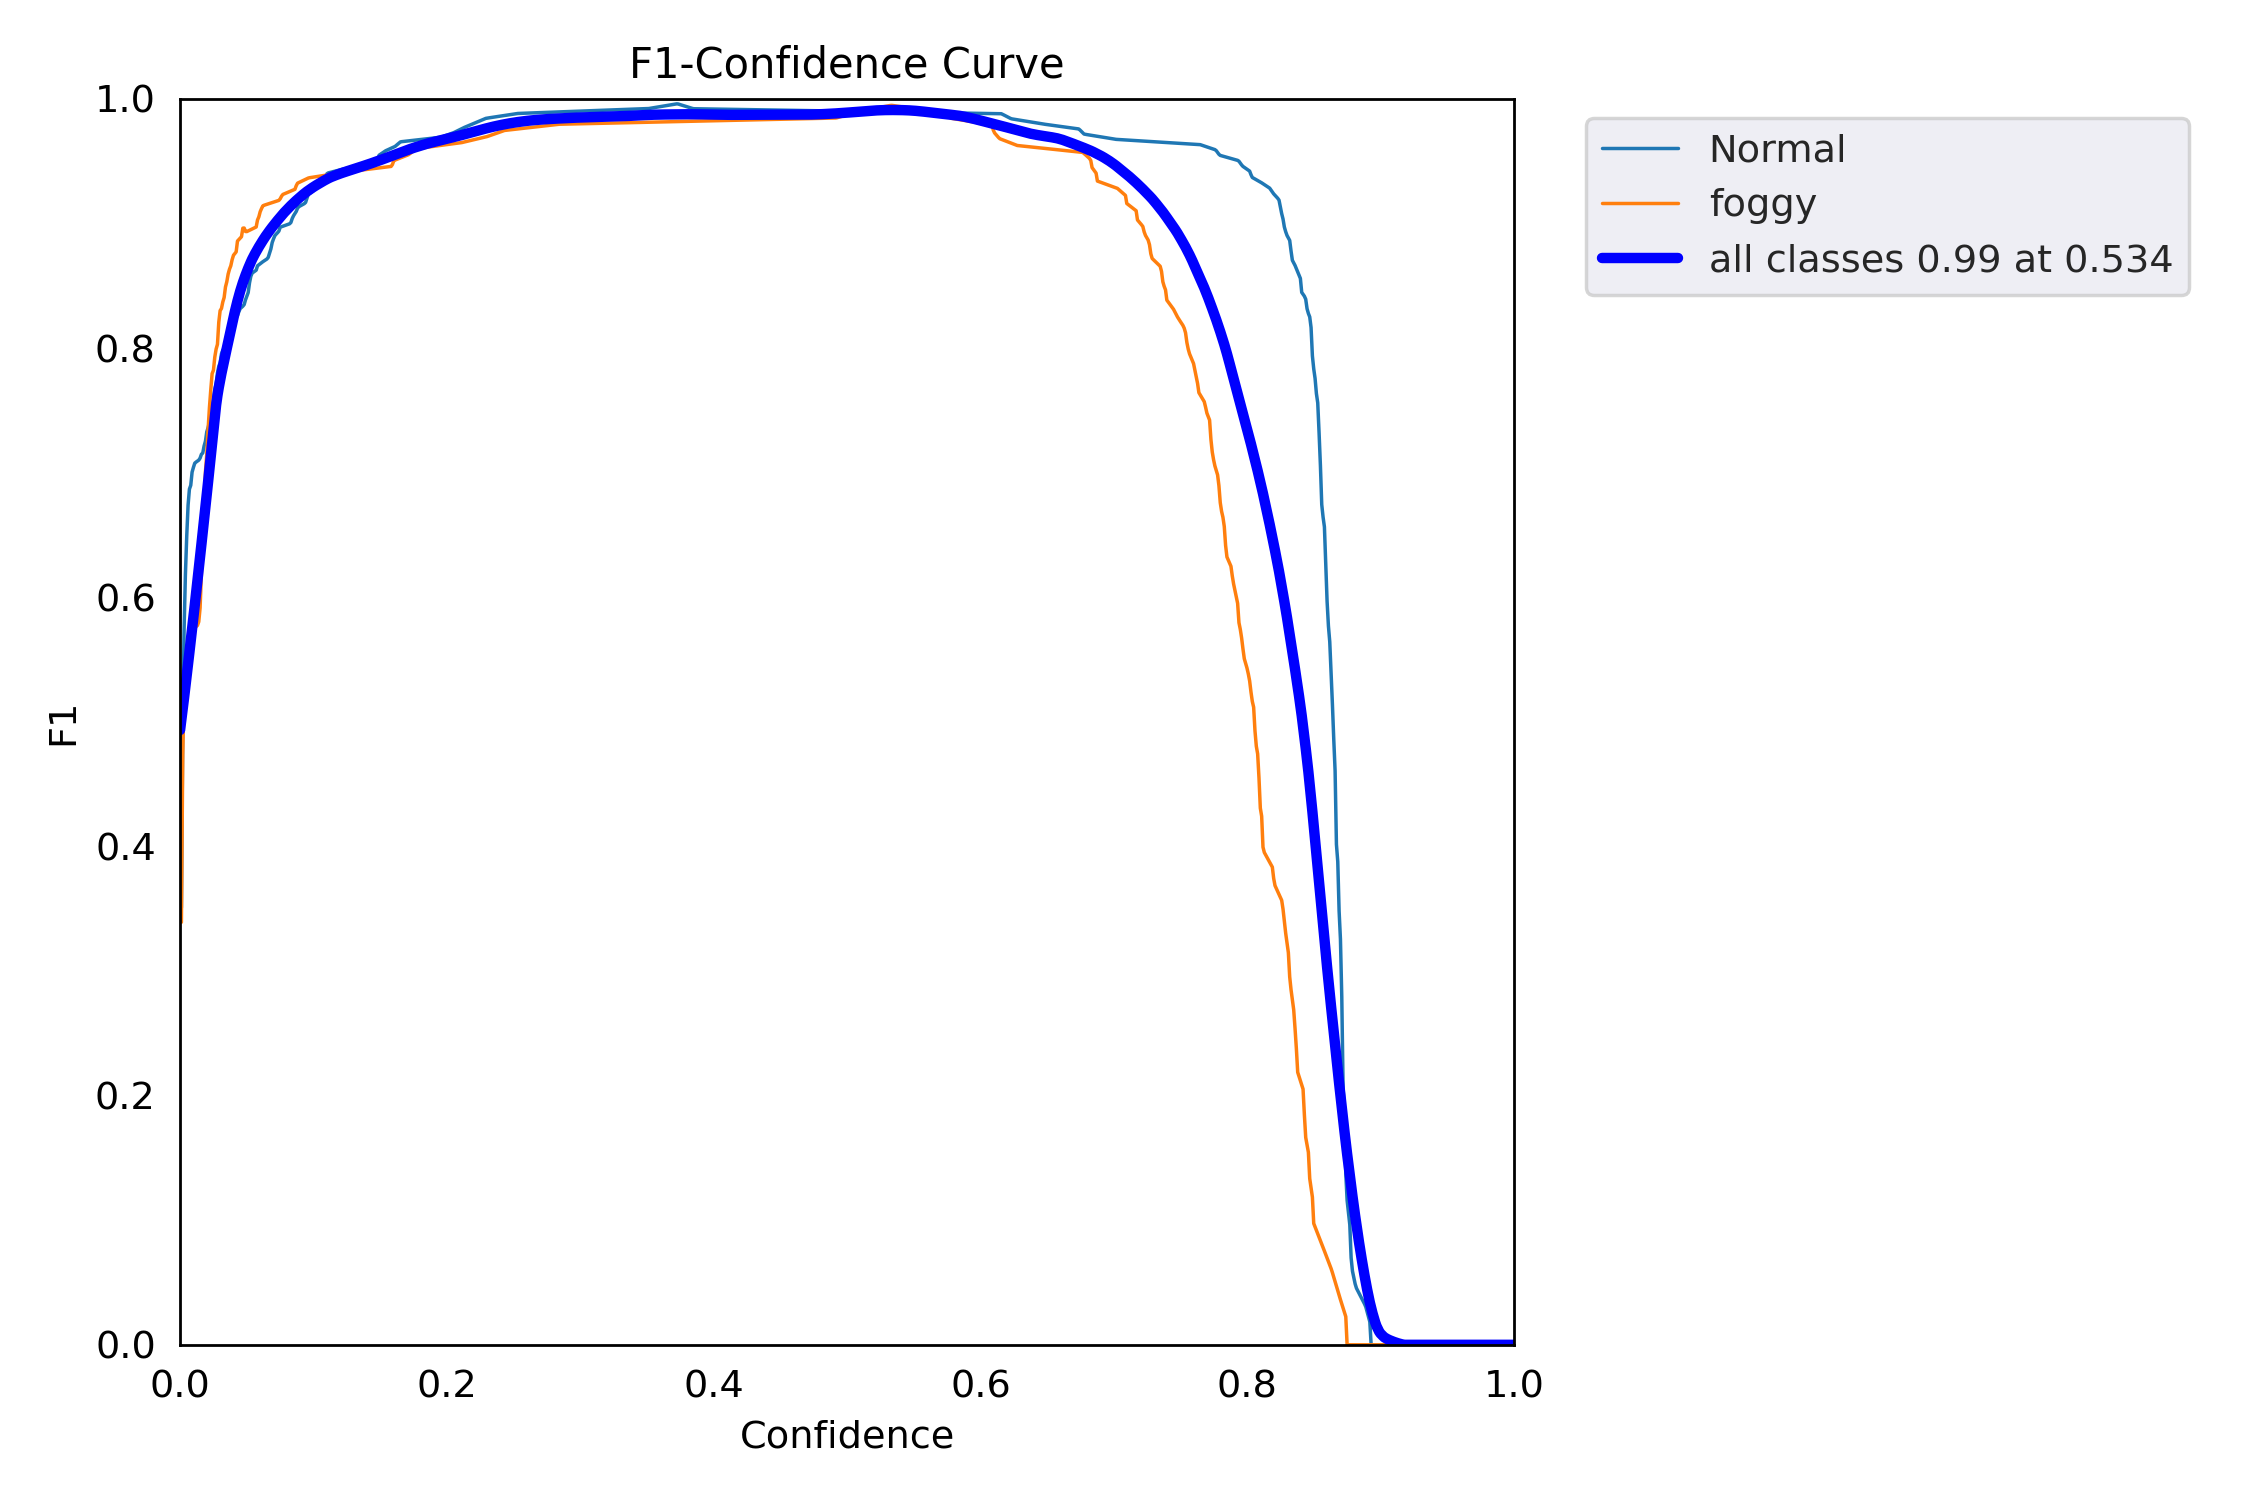

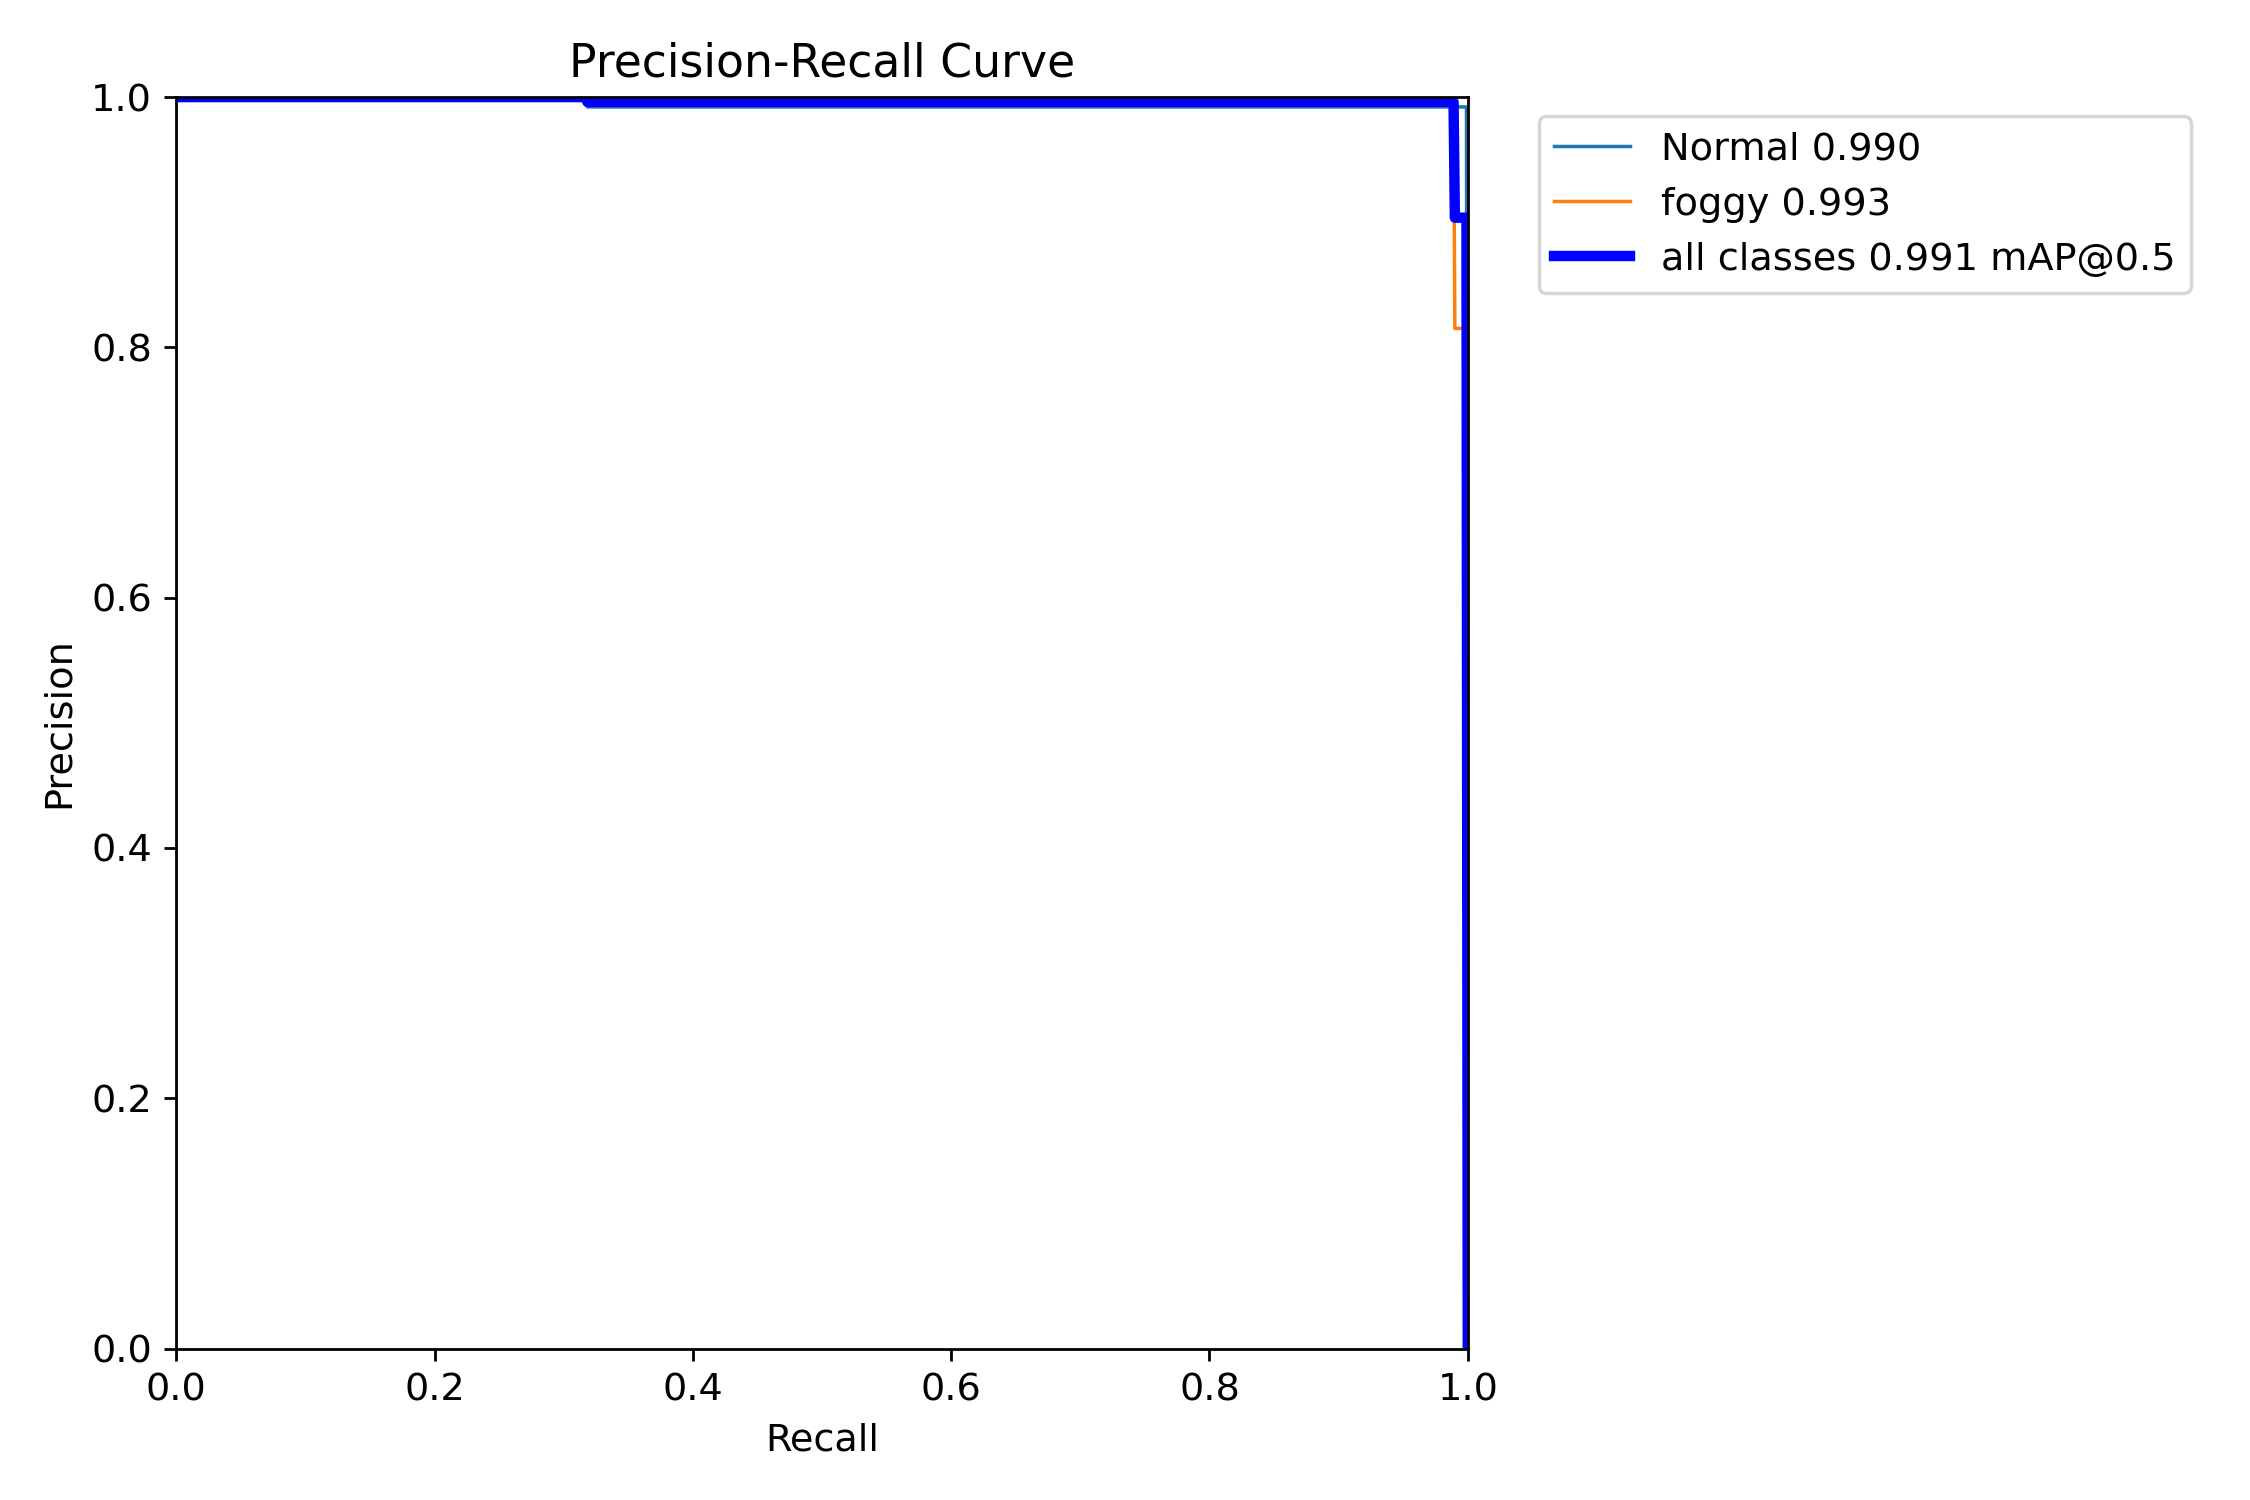

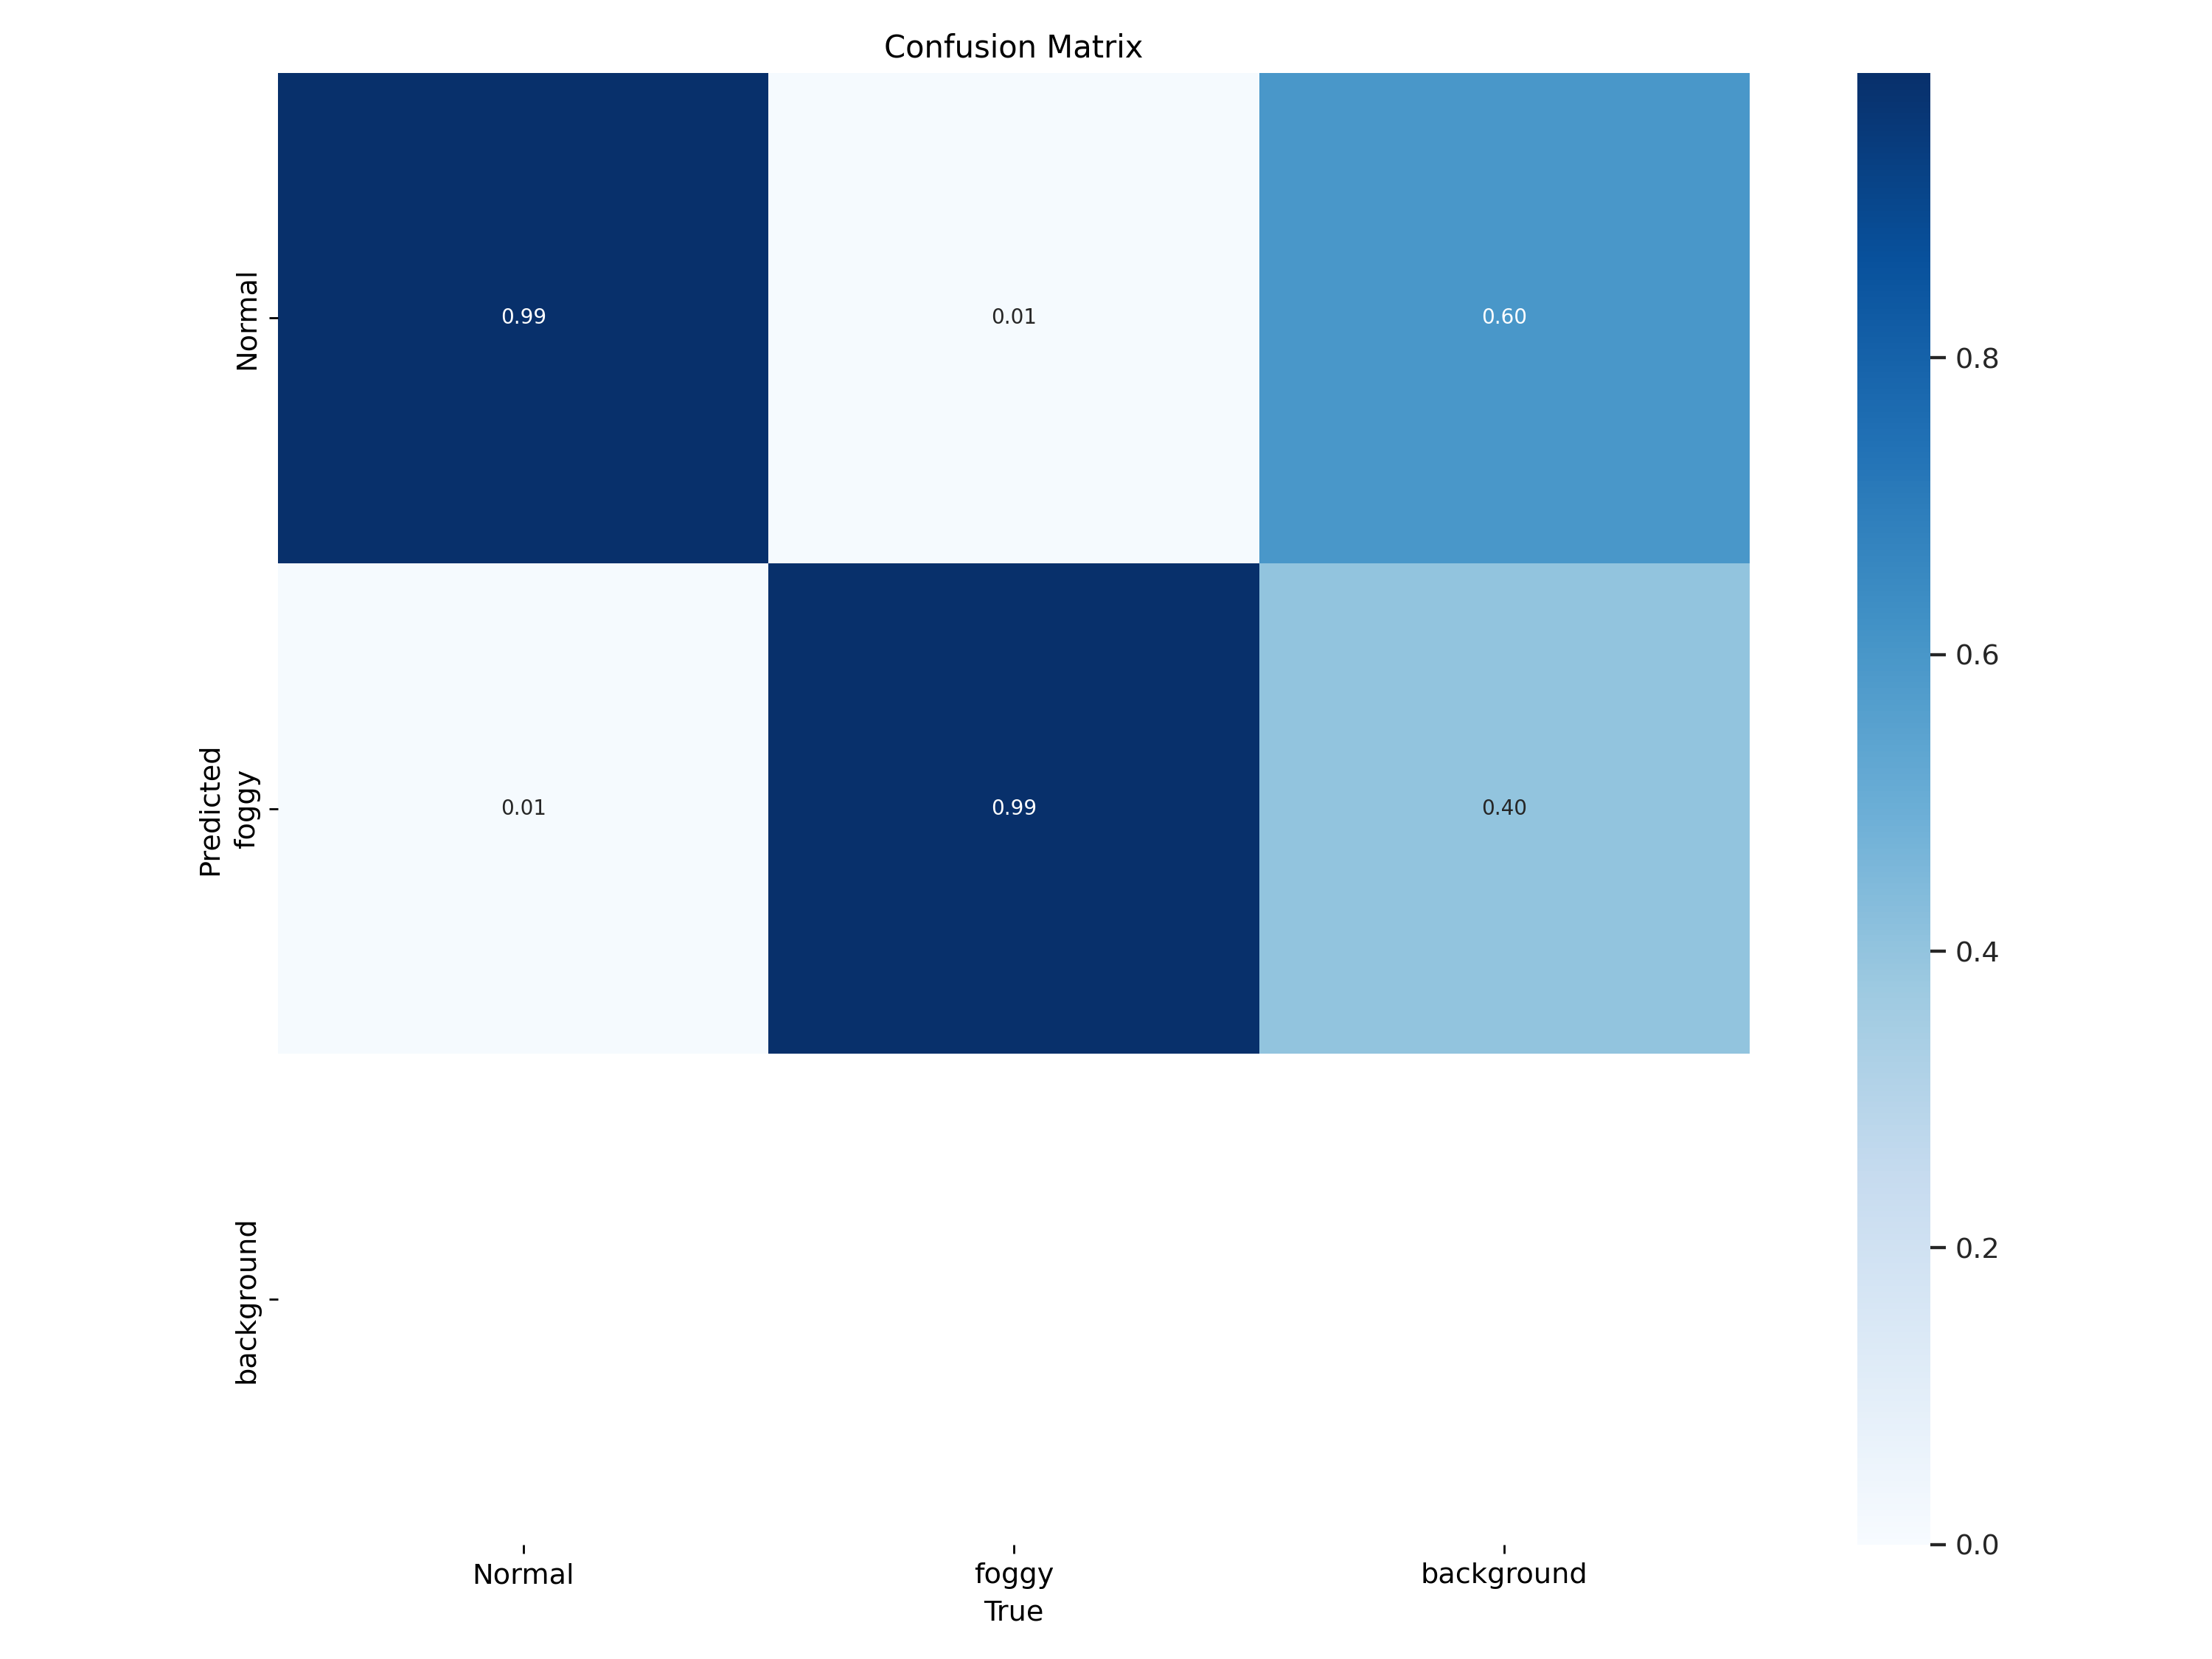

In [11]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='/content/yolov3/runs/train/exp/F1_curve.png')
y = Image(filename='/content/yolov3/runs/train/exp/PR_curve.png')
z = Image(filename='/content/yolov3/runs/train/exp/confusion_matrix.png')
display(x, y,z)

# Comparison

In [11]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,

                       'Precision': precision,
                       'Recall'   : recall,
                       'mAP' : mAP,


                      })

In [12]:
result

,ML Model,Precision,Recall,mAP
0,YoloV5,0.974,0.956,0.990
1,YoloV5x6,0.989,0.983,0.990
2,Yolo X,0.704,0.731,0.839
3,R-YoloV5,0.887,0.888,0.934
4,R-YoloV3,0.667,0.836,0.831
5,R-YoloVX,0.171,0.476,0.276
6,YoloV8,0.963,0.971,0.993
7,YoloV3,0.990,0.988,0.991


# Graph

In [13]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Precision

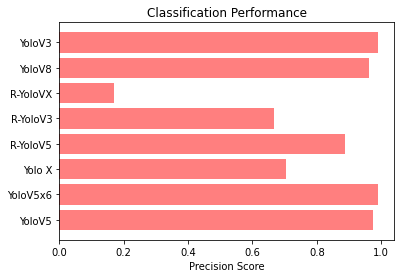

In [15]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

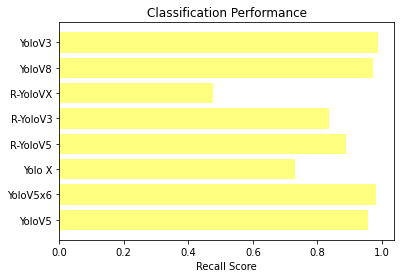

In [16]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# mAP

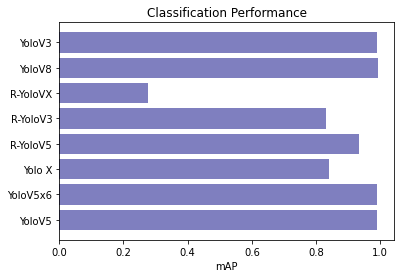

In [17]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mAP, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('mAP')
plt2.title('Classification Performance')
plt2.show()

View the status of your deployment at: https://app.roboflow.com/foreignobjectaerodromes/o.d-in-bad-weather/1